# Librerias

In [81]:
# Carga de librerías
import numpy as np
import tensorflow as tf
import PIL
import PIL.Image
import pathlib
import scipy as sp
import seaborn as sns
from itertools import product
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
import os
import pathlib
from pathlib import Path   

In [82]:
import pickle
import sys
from pathlib import Path

# Añadir el directorio raíz del proyecto a sys.path
module_path = Path('/Users/Cesar/Desktop/Proyecto-CSG/').resolve()
if module_path not in sys.path:
    sys.path.append(str(module_path))

# Añadir el directorio que contiene 'new_spectral_metric' a sys.path
new_spectral_metric_path = module_path / '/Users/Cesar/Desktop/Proyecto-CSG/new_spectral_metric/'
if new_spectral_metric_path not in sys.path:
    sys.path.append(str(new_spectral_metric_path))

from numpy.linalg import LinAlgError
from scipy.sparse.csgraph import laplacian
# from spectral_metric.lib import find_samples, compute_expectation_with_monter_carlo 
from new_spectral_metric.new_estimator_intra_class import CumulativeGradientEstimator
from new_spectral_metric.new_visualize import make_graph
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, Dense, MaxPooling2D, Lambda
from tensorflow.keras import backend as K
from pathlib import Path
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib.collections import LineCollection
from matplotlib.font_manager import FontProperties
from pathlib import Path

# DATASET DESDE DIRECTORIO 

In [83]:
#Lectura de dataset

directorio_dataset = ('../Datasets/MNIST')
directorio_dataset = pathlib.Path(directorio_dataset)

# Lectura de la carpeta train
directorio_train = ('../Datasets/MNIST/train')
directorio_train = pathlib.Path(directorio_train)

# Lectura de la carpeta test
directorio_test = ('../Datasets/MNIST/test')
directorio_test = pathlib.Path(directorio_test)

total_dataset = len(list(directorio_dataset.glob('*/*/*.png')))  # Cuenta la cantidad de imagenes del dataset (Aqui busca en las subcarpetas del directorio del dataset)
total_train = len(list(directorio_train.glob('*/*.png')))  # Cuenta la cantidad de imagenes de train
total_test = len(list(directorio_test.glob('*/*.png')))  # Cuenta la cantidad de imagenes de test

print(f"Total imagenes dataset: {total_dataset}")
print(f"Total imagenes train: {total_train}")
print(f"Total imagenes test: {total_test}")

Total imagenes dataset: 70100
Total imagenes train: 60000
Total imagenes test: 10100


In [84]:
# Definir el batchsize del dataset completo
batch_size_total = total_dataset

In [85]:
# Dimensiones de imagen y tamaño de batch en train
img_height = 28
img_width = 28
#batch_size = 32
batch_size_train = total_train

In [86]:

import tensorflow as tf
import pathlib

# Data splitting (entrenamiento y validación)
train_images = tf.keras.preprocessing.image_dataset_from_directory(
  directorio_train,
  #validation_split=0.2,
  color_mode='rgb',
  label_mode='int',
  #subset="training",
  #seed=123,
  shuffle=False,
  image_size=(img_height, img_width),
  batch_size=batch_size_train)

Found 60000 files belonging to 10 classes.


In [87]:
# Dimensiones de imagen y tamaño de batch en test
img_height = 28
img_width = 28
#batch_size = 32
batch_size_test = total_test

In [88]:
# Data splitting (entrenamiento y validación)
test_images = tf.keras.preprocessing.image_dataset_from_directory(
  directorio_test,
  #validation_split=0.2,
  color_mode='rgb',
  label_mode='int',
  #subset="training",
  #seed=123,
  shuffle=False,
  image_size=(img_height, img_width),
  batch_size=batch_size_test)

Found 10100 files belonging to 10 classes.


In [89]:
# Contar el total de imágenes por clase en train y test  
class_counts_total = {p.name: len(list(p.glob('*.png'))) for p in directorio_dataset.glob('*/*')}  
class_counts_train = {p.name: len(list(p.glob('*.png'))) for p in directorio_train.glob('*')}  
class_counts_test = {p.name: len(list(p.glob('*.png'))) for p in directorio_test.glob('*')}  

# Encontrar el valor más bajo de imágenes por clase en train  
menor_train = min(class_counts_train.values()) if class_counts_train else None  # Se almacena el valor de la clase que menos muestras tiene

# Encontrar el valor más alto de imágenes por clase en train  
mayor_train = max(class_counts_train.values()) if class_counts_train else None  # Se almacena el valor de la clase que mas muestras tiene


# Encontrar el valor más bajo de imágenes por clase en test  
menor_test = min(class_counts_test.values()) if class_counts_test else None  # Se almacena el valor de la clase que menos muestras tiene

# Encontrar el valor más alto de imágenes por clase en test  
mayor_test = max(class_counts_test.values()) if class_counts_test else None  # Se almacena el valor de la clase que mas muestras tiene


# Mostrar el total de imágenes por clase en train  
print("\nTotal de imágenes por clase en train:")  
for class_name, count in class_counts_train.items():  
    print(f"Clase: {class_name}, Número de imágenes: {count}")  
print(f"Total imágenes train: {sum(class_counts_train.values())}")  

# Mostrar el valor más bajo en train  
print(f"Menor número de imágenes en train: {menor_train}")  

# Mostrar el valor más alto en train  
print(f"Mayor número de imágenes en train: {mayor_train}")  

# Mostrar el total de imágenes por clase en test  
print("\nTotal de imágenes por clase en test:")  
for class_name, count in class_counts_test.items():  
    print(f"Clase: {class_name}, Número de imágenes: {count}")  
print(f"Total imágenes test: {sum(class_counts_test.values())}")  

# Mostrar el valor más bajo en test  
print(f"Menor número de imágenes en test: {menor_test}")

# Mostrar el valor más alto en test  
print(f"Mayor número de imágenes en test: {mayor_test}")


Total de imágenes por clase en train:
Clase: 0_train, Número de imágenes: 5923
Clase: 1_train, Número de imágenes: 6742
Clase: 2_train, Número de imágenes: 5958
Clase: 3_train, Número de imágenes: 6131
Clase: 4_train, Número de imágenes: 5842
Clase: 5_train, Número de imágenes: 5421
Clase: 6_train, Número de imágenes: 5918
Clase: 7_train, Número de imágenes: 6265
Clase: 8_train, Número de imágenes: 5851
Clase: 9_train, Número de imágenes: 5949
Total imágenes train: 60000
Menor número de imágenes en train: 5421
Mayor número de imágenes en train: 6742

Total de imágenes por clase en test:
Clase: 0_test, Número de imágenes: 990
Clase: 1_test, Número de imágenes: 1145
Clase: 2_test, Número de imágenes: 1042
Clase: 3_test, Número de imágenes: 1020
Clase: 4_test, Número de imágenes: 992
Clase: 5_test, Número de imágenes: 902
Clase: 6_test, Número de imágenes: 968
Clase: 7_test, Número de imágenes: 1038
Clase: 8_test, Número de imágenes: 984
Clase: 9_test, Número de imágenes: 1019
Total imág

In [90]:
# Nombres de las clases
class_names_train = list(class_counts_train.keys())
class_names_test = list(class_counts_test.keys())
#class_names_total = sorted(list(set(class_names_train + class_names_test)))
class_names_total = list(class_counts_total.keys())

# Mostrar el número de clases y los nombres
print(f"\nNúmero de clases en train: {len(class_names_train)}")
print(f"Nombres de las clases en train: {class_names_train}")

print(f"\nNúmero de clases en test: {len(class_names_test)}")
print(f"Nombres de las clases en test: {class_names_test}")

print(f"\nNúmero total de clases en el dataset: {len(class_names_total)}")   # Este valor cambia si el nombre de las clases es diferente
print(f"Nombres de todas las clases en el dataset: {class_names_total}")     # Este valor tambien cambia si el nombre de las clases es diferente


Número de clases en train: 10
Nombres de las clases en train: ['0_train', '1_train', '2_train', '3_train', '4_train', '5_train', '6_train', '7_train', '8_train', '9_train']

Número de clases en test: 10
Nombres de las clases en test: ['0_test', '1_test', '2_test', '3_test', '4_test', '5_test', '6_test', '7_test', '8_test', '9_test']

Número total de clases en el dataset: 20
Nombres de todas las clases en el dataset: ['0_test', '1_test', '2_test', '3_test', '4_test', '5_test', '6_test', '7_test', '8_test', '9_test', '0_train', '1_train', '2_train', '3_train', '4_train', '5_train', '6_train', '7_train', '8_train', '9_train']


In [91]:
for images, labels0 in test_images.take(1):  # only take first element of dataset
    numpy_all_images = images.numpy()  # convertir el tensor de imágenes en un arreglo de numpy y ahora contiene las imágenes del conjunto de datos en formato de numpy.
    numpy_all_labels = labels0.numpy()  # convierte el tensor de etiquetas en un arreglo de numpy y ahora contiene las etiquetas del conjunto de datos en formato de numpy

numpy_all_images /= 255.0  # Scale the features to the [0, 1] range
print(numpy_all_images.shape)

# CIFAR-10 
fully_dataset_test = numpy_all_images.reshape((numpy_all_images.shape[0], numpy_all_images.shape[1]*numpy_all_images.shape[2]*numpy_all_images.shape[3])) # es un arreglo bidimensional donde cada fila representa una imagen y cada columna representa un píxel de la imagen
fully_labels_test = numpy_all_labels.reshape(numpy_all_labels.shape[0],)

(10100, 28, 28, 3)


# Dataset complexity using CSG

C:\Users\Cesar\Desktop\Proyecto-CSG\new_spectral_metric\new_visualize.py:48: RuntimeWarning: divide by zero encountered in divide
  similarities = difference.max() / difference * 100
C:\Users\Cesar\Desktop\Proyecto-CSG\new_spectral_metric\new_visualize.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


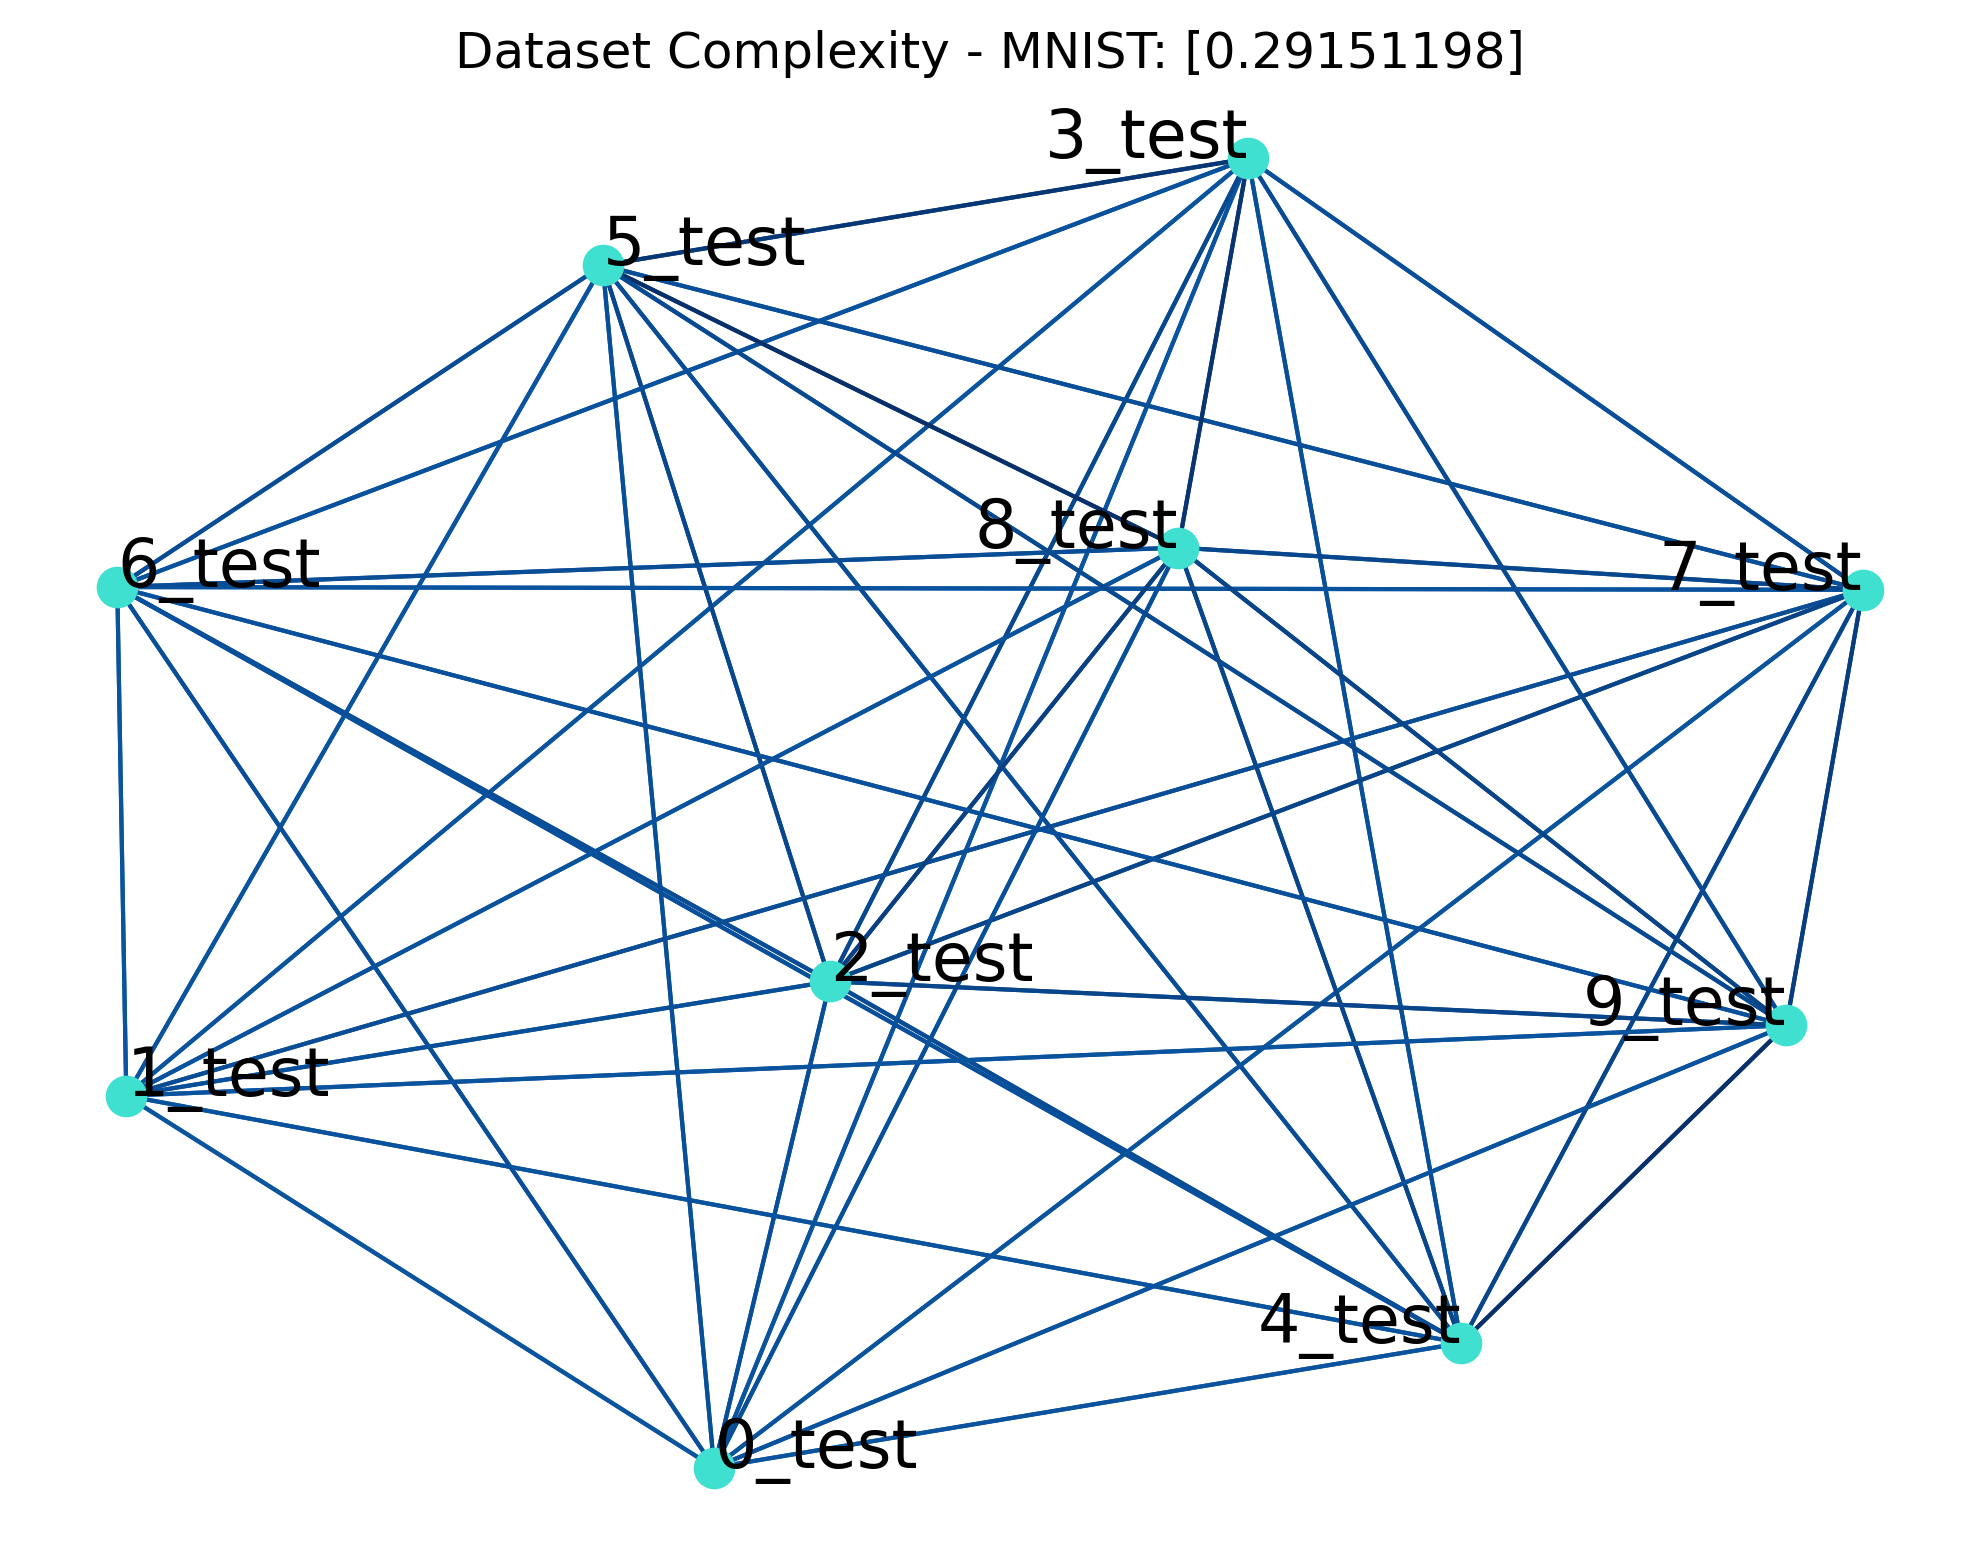

In [92]:

estimator = CumulativeGradientEstimator(M_sample=mayor_test, k_nearest=10)  # Utiliza el numero menor de muestras encontrado en cada clase dependiendo si es train o test
estimator.fit(data=fully_dataset_test, target=fully_labels_test)
csg = estimator.csg  # The actual complexity values.
estimator.evals, estimator.evecs  # The eigenvalues and vectors.

make_graph(estimator.difference, title="Dataset Complexity - MNIST: "+str(csg), classes=class_names_test)

# Calcular la similitud entre clases

In [93]:

from scipy.stats import entropy
import pandas as pd

# Calcular la entropía por clase  
entropy_per_class = entropy(estimator.W / estimator.W.sum(-1)[:, None], axis=-1)  

# Encontrar la clase menos confusa (menor entropía)  
least_confused_class_index = np.argmin(entropy_per_class)  
least_confused_class_name = class_names_test[least_confused_class_index]  

print("Class that is the least confused (lowest entropy):", least_confused_class_name)

Class that is the least confused (lowest entropy): 1_test


In [94]:

# Obtener los índices de los pares menos similares  
pairs = list(zip(*np.unravel_index(np.argsort(estimator.W, axis=None), estimator.W.shape)))  

# Filtrar pares donde i != j para evitar pares de la misma clase  
pairs = [(i, j) for i, j in pairs if i != j]  

print("Least similar pairs")  
lst = []  
seen_pairs = set()  

# Iterar sobre los primeros 10 pares menos similares  
for i, j in pairs:  
    # Verificar si el par o su inverso ya ha sido visto  
    if (i, j) not in seen_pairs and (j, i) not in seen_pairs:  
        lst.append({"Intent pair": f"{class_names_test[i]} <> {class_names_test[j]}", "Similarity": estimator.W[i, j]})  
        seen_pairs.add((i, j))  
        seen_pairs.add((j, i))  
    
    # Detenerse después de encontrar 10 pares únicos  
    if len(lst) == 10:  
        break  

# Mostrar los resultados en un DataFrame  
print(pd.DataFrame(lst))

Least similar pairs
        Intent pair  Similarity
0  0_test <> 1_test    0.017518
1  0_test <> 7_test    0.019864
2  1_test <> 6_test    0.022854
3  3_test <> 1_test    0.023368
4  9_test <> 1_test    0.025338
5  5_test <> 1_test    0.025706
6  0_test <> 4_test    0.027542
7  0_test <> 3_test    0.027760
8  6_test <> 7_test    0.029051
9  0_test <> 9_test    0.029583


# Obtener los nombres de las imagenes en train o test (dependiendo de lo que se quiera probar)

In [95]:
# Obtener todos los nombres de archivo en el dataset
filenames = [str(f) for f in directorio_test.glob('*/*.png')]

# Crear un mapeo de índices a rutas completas de archivo  
filenames_dict = {i: str(f) for i, f in enumerate(directorio_test.glob('*/*.png'))} 


# Calcular la similitud entre muestras

# 1. Visualizar las muestras (par de imagenes) menos similares entre la misma clase

# Exportar la matriz en un txt

In [96]:
# # Función para encontrar y mostrar las imágenes menos similares dentro de cada clase usando la matriz C  
# def show_least_similar_using_C_all_classes(estimator, class_names, filenames_dict):  
#     images_to_show = []  # Lista para almacenar las imágenes y sus detalles  

#     # Recorre las clases y genera la lista de descripciones  
#     for class_intent in range(len(class_names)):  
#         class_name = class_names[class_intent]  
#         print(f"Clase: {class_name}")  
        
#         # Obtener la matriz de similitud de las muestras dentro de la clase  
#         C = estimator.C[class_intent]  

#         # Imprimir la forma de la matriz de similitud de la clase  
#         print(f"Forma de la matriz de similitud de la clase {class_name}: {C.shape}")  

#         # Exportar la matriz de similitud a un archivo de texto  
#         with open(f"similarity_matrix_{class_name}.txt", "w") as file:  
#             file.write(f"Matriz de Similitud para la Clase: {class_name}\n")  
#             file.write("\t" + "\t".join([Path(filenames_dict[i]).name for i in estimator.class_indices[class_intent]]) + "\n")  
#             for i, row in enumerate(C):  
#                 row_name = Path(filenames_dict[estimator.class_indices[class_intent][i]]).name  
#                 row_values = "\t".join([f"{value:.4f}" for value in row])  
#                 file.write(f"{row_name}\t{row_values}\n")  
        
#         # Ordenar los índices según las similitudes (de menor a mayor)  
#         least_similar_indices = np.argsort(C, axis=None)  

#         shown_pairs = set()  # Para rastrear los pares de índices ya mostrados  
#         count = 0  
#         show_samples = 20  # Número de muestras para visualizar la similitud  

#         # Diccionario para contar la participación de cada imagen  
#         participation_count = {}  

#         for idx in least_similar_indices:  
#             if count >= show_samples:  
#                 break  
            
#             # Convertir el índice plano a índice 2D  
#             idx_2d = np.unravel_index(idx, C.shape)  
            
#             # Saltar las comparaciones de una muestra consigo misma  
#             if idx_2d[0] == idx_2d[1]:  
#                 continue  
            
#             # Crear un par ordenado de índices para prevenir duplicados  
#             index_pair = tuple(sorted((idx_2d[0], idx_2d[1])))  
            
#             # Verificamos si el par ya fue mostrado  
#             if index_pair in shown_pairs:  
#                 continue  
            
#             shown_pairs.add(index_pair)  
            
#             # Actualizar el conteo de participación  
#             participation_count[idx_2d[0]] = participation_count.get(idx_2d[0], 0) + 1  
#             participation_count[idx_2d[1]] = participation_count.get(idx_2d[1], 0) + 1  

#             # Obtener los índices de las muestras en el dataset  
#             source_idx = estimator.class_indices[class_intent][idx_2d[0]]  
#             target_idx = estimator.class_indices[class_intent][idx_2d[1]]  
            
#             # Verificar que los índices estén dentro de los límites del dataset  
#             if source_idx < len(filenames_dict) and target_idx < len(filenames_dict):  
#                 source_filename = Path(filenames_dict[int(source_idx)])  
#                 target_filename = Path(filenames_dict[int(target_idx)])  
                
#                 value = C[idx_2d]  
                
#                 # Formatear y mostrar la salida  
#                 print(f"\t{source_filename.name} ({class_name}) vs {target_filename.name} ({class_name}), Similitud: {value:.4f}")  
                
#                 # Agrega los detalles a la lista para visualización  
#                 images_to_show.append((source_filename, target_filename, class_name, value))  
                
#                 count += 1  

#         # Encontrar las muestras más atípicas      
#         most_atypical = sorted(participation_count.items(), key=lambda x: -x[1])  
        
#         # Mostrar las 10 más atípicas  
#         print("\nMuestras más atípicas de esta clase:")  
#         for rank, (img_idx, freq) in enumerate(most_atypical[:10], 1):  
#             img_name = Path(filenames_dict[int(estimator.class_indices[class_intent][img_idx])]).name  
#             print(f"\t#{rank}: {img_name} con {freq} apariciones")  
#         print("\n")  

#     # Luego, realiza la visualización de las imágenes  
#     for source_filename, target_filename, class_name, value in images_to_show:  
#         img_source = plt.imread(source_filename)  
#         img_target = plt.imread(target_filename)  
        
#         fig, axs = plt.subplots(1, 2, figsize=(5, 3))  
#         axs[0].imshow(img_source)  
#         axs[0].set_title(f"{class_name}: \n{source_filename.name}", fontsize=8)  
#         axs[0].axis('off')  # Elimina los ejes para centrar la atención en la imagen  
        
#         axs[1].imshow(img_target)  
#         axs[1].set_title(f"{class_name}: \n{target_filename.name}", fontsize=8)  
#         axs[1].axis('off')  
#         plt.suptitle(f"Similitud: {value:.4f}")  
#         plt.subplots_adjust(wspace=0.3, hspace=0.3)  # Ajusta el espacio entre subtramas  
#         plt.show()  

# print("Muestras menos similares entre las imágenes de la misma clase \n")  
# show_least_similar_using_C_all_classes(estimator, class_names_test, filenames_dict)

# Visualizacion de muestras menos similares

Muestras menos similares entre las imágenes de la misma clase 

Clase: 0_test
Forma de la matriz de la clase 0_test: (990, 990)
	7216.png (0_test) vs 3412.png (0_test), Similitud: 0.0246
	7216.png (0_test) vs zero_0.png (0_test), Similitud: 0.0246
	7216.png (0_test) vs 3764.png (0_test), Similitud: 0.0251
	713.png (0_test) vs 7216.png (0_test), Similitud: 0.0305
	4862.png (0_test) vs 7216.png (0_test), Similitud: 0.0427
	7216.png (0_test) vs 4628.png (0_test), Similitud: 0.0432
	7216.png (0_test) vs 6590.png (0_test), Similitud: 0.0472
	7216.png (0_test) vs 1623.png (0_test), Similitud: 0.0478
	7216.png (0_test) vs 3479.png (0_test), Similitud: 0.0495
	3646.png (0_test) vs 4862.png (0_test), Similitud: 0.0522
	7216.png (0_test) vs 2023.png (0_test), Similitud: 0.0523
	7216.png (0_test) vs 6532.png (0_test), Similitud: 0.0530
	7216.png (0_test) vs 2294.png (0_test), Similitud: 0.0543
	7216.png (0_test) vs 2779.png (0_test), Similitud: 0.0581
	7216.png (0_test) vs 2996.png (0_test), Simi

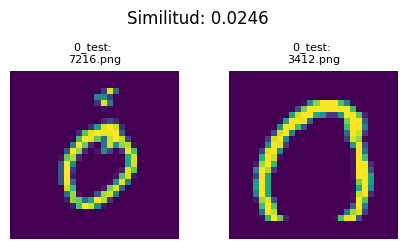

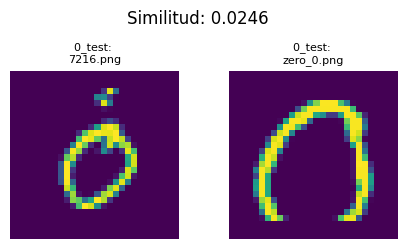

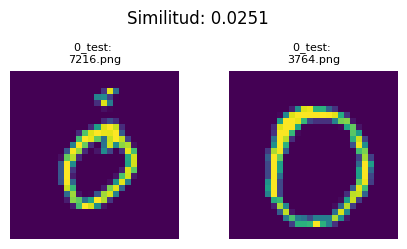

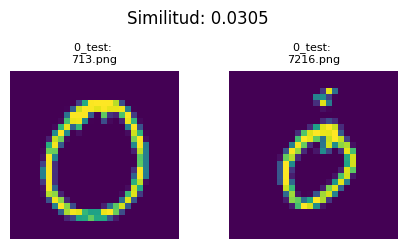

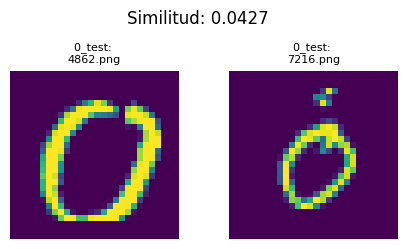

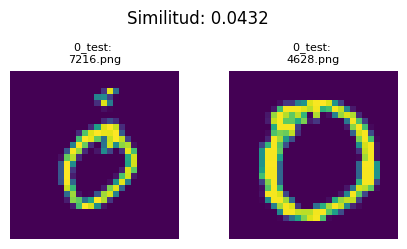

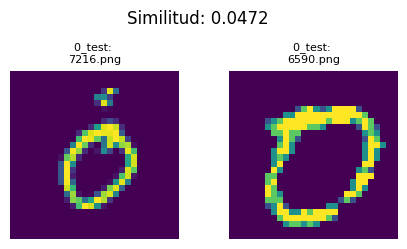

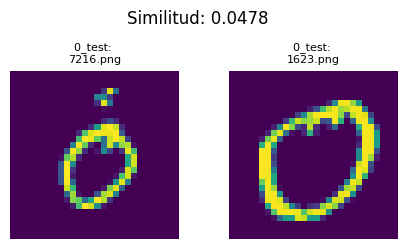

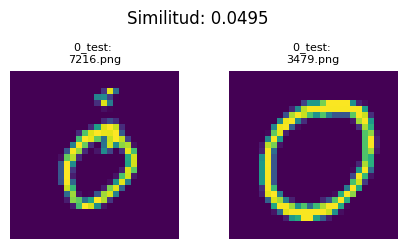

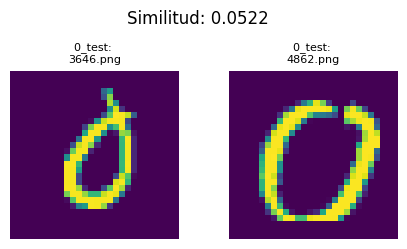

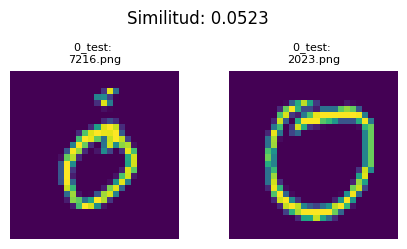

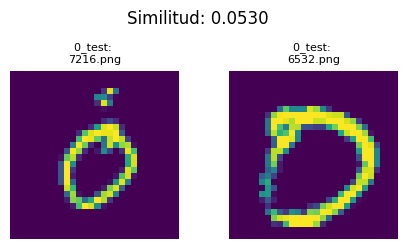

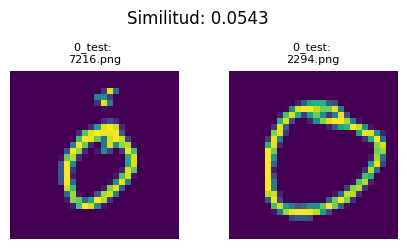

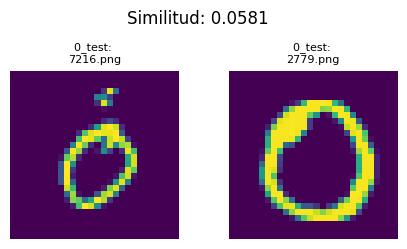

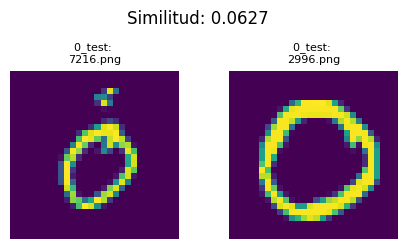

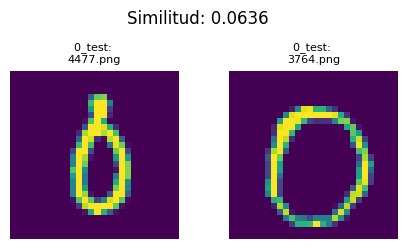

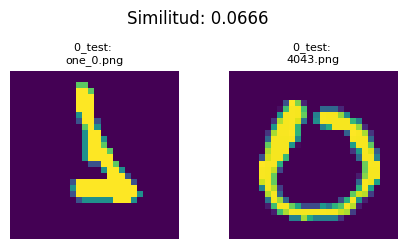

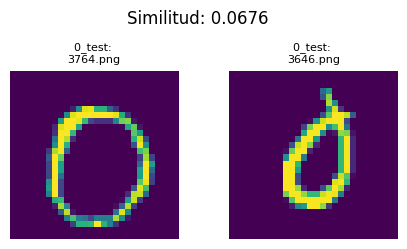

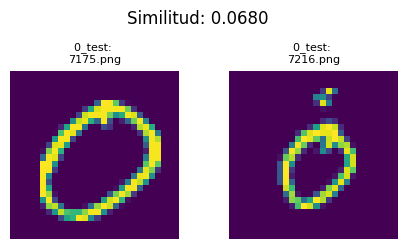

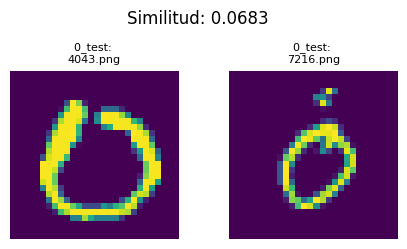

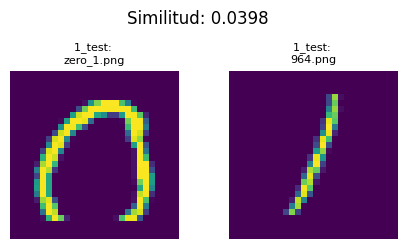

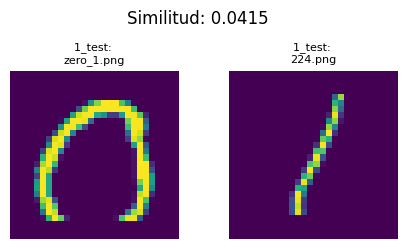

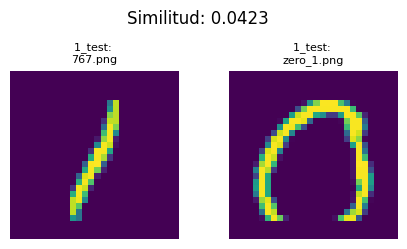

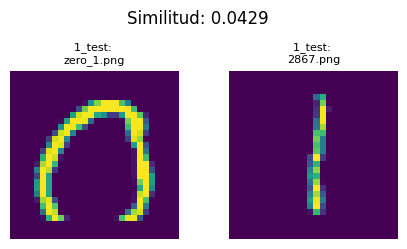

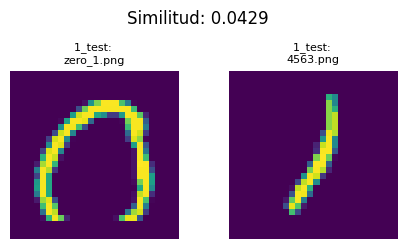

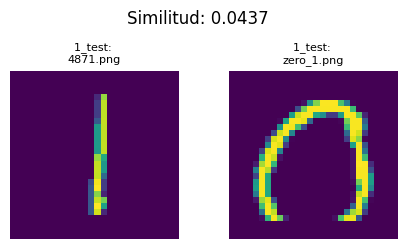

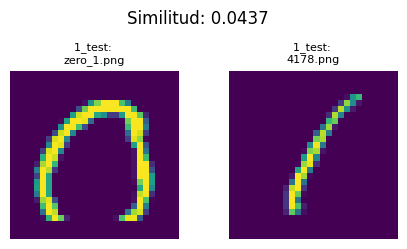

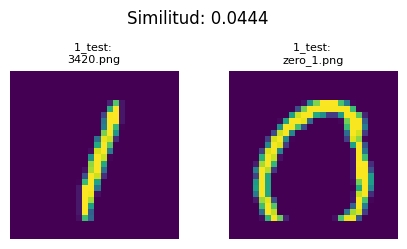

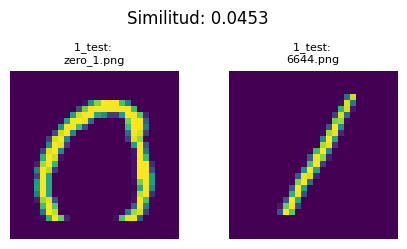

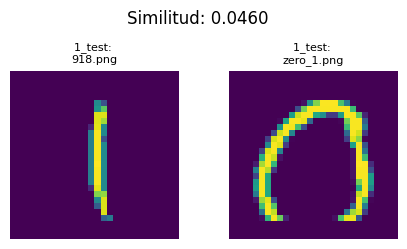

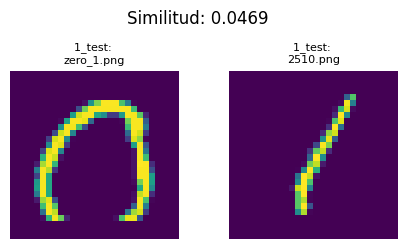

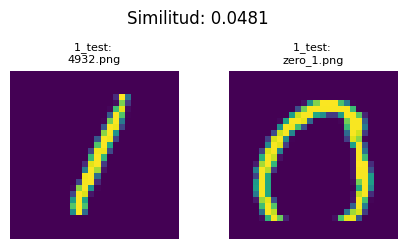

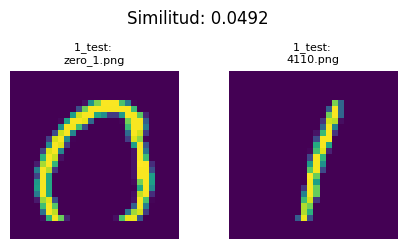

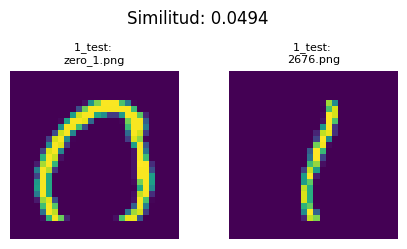

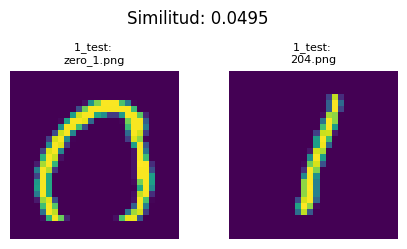

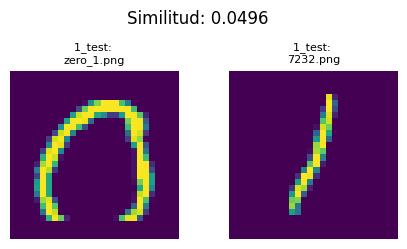

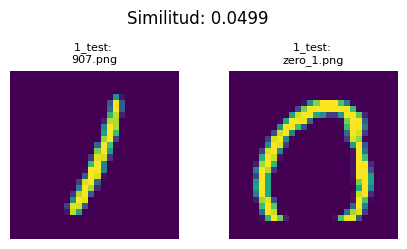

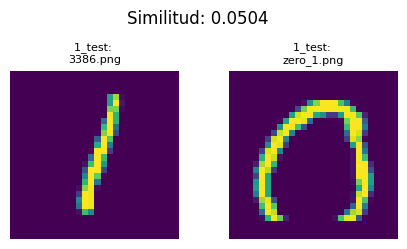

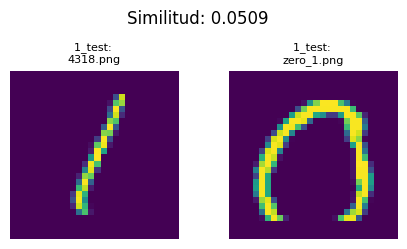

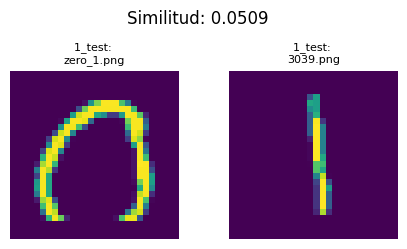

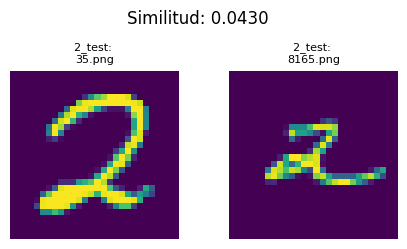

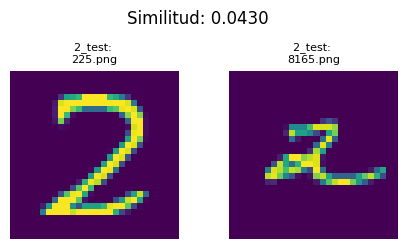

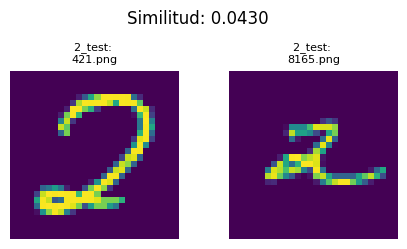

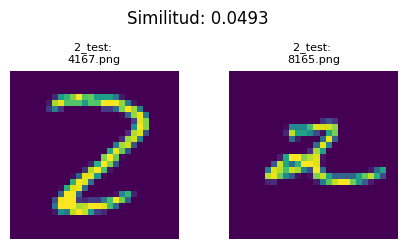

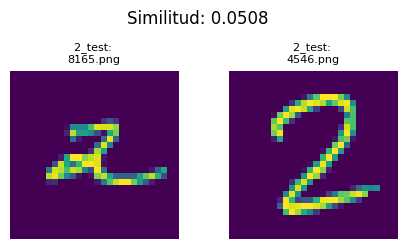

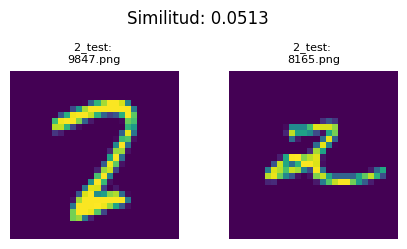

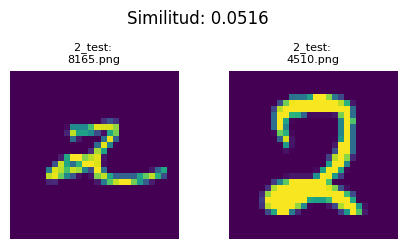

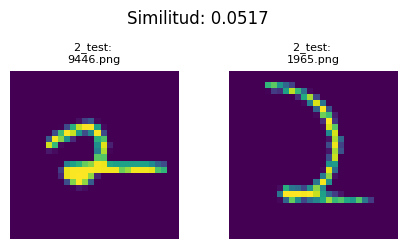

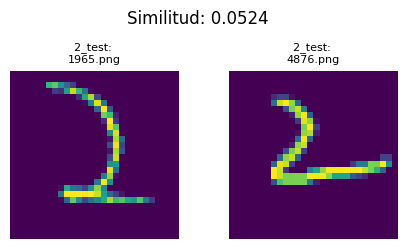

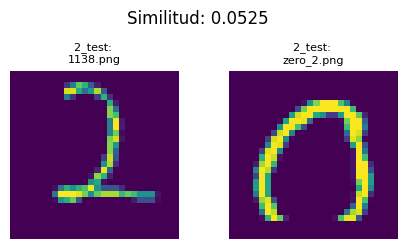

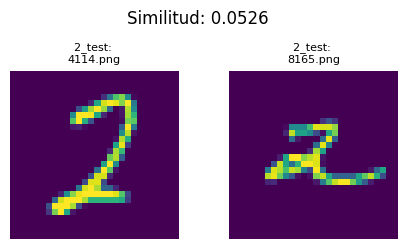

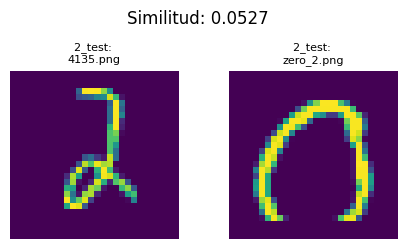

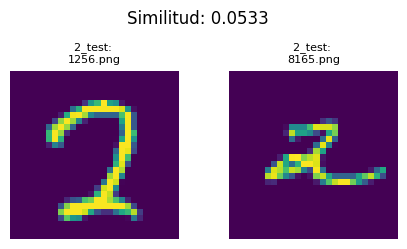

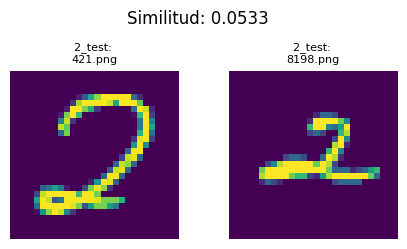

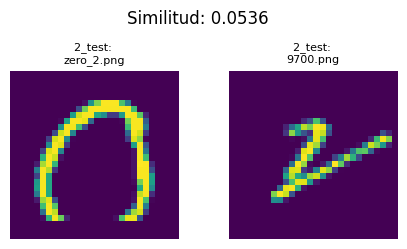

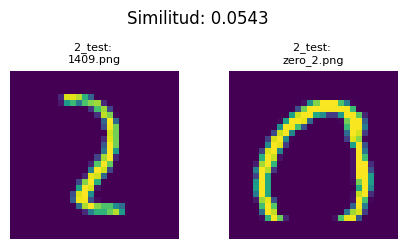

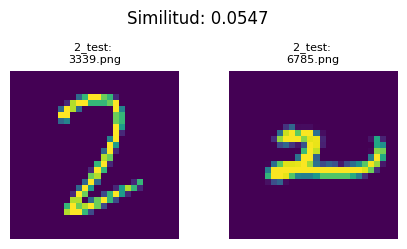

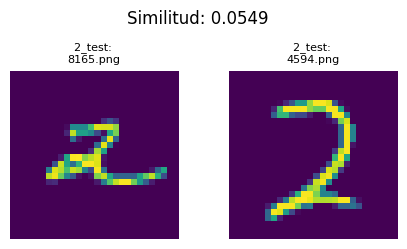

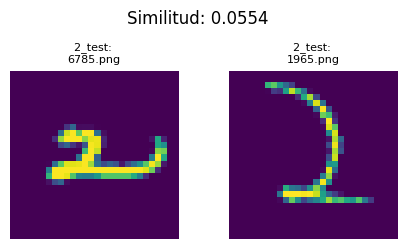

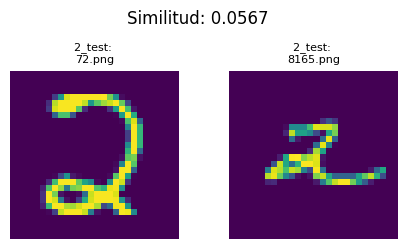

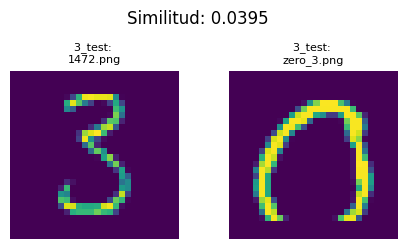

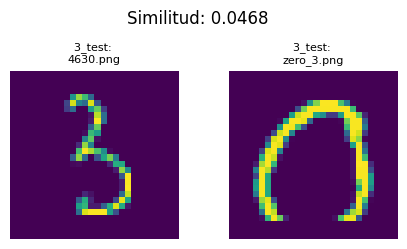

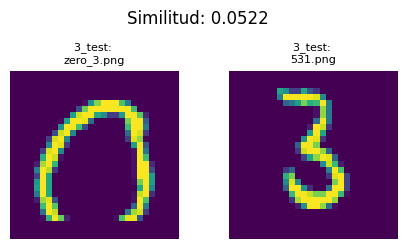

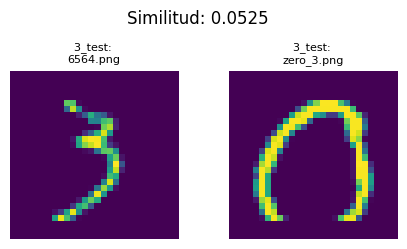

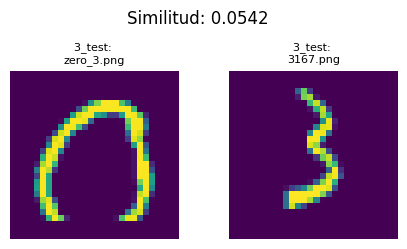

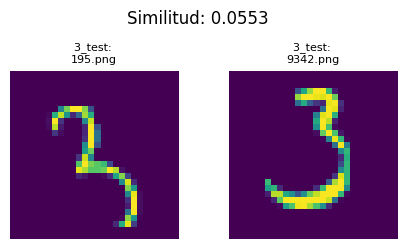

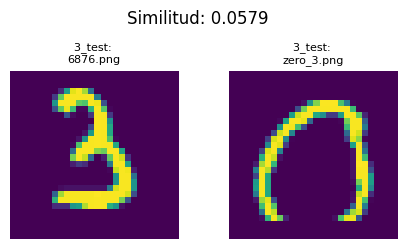

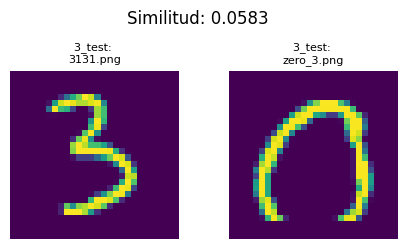

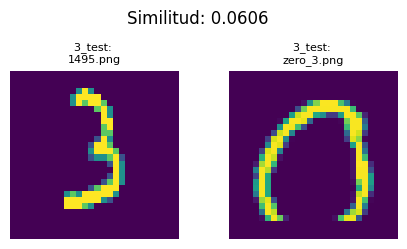

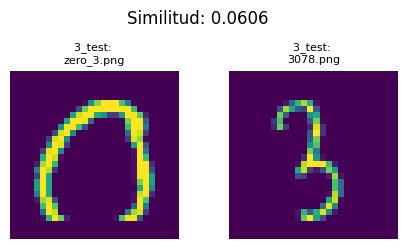

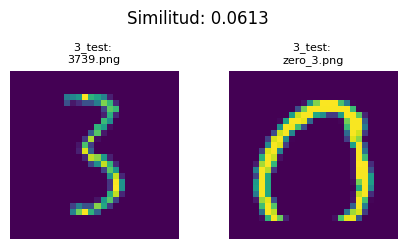

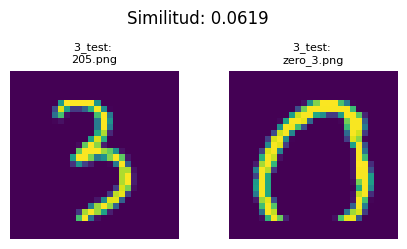

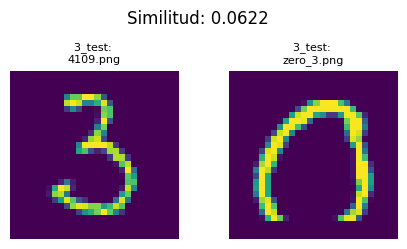

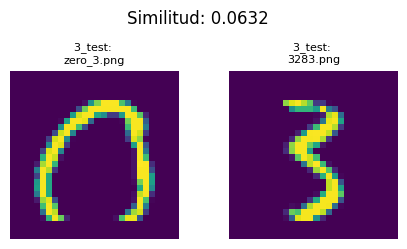

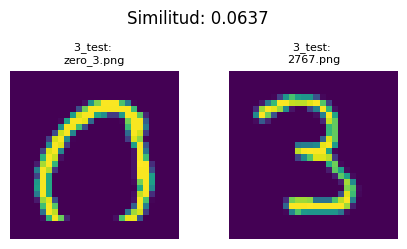

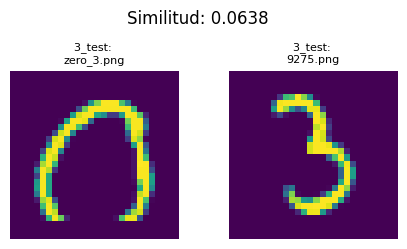

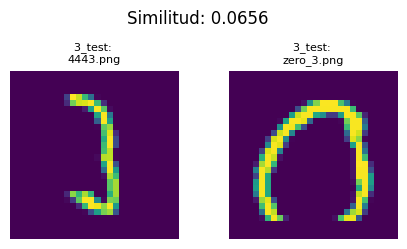

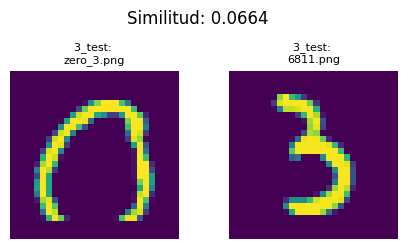

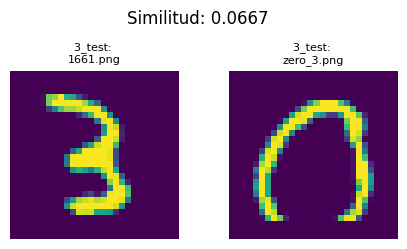

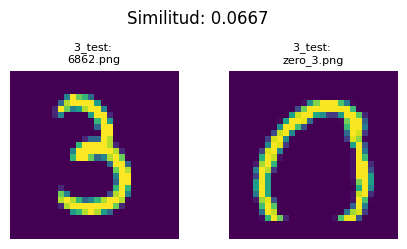

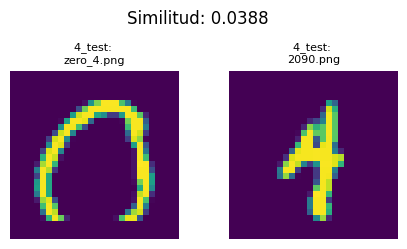

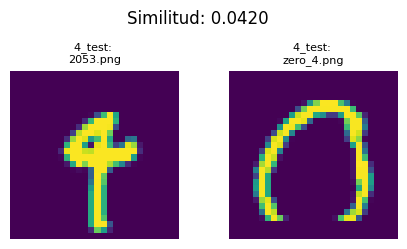

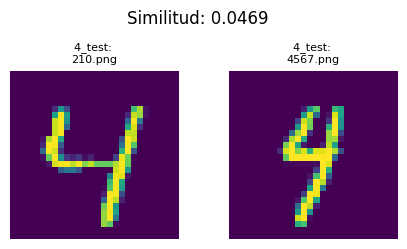

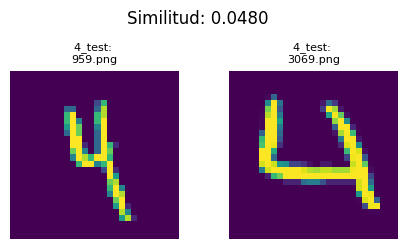

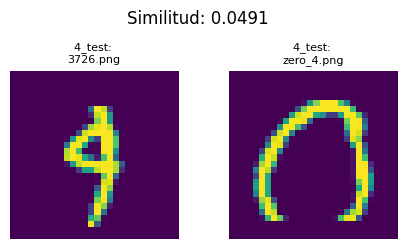

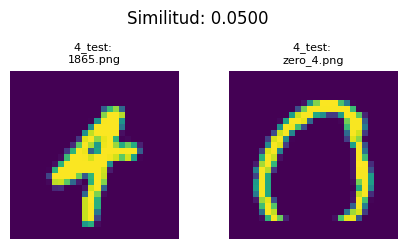

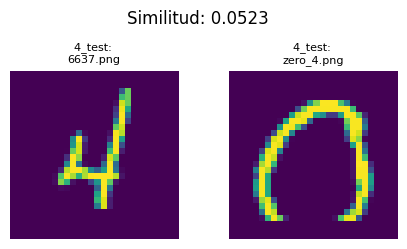

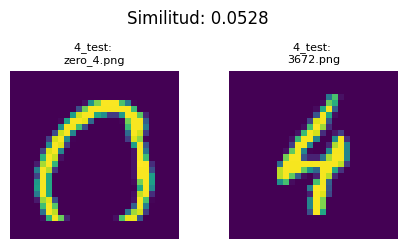

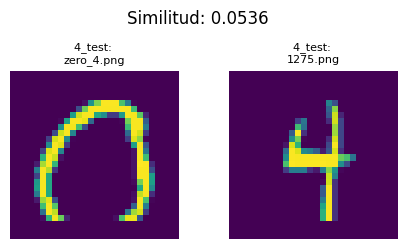

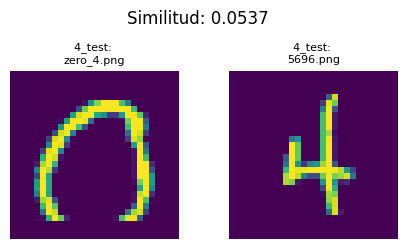

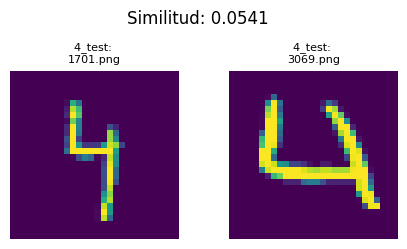

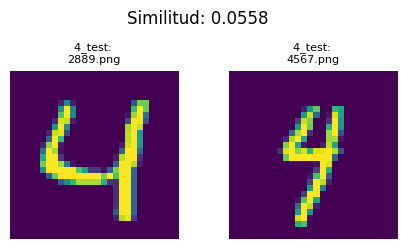

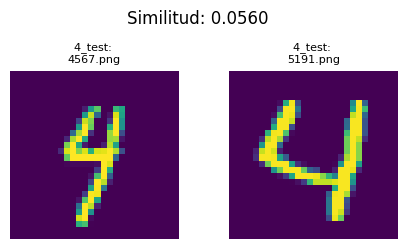

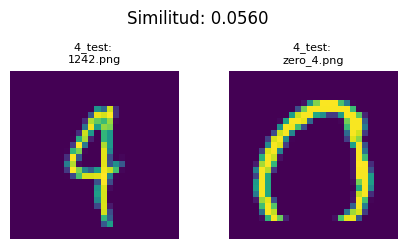

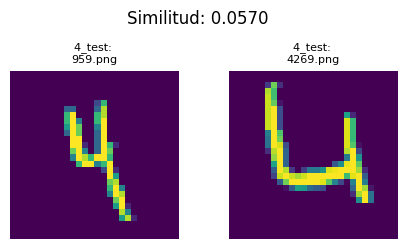

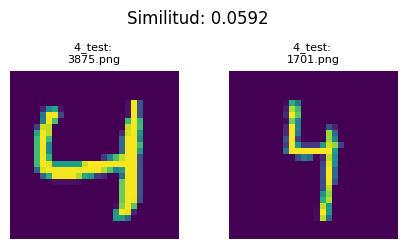

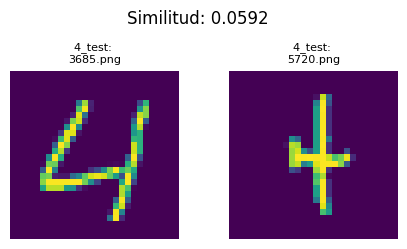

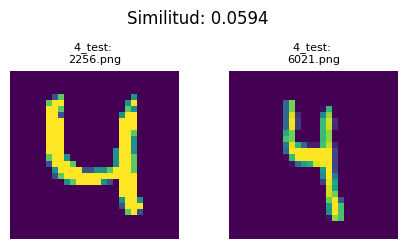

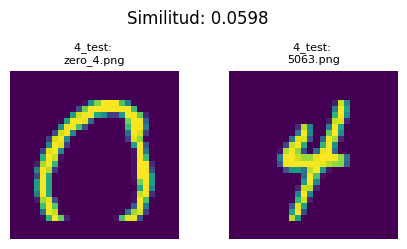

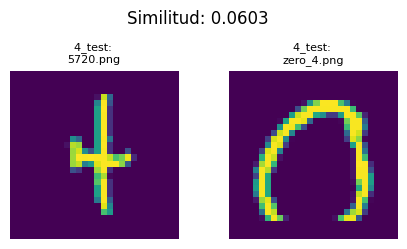

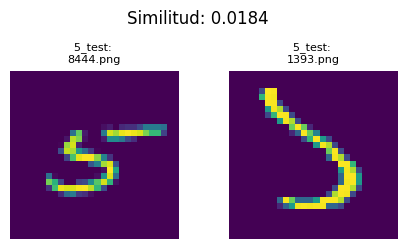

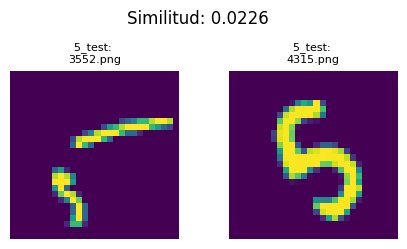

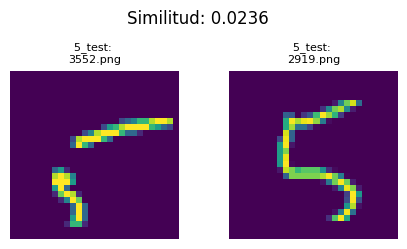

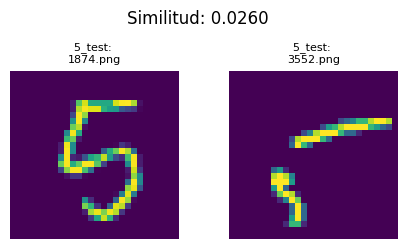

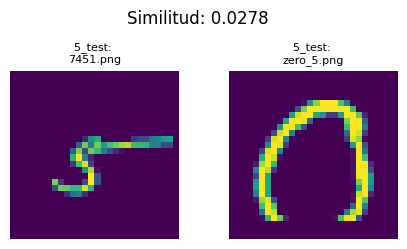

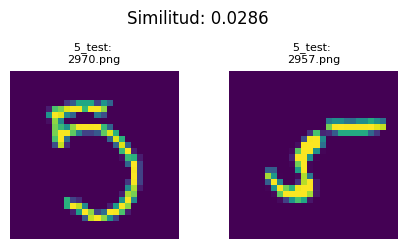

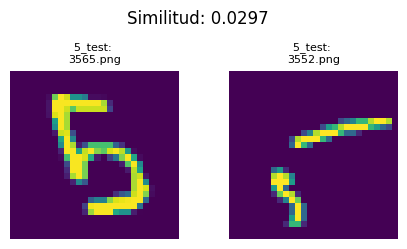

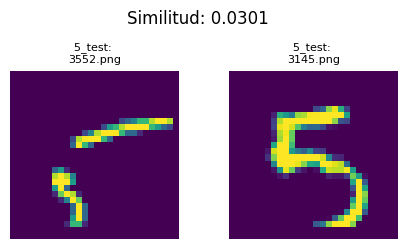

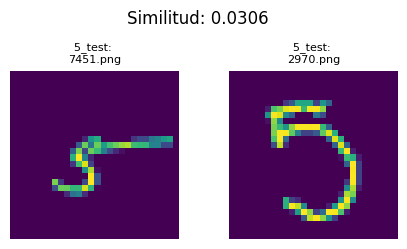

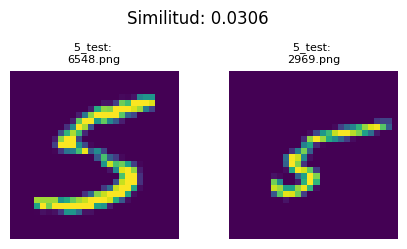

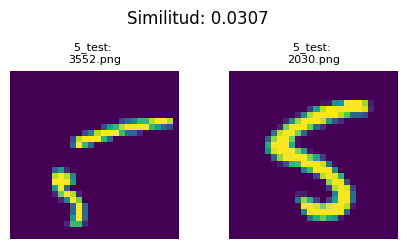

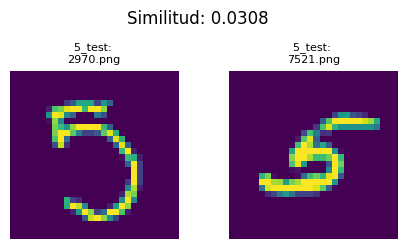

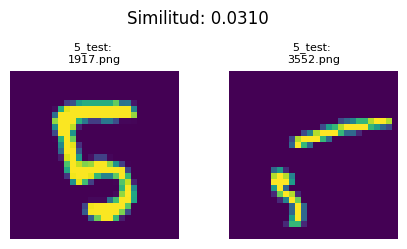

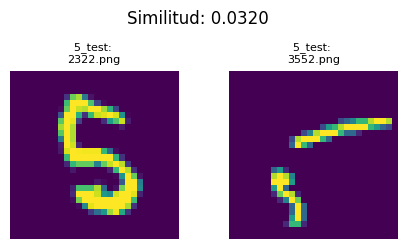

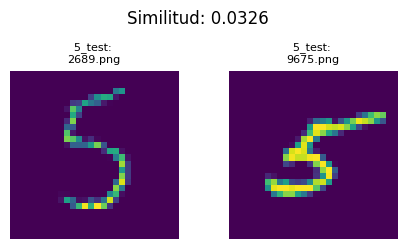

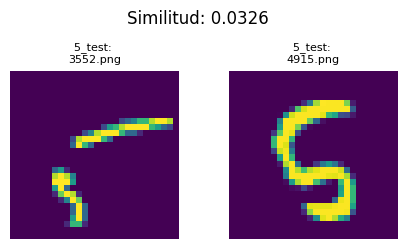

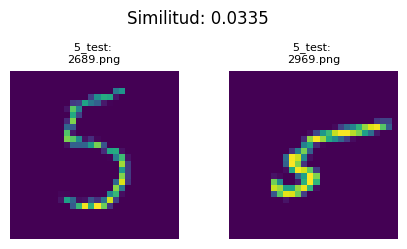

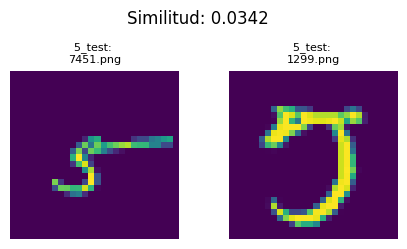

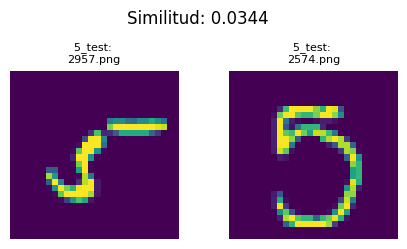

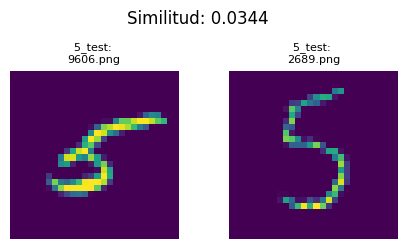

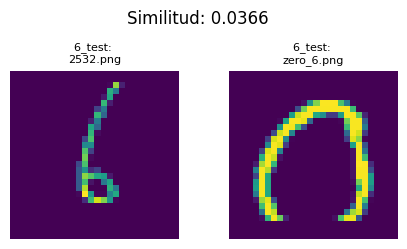

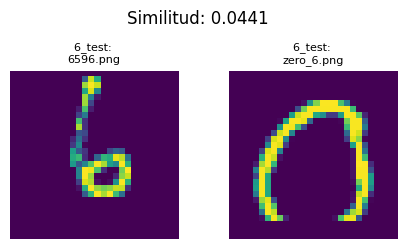

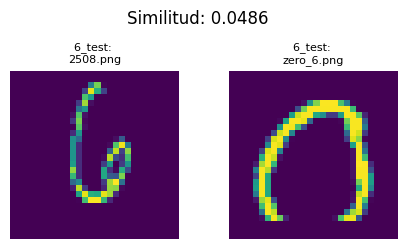

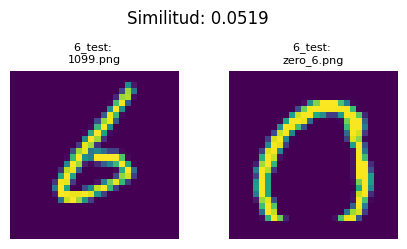

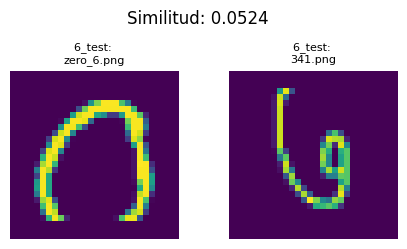

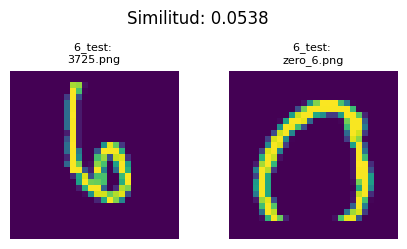

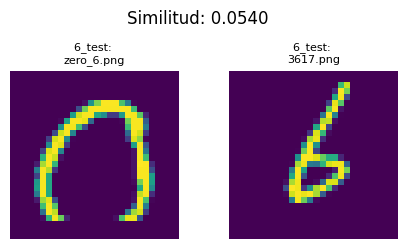

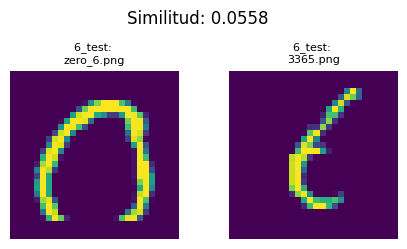

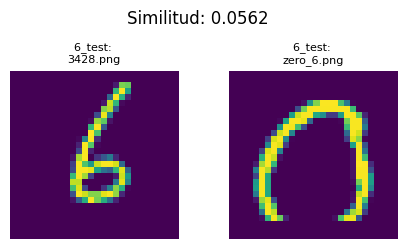

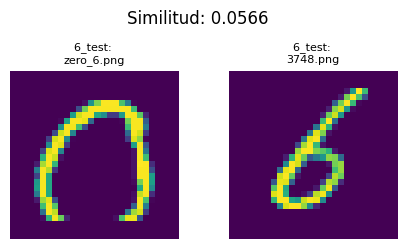

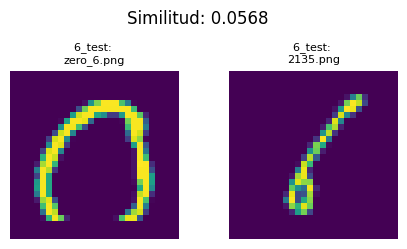

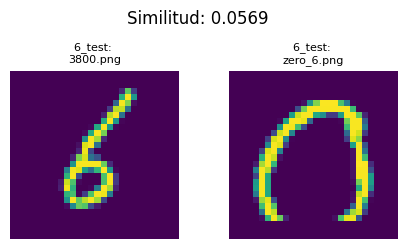

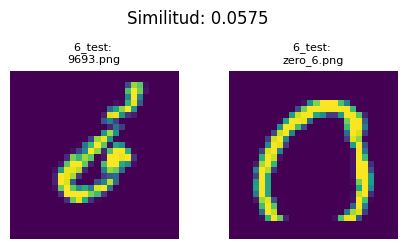

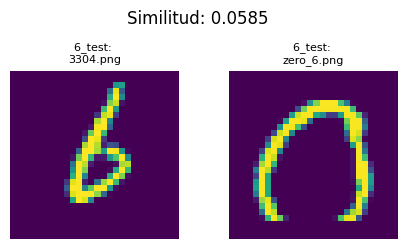

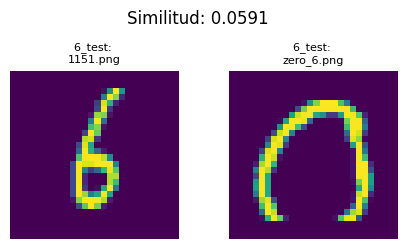

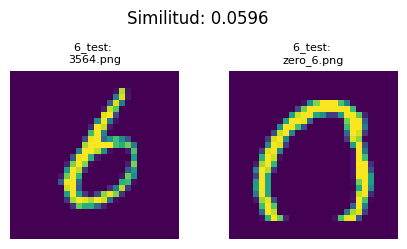

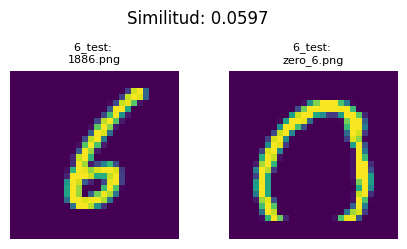

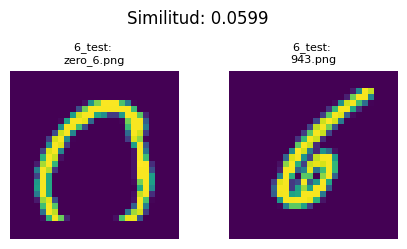

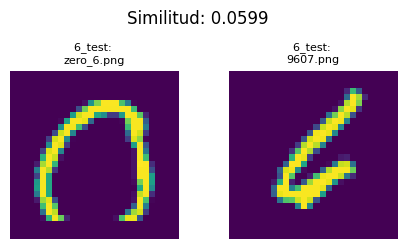

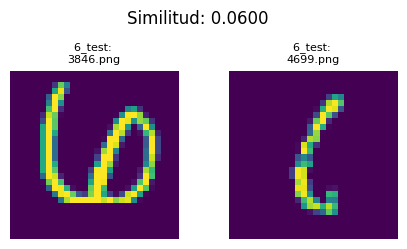

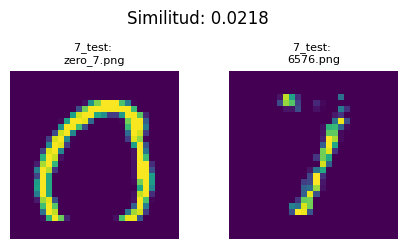

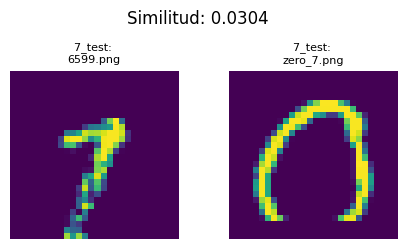

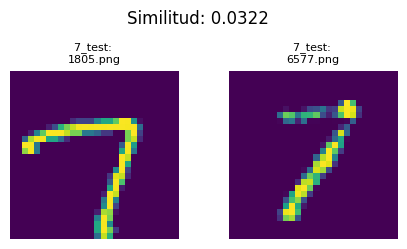

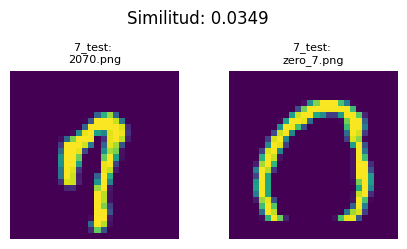

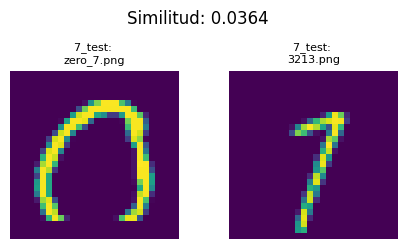

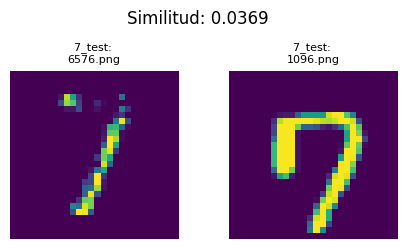

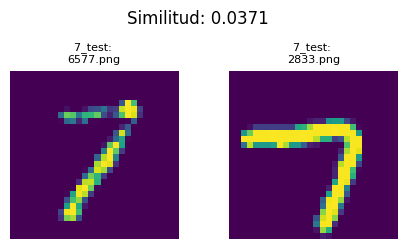

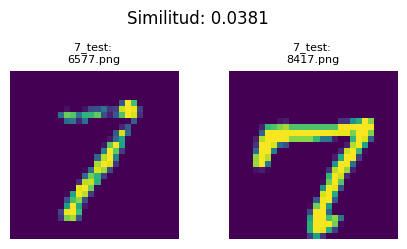

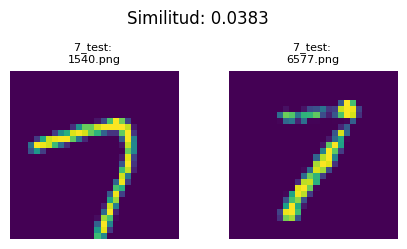

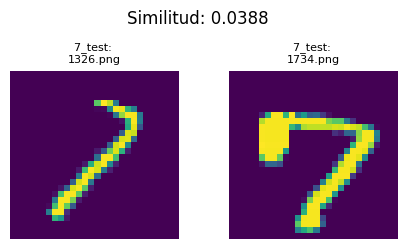

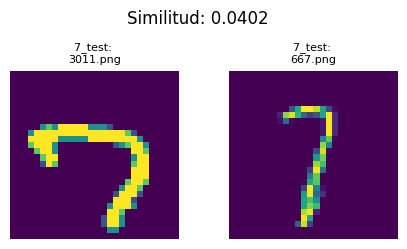

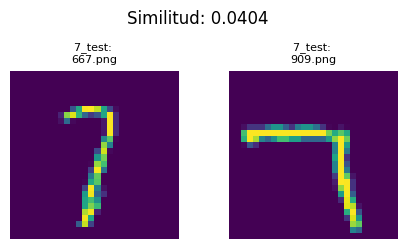

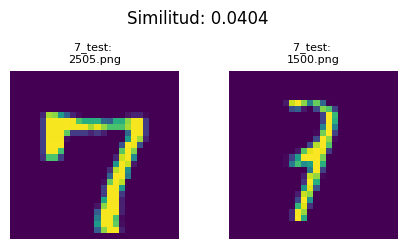

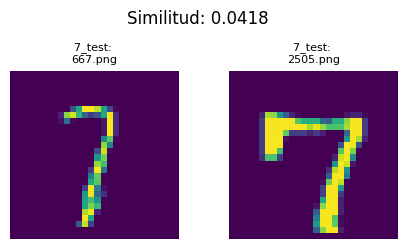

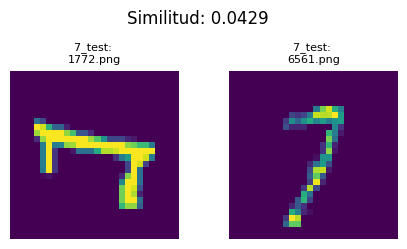

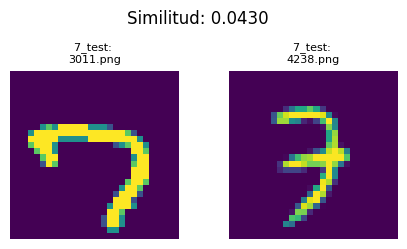

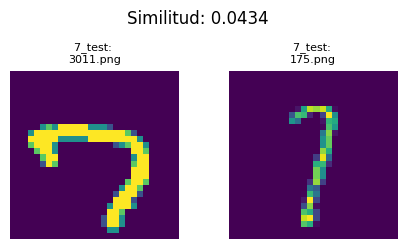

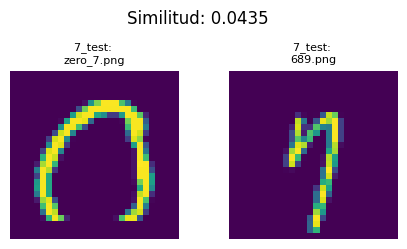

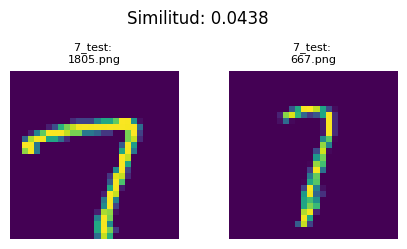

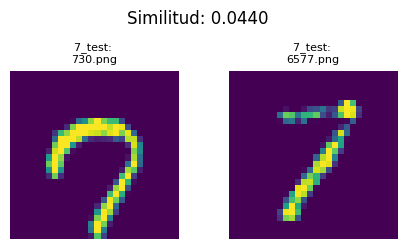

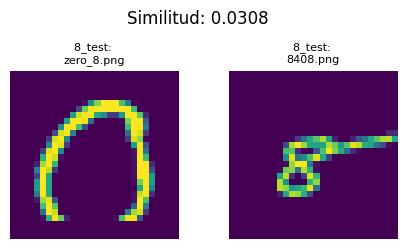

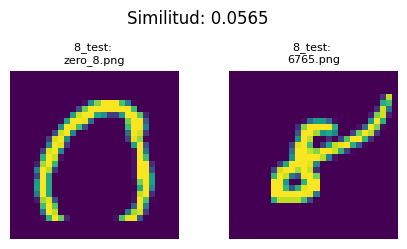

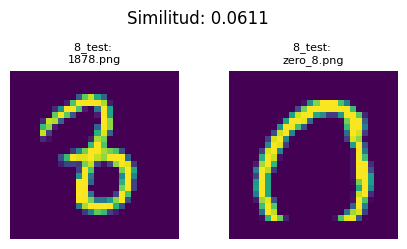

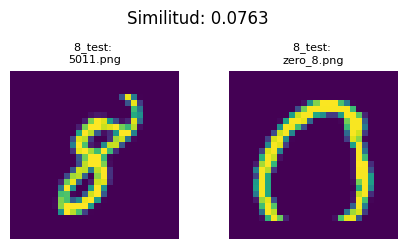

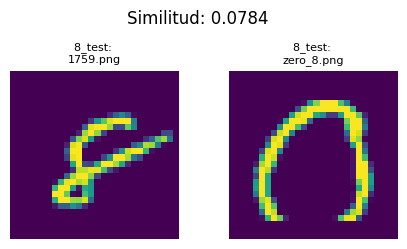

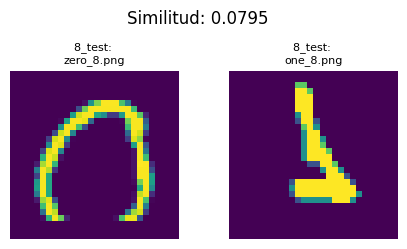

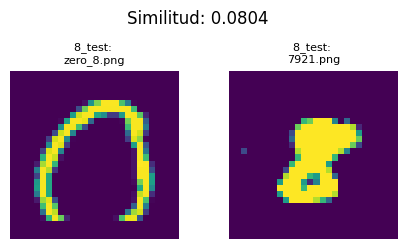

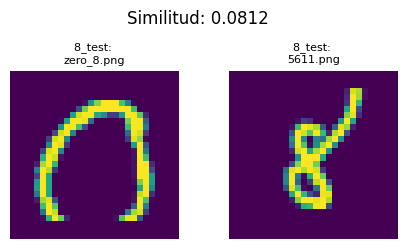

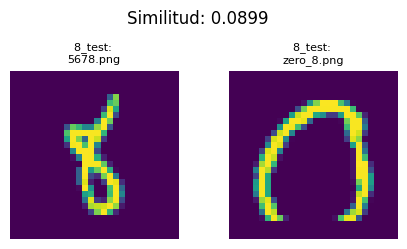

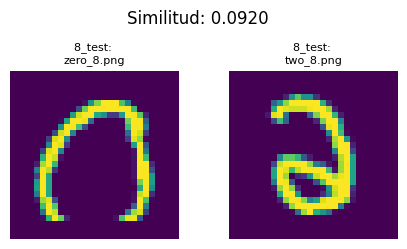

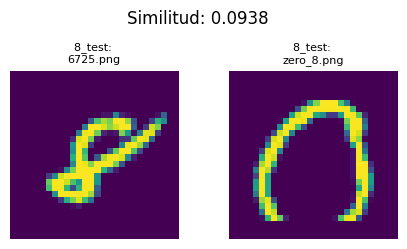

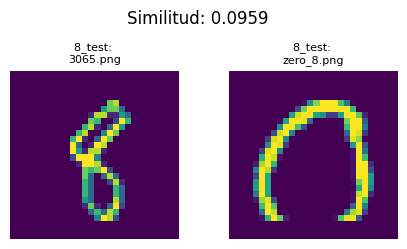

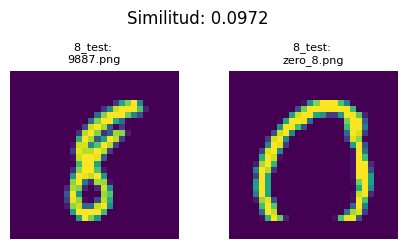

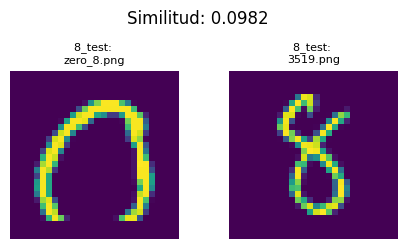

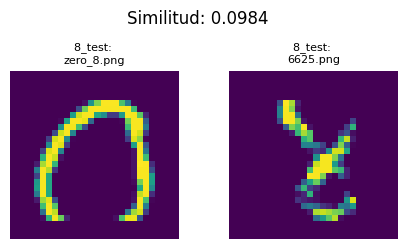

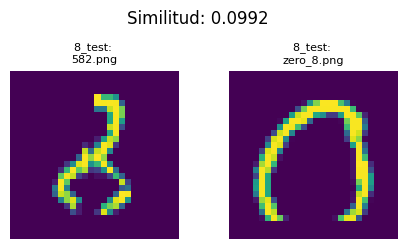

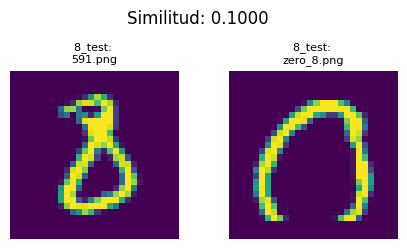

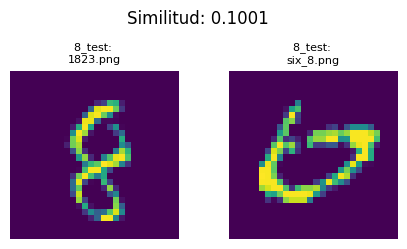

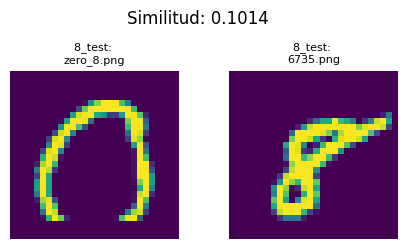

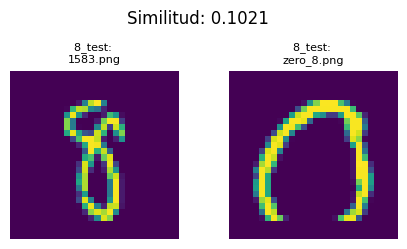

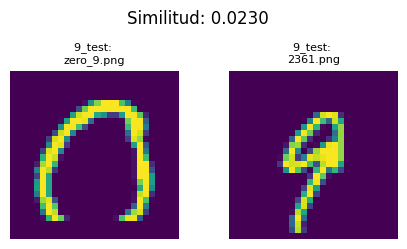

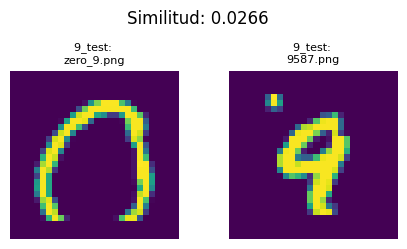

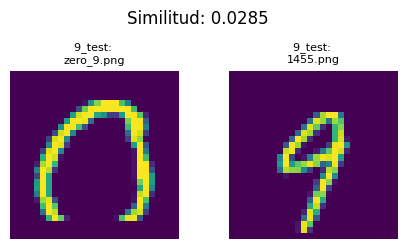

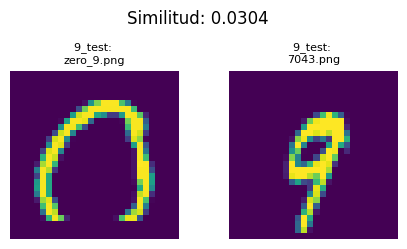

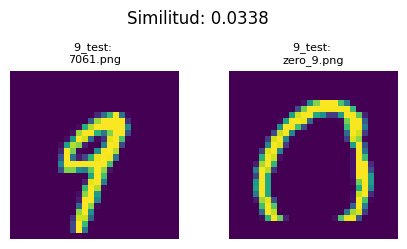

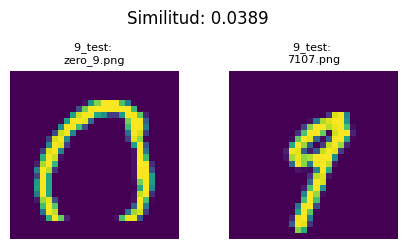

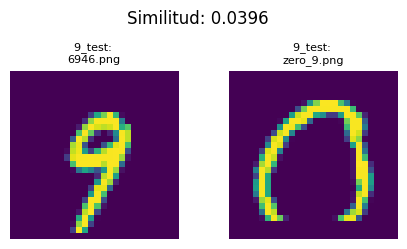

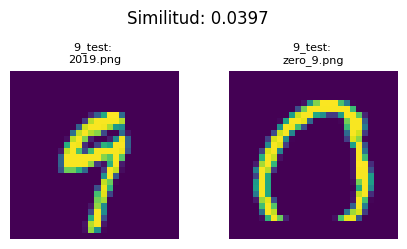

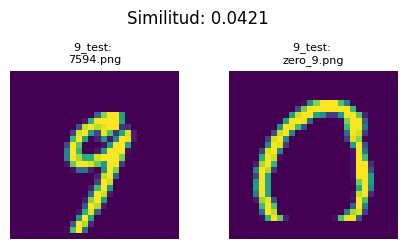

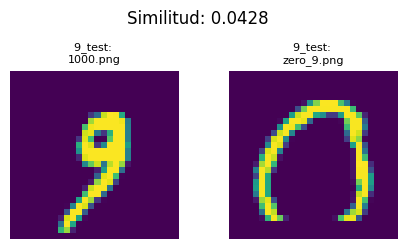

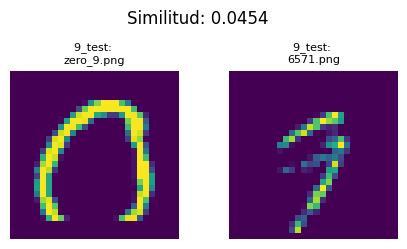

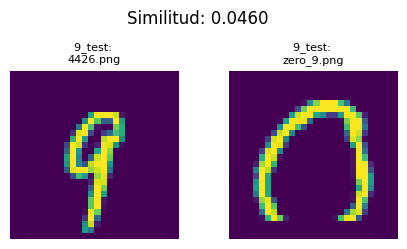

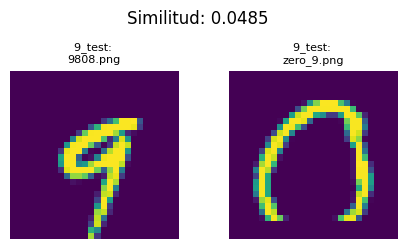

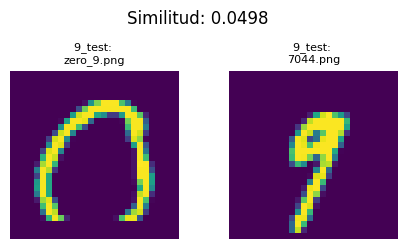

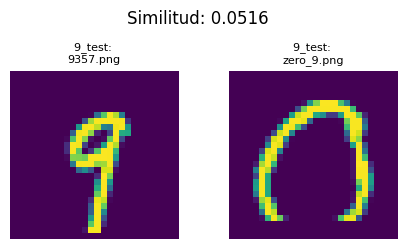

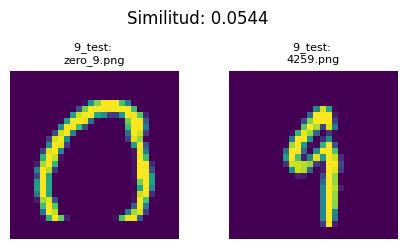

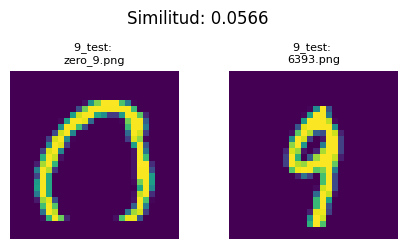

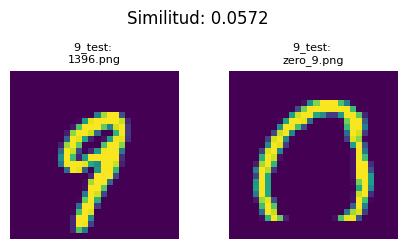

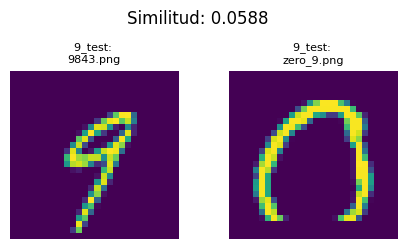

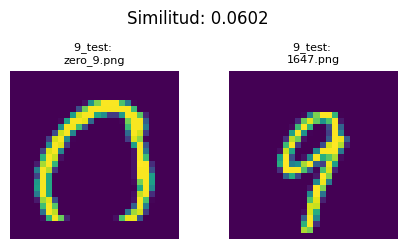

In [97]:

# Función para encontrar y mostrar las imágenes menos similares dentro de cada clase usando la matriz C  
def show_least_similar_using_C_all_classes(estimator, class_names, filenames_dict):  
    images_to_show = []  # Lista para almacenar las imágenes y sus detalles  

    # Primero, recorre las clases y genera la lista de descripciones  
    for class_intent in range(len(class_names)):  
        class_name = class_names[class_intent]  
        print(f"Clase: {class_name}")  
        
        # Obtener la matriz de similitud de las muestras dentro de la clase  
        C = estimator.C[class_intent]  

        # Imprimir la forma de la matriz de similitud de la clase  
        print(f"Forma de la matriz de la clase {class_name}: {C.shape}")
        
        # Ordenar los índices según las similitudes (de menor a mayor)  
        least_similar_indices = np.argsort(C, axis=None)  
        
        shown_pairs = set()  # Para rastrear los pares de índices ya mostrados  
        count = 0  
        show_samples = 20  # Número de muestras para visualizar la similitud  
        
        # Diccionario para contar la participación de cada imagen  
        participation_count = {}

        for idx in least_similar_indices:  
            if count >= show_samples:  
                break  
            
            # Convertir el índice plano a índice 2D  
            idx_2d = np.unravel_index(idx, C.shape)  
            
            # Saltar las comparaciones de una muestra consigo misma  
            if idx_2d[0] == idx_2d[1]:  
                continue  
            
            # Crear un par ordenado de índices para prevenir duplicados  
            index_pair = tuple(sorted((idx_2d[0], idx_2d[1])))  
            
            # Verificamos si el par ya fue mostrado  
            if index_pair in shown_pairs:  
                continue  
            
            shown_pairs.add(index_pair)  
            
            # Actualizar el conteo de participación  
            participation_count[idx_2d[0]] = participation_count.get(idx_2d[0], 0) + 1  
            participation_count[idx_2d[1]] = participation_count.get(idx_2d[1], 0) + 1

            # Obtener los índices de las muestras en el dataset  
            source_idx = estimator.class_indices[class_intent][idx_2d[0]]  
            target_idx = estimator.class_indices[class_intent][idx_2d[1]]  
            
            # Verificar que los índices estén dentro de los límites del dataset  
            if source_idx < len(filenames_dict) and target_idx < len(filenames_dict):  
                source_filename = Path(filenames_dict[int(source_idx)])  
                target_filename = Path(filenames_dict[int(target_idx)])  
                
                value = C[idx_2d]  
                
                # Formatear y mostrar la salida  
                print(f"\t{source_filename.name} ({class_name}) vs {target_filename.name} ({class_name}), Similitud: {value:.4f}")  
                
                # Agrega los detalles a la lista para visualización  
                images_to_show.append((source_filename, target_filename, class_name, value))  
                
                count += 1  
    

        # Encontrar las muestras más atípicas  
        most_atypical = sorted(participation_count.items(), key=lambda x: -x[1])  
        
        # Mostrar las 10 más atípicas  
        print("\nMuestras más atípicas de esta clase:")  
        for rank, (img_idx, freq) in enumerate(most_atypical[:10], 1):  
            img_name = Path(filenames_dict[int(estimator.class_indices[class_intent][img_idx])]).name  
            print(f"\t#{rank}: {img_name} con {freq} apariciones")  
        print("\n")


    # Luego, realiza la visualización de las imágenes  
    for source_filename, target_filename, class_name, value in images_to_show:  
        img_source = plt.imread(source_filename)  
        img_target = plt.imread(target_filename)  
        
        fig, axs = plt.subplots(1, 2, figsize=(5, 3))  
        axs[0].imshow(img_source)  
        axs[0].set_title(f"{class_name}: \n{source_filename.name}", fontsize=8) 
        axs[0].axis('off')  # Elimina los ejes para centrar la atención en la imagen  
        
        axs[1].imshow(img_target)  
        axs[1].set_title(f"{class_name}: \n{target_filename.name}", fontsize=8)  
        axs[1].axis('off') 
        plt.suptitle(f"Similitud: {value:.4f}")  
        plt.subplots_adjust(wspace=0.3, hspace=0.3)  # Ajusta el espacio entre subtramas  
        plt.show()  


print("Muestras menos similares entre las imágenes de la misma clase \n")  
show_least_similar_using_C_all_classes(estimator, class_names_test, filenames_dict)

# Visualizar promedios de las muestras menos similares

Muestras con menor valor de promedio de similitud:


Clase: 0_test
Forma de la matriz de la clase 0_test: (990, 990)
	Muestra: 6651.png (0_test), Promedio de Similitud: 0.2237
	Muestra: one_0.png (0_test), Promedio de Similitud: 0.2630
	Muestra: 443.png (0_test), Promedio de Similitud: 0.2948
	Muestra: 2185.png (0_test), Promedio de Similitud: 0.2996
	Muestra: 9879.png (0_test), Promedio de Similitud: 0.3024
	Muestra: 4065.png (0_test), Promedio de Similitud: 0.3161
	Muestra: 7216.png (0_test), Promedio de Similitud: 0.3188
	Muestra: 9634.png (0_test), Promedio de Similitud: 0.3249
	Muestra: 380.png (0_test), Promedio de Similitud: 0.3294
	Muestra: 4477.png (0_test), Promedio de Similitud: 0.3315
	Muestra: 3710.png (0_test), Promedio de Similitud: 0.3408
	Muestra: 9677.png (0_test), Promedio de Similitud: 0.3445
	Muestra: 2932.png (0_test), Promedio de Similitud: 0.3450
	Muestra: 1468.png (0_test), Promedio de Similitud: 0.3500
	Muestra: 3818.png (0_test), Promedio de Similitud: 0.3513

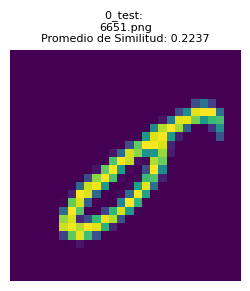

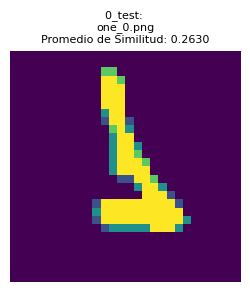

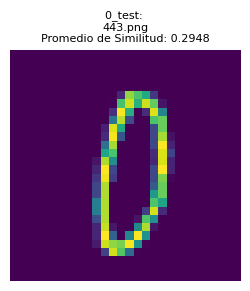

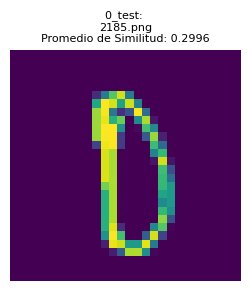

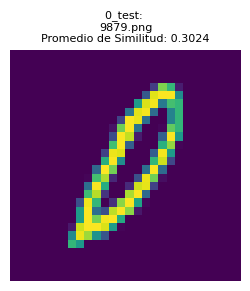

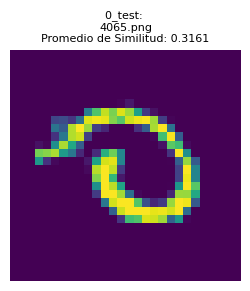

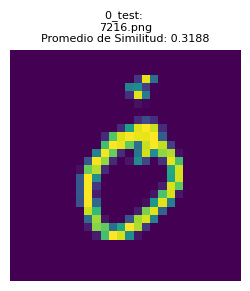

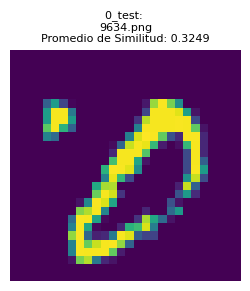

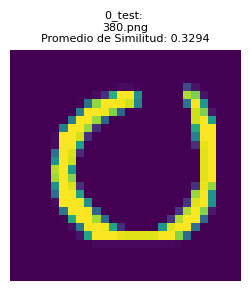

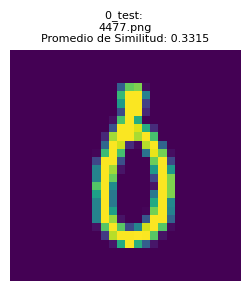

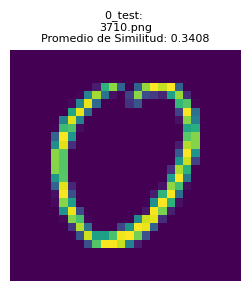

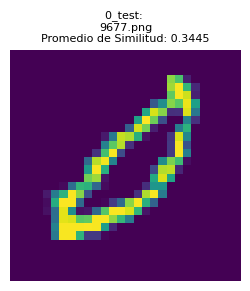

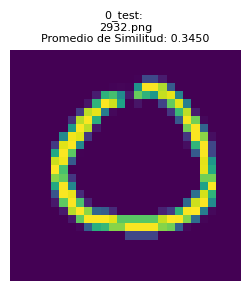

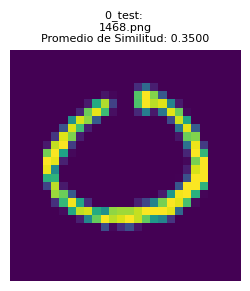

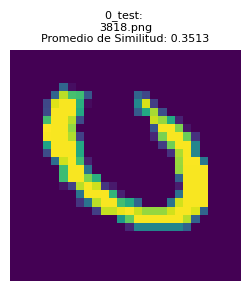

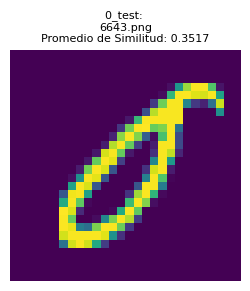

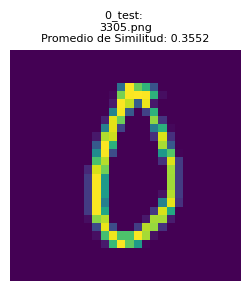

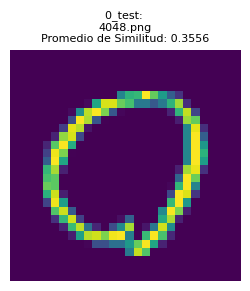

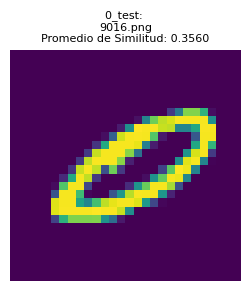

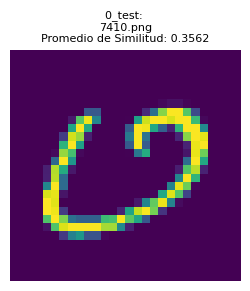

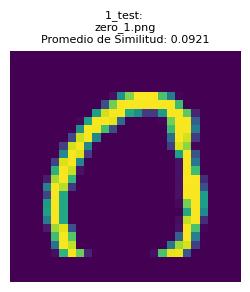

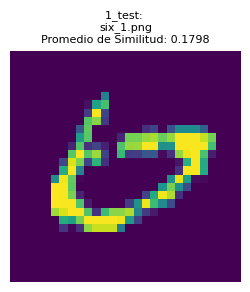

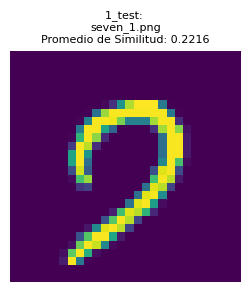

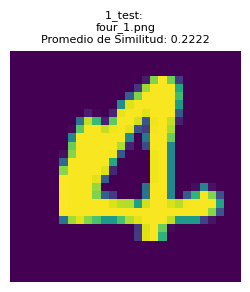

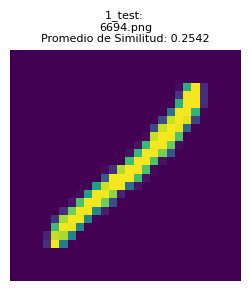

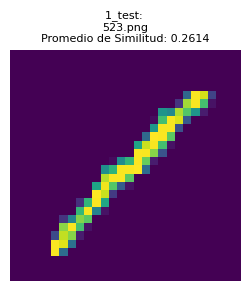

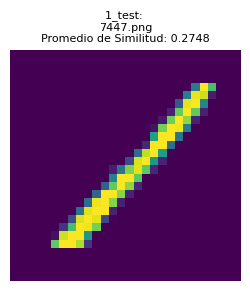

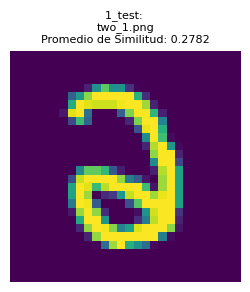

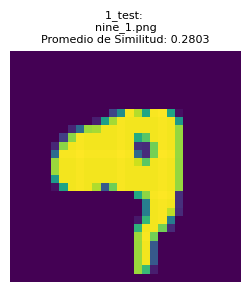

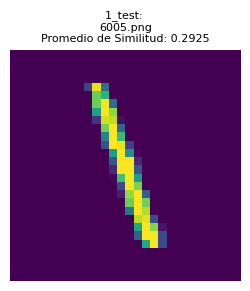

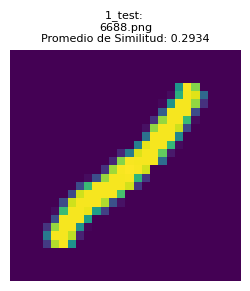

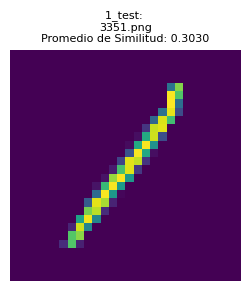

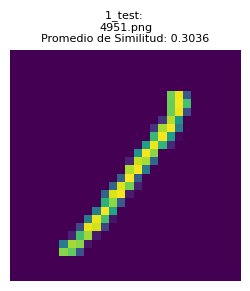

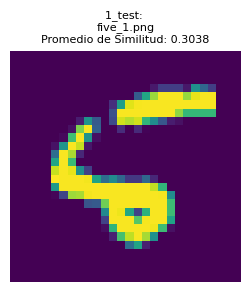

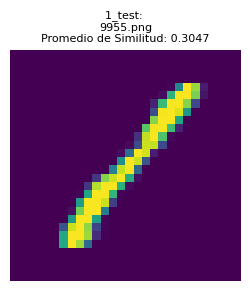

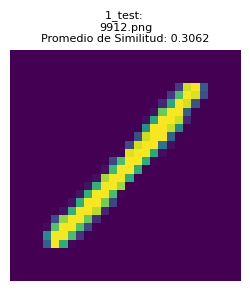

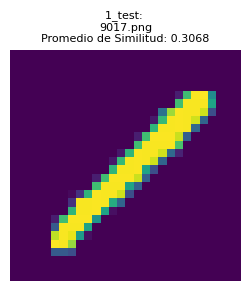

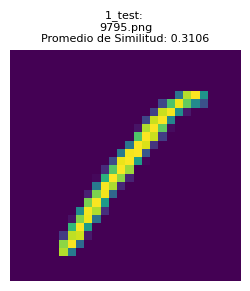

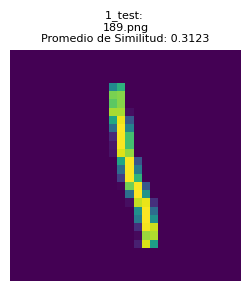

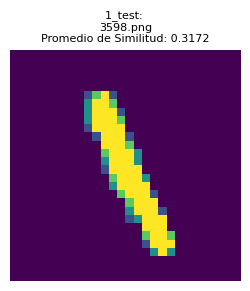

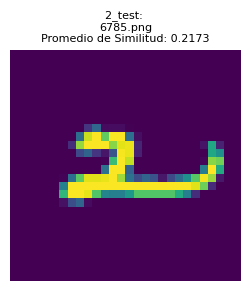

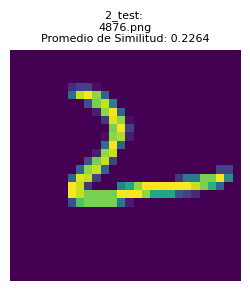

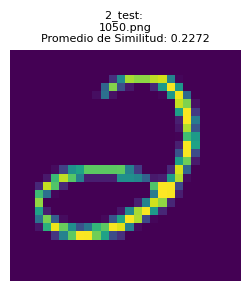

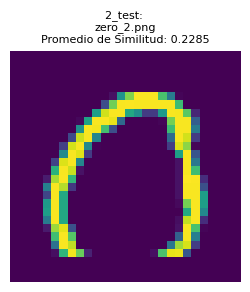

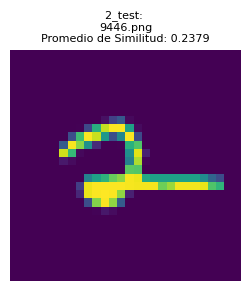

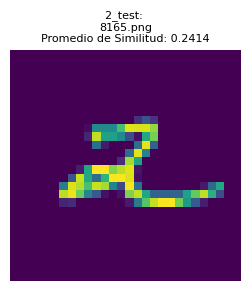

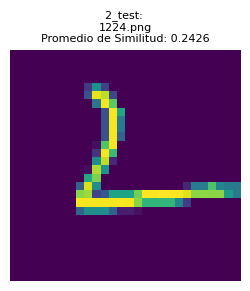

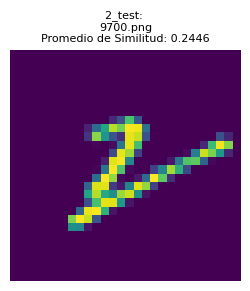

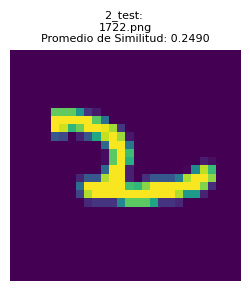

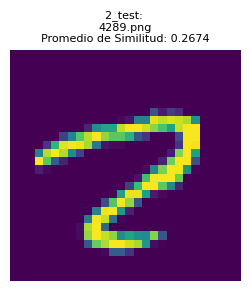

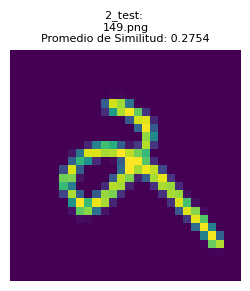

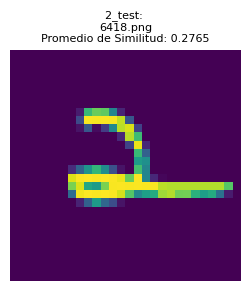

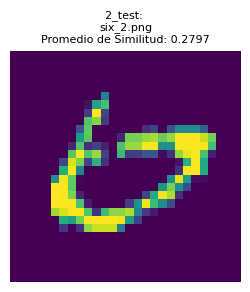

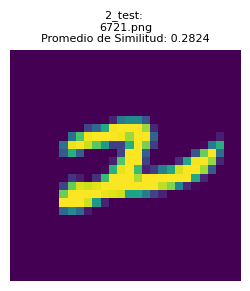

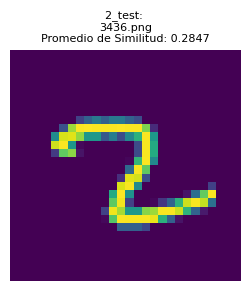

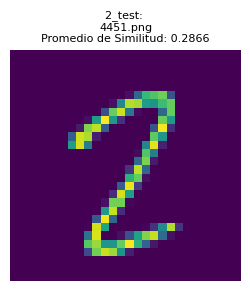

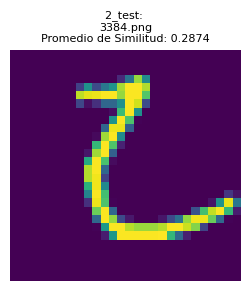

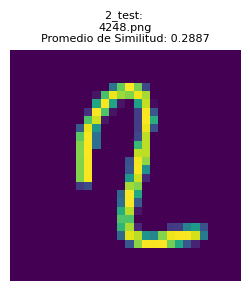

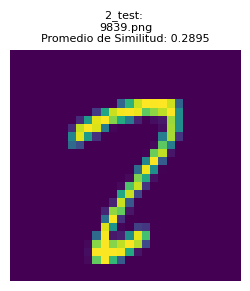

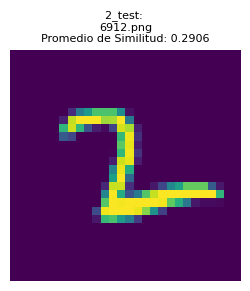

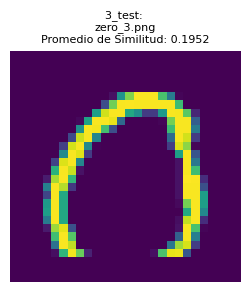

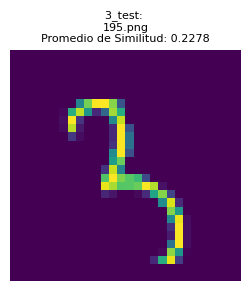

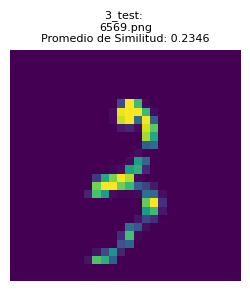

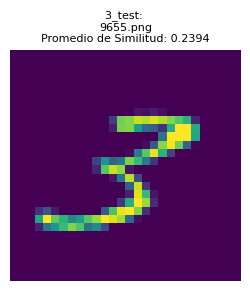

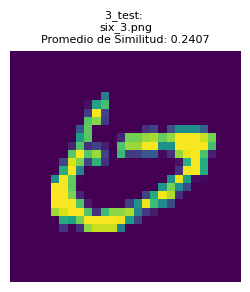

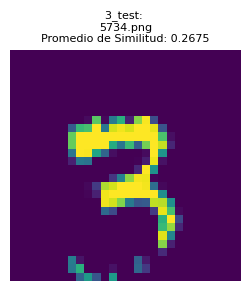

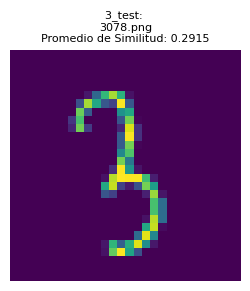

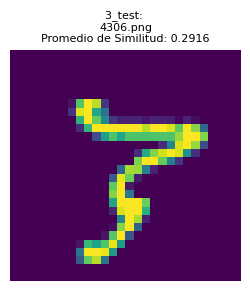

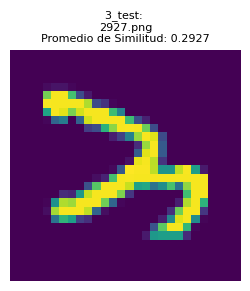

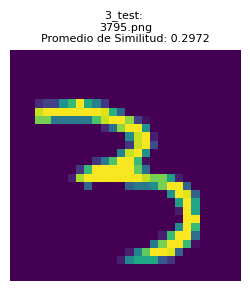

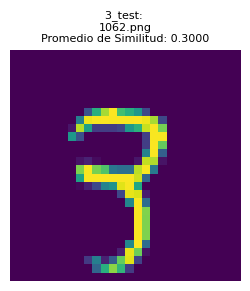

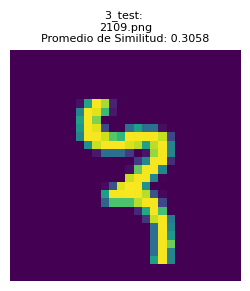

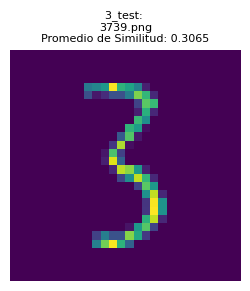

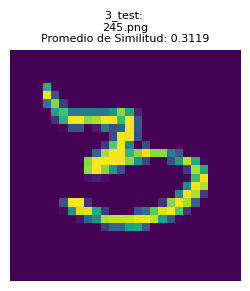

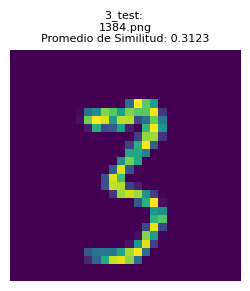

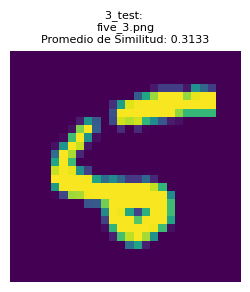

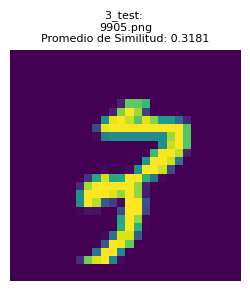

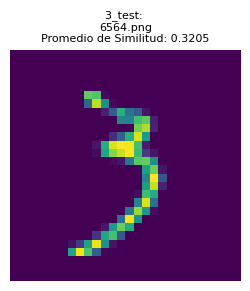

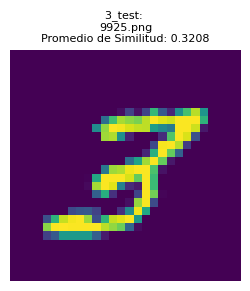

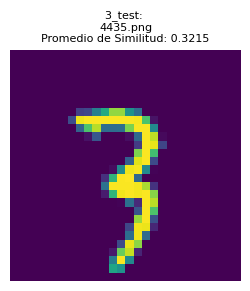

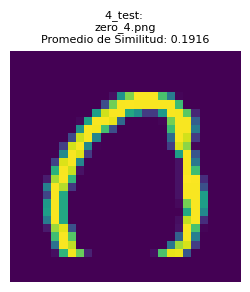

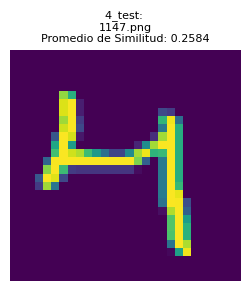

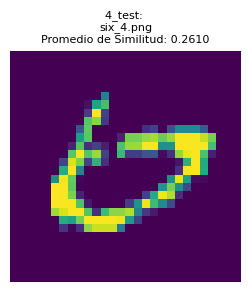

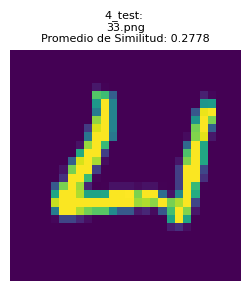

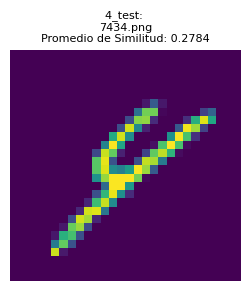

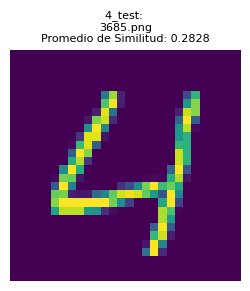

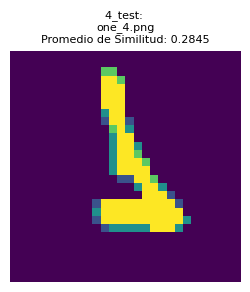

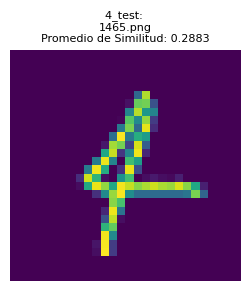

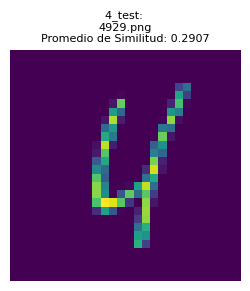

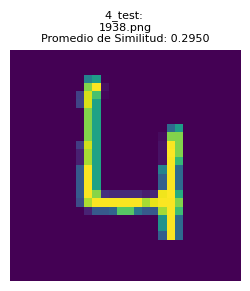

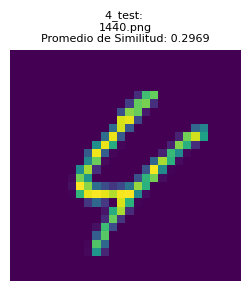

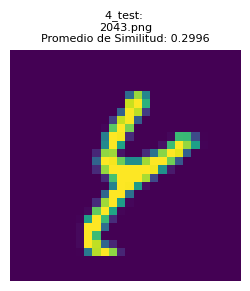

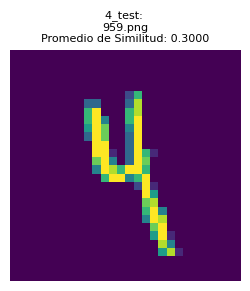

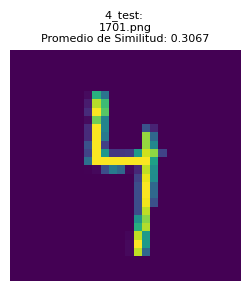

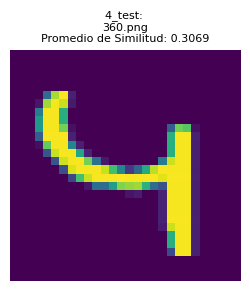

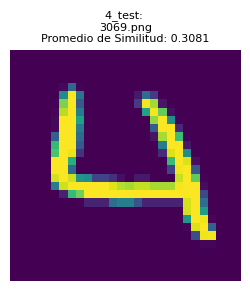

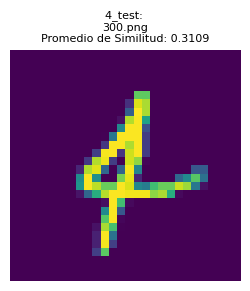

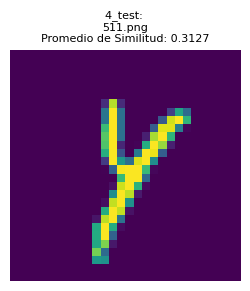

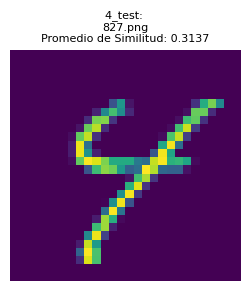

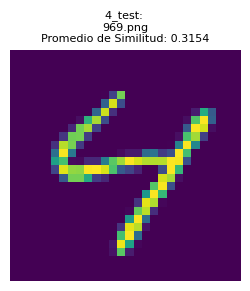

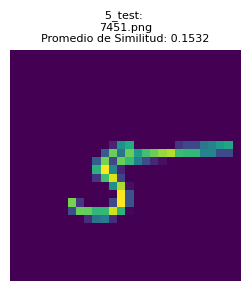

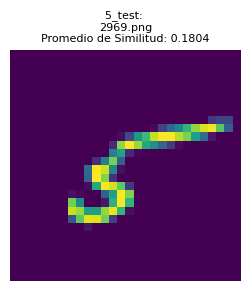

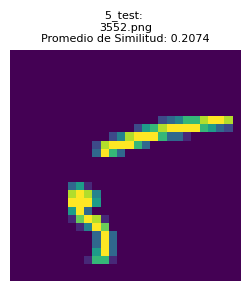

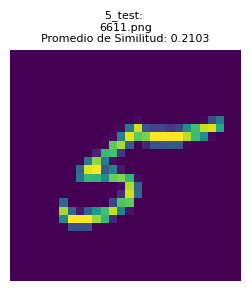

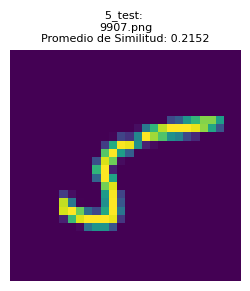

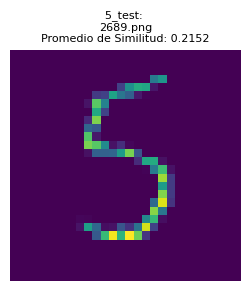

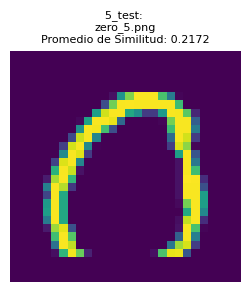

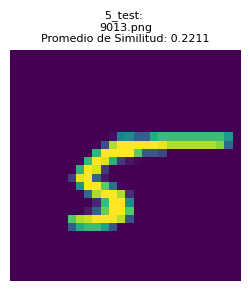

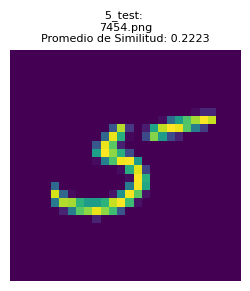

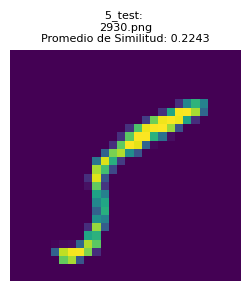

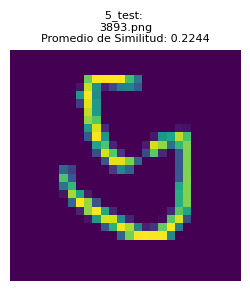

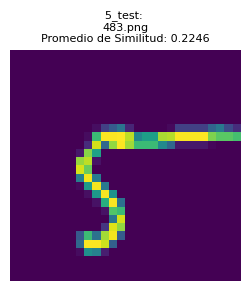

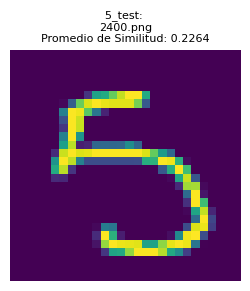

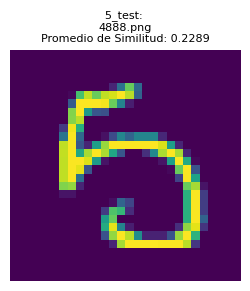

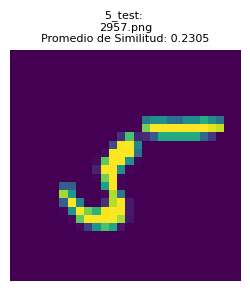

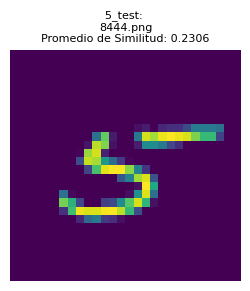

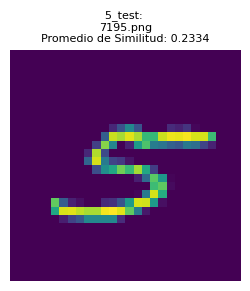

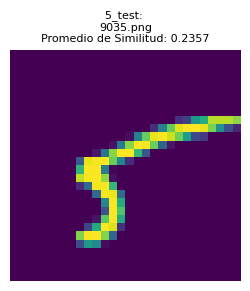

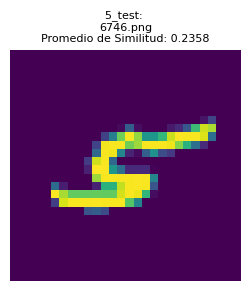

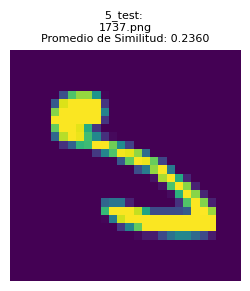

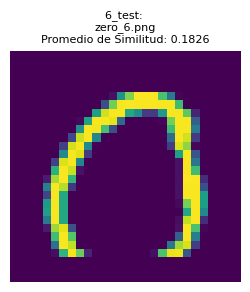

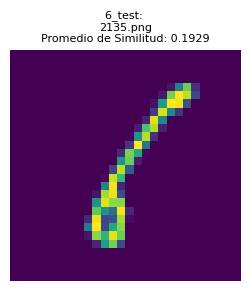

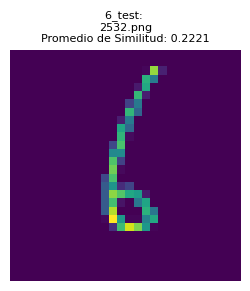

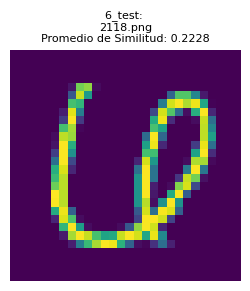

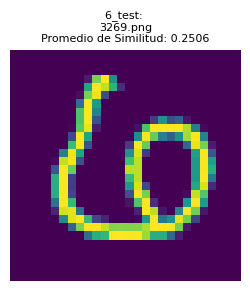

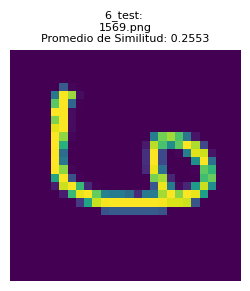

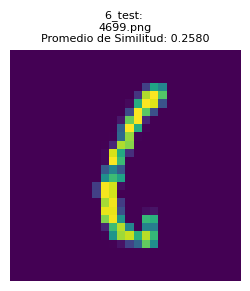

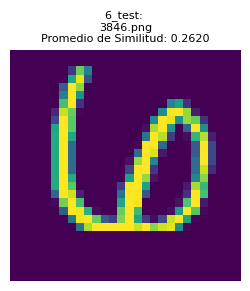

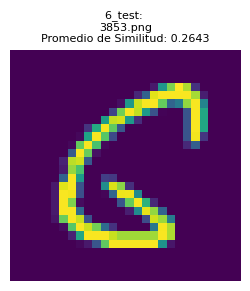

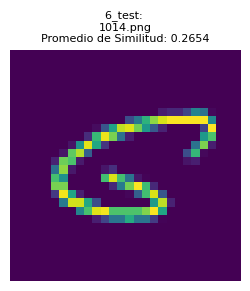

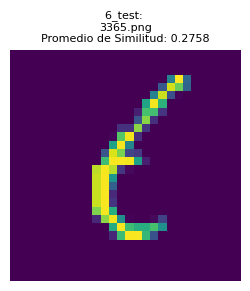

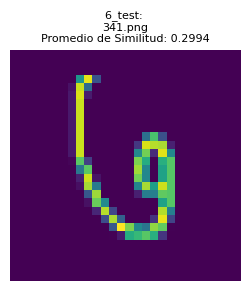

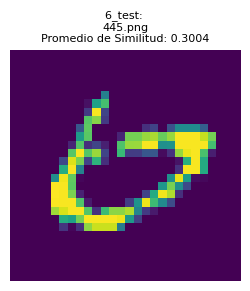

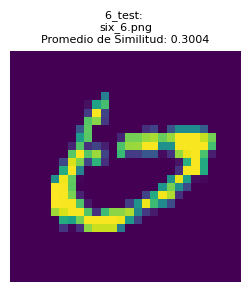

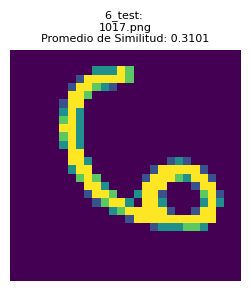

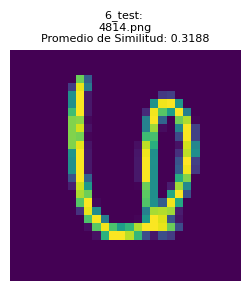

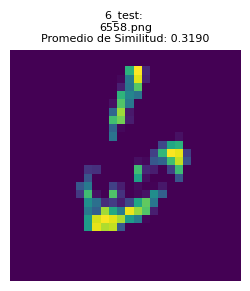

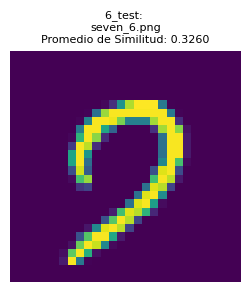

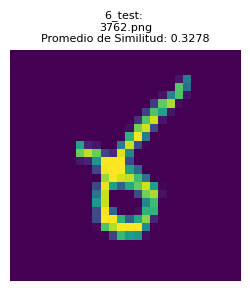

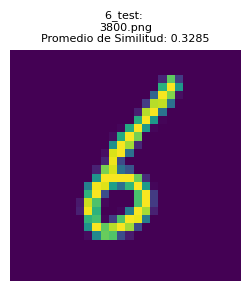

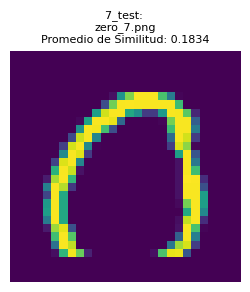

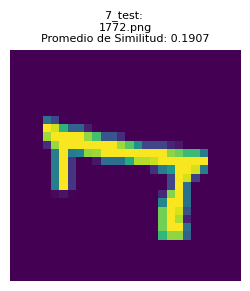

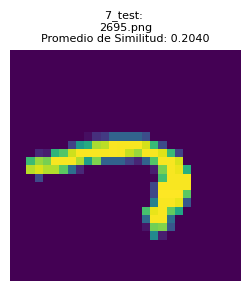

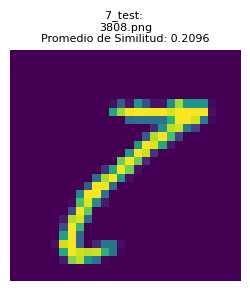

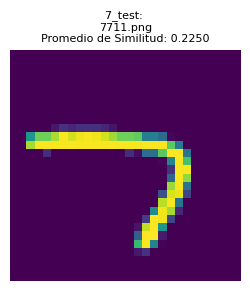

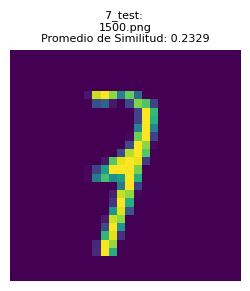

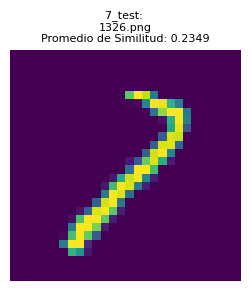

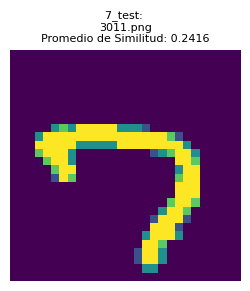

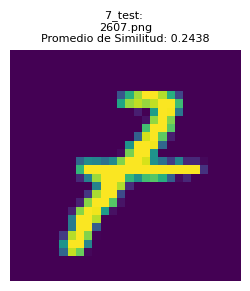

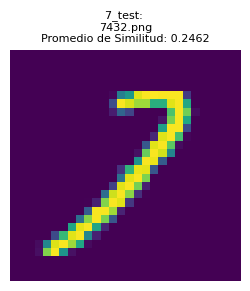

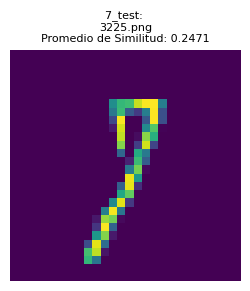

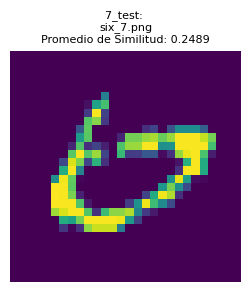

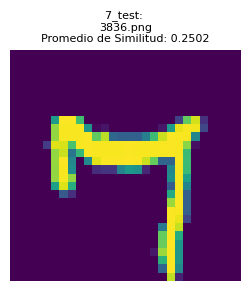

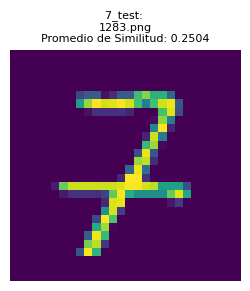

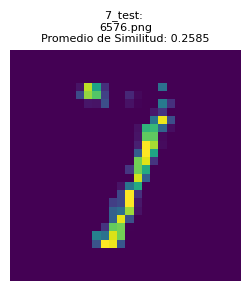

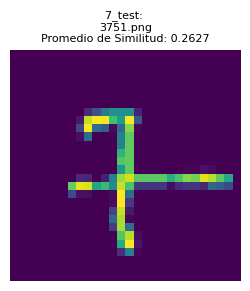

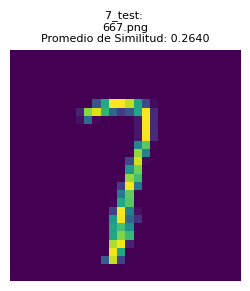

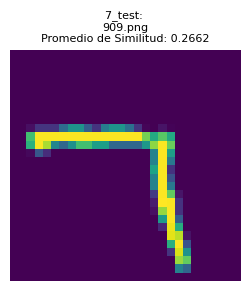

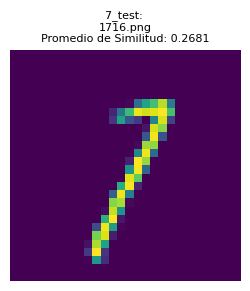

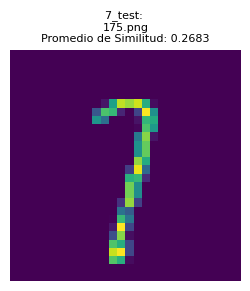

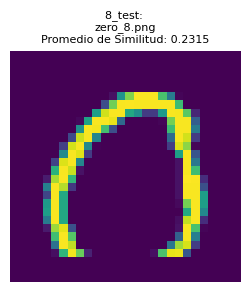

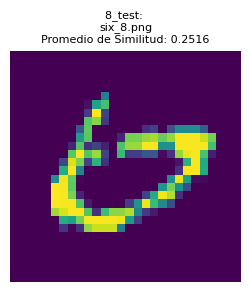

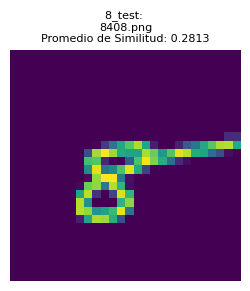

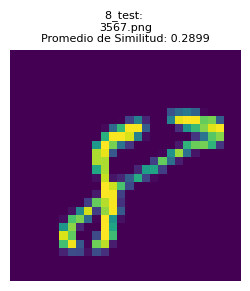

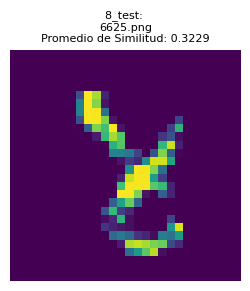

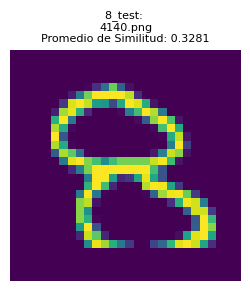

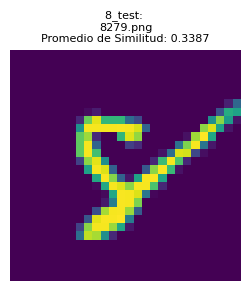

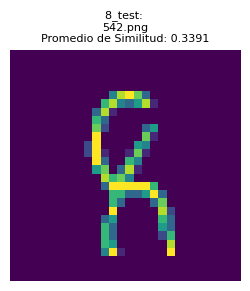

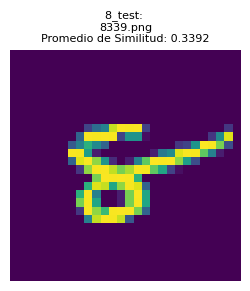

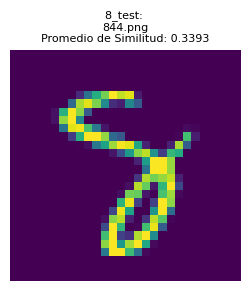

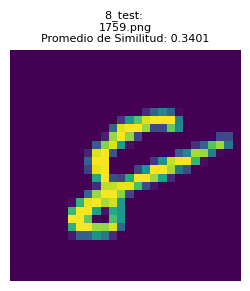

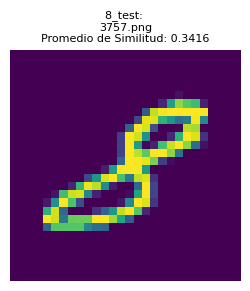

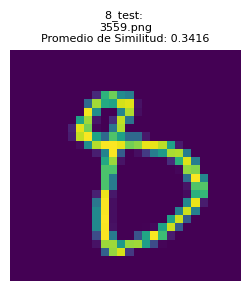

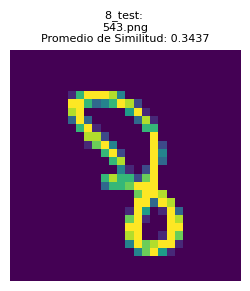

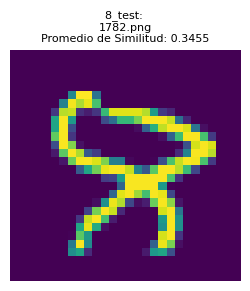

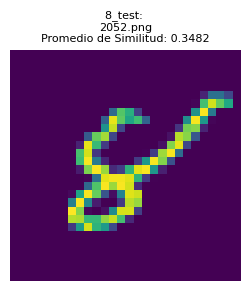

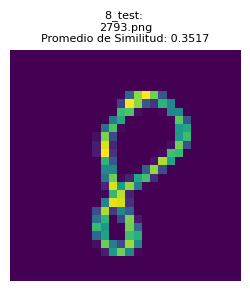

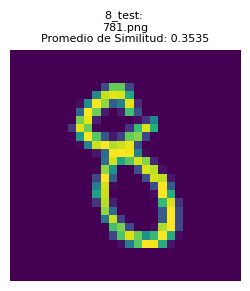

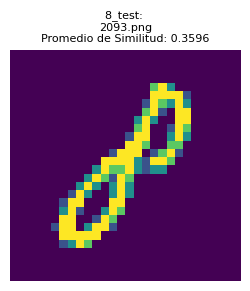

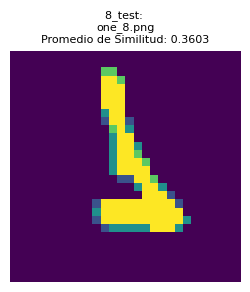

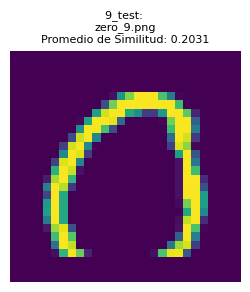

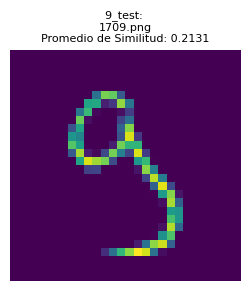

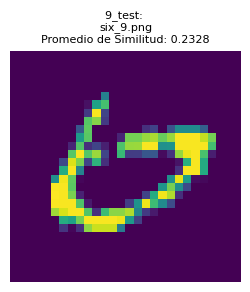

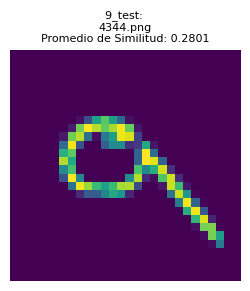

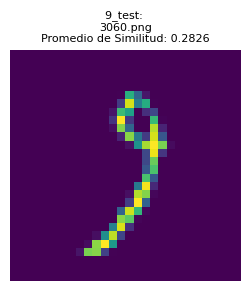

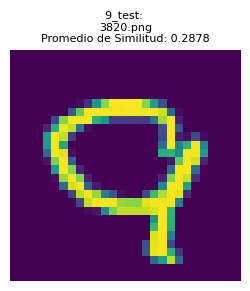

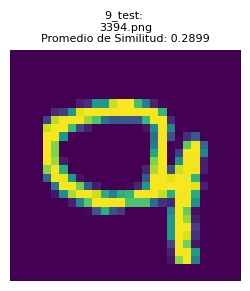

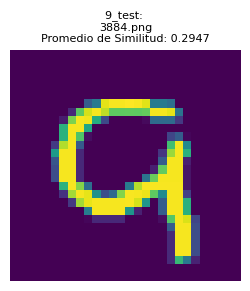

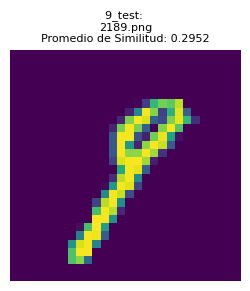

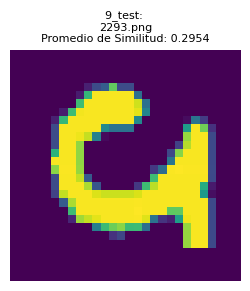

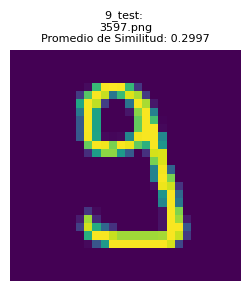

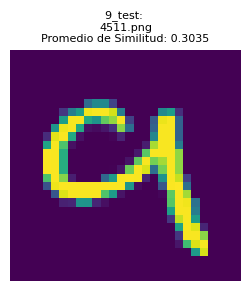

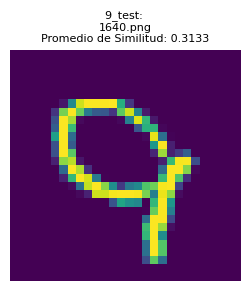

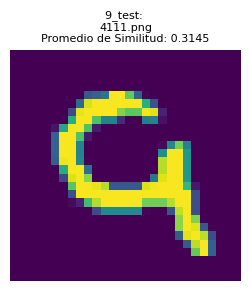

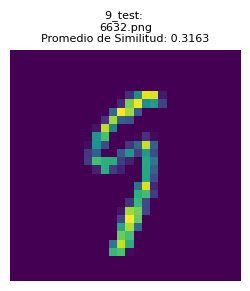

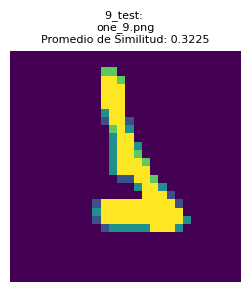

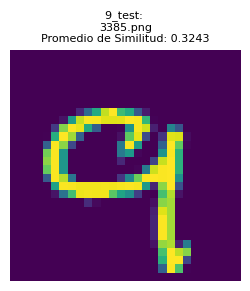

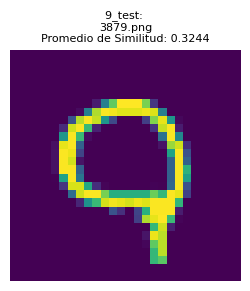

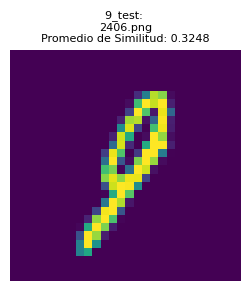

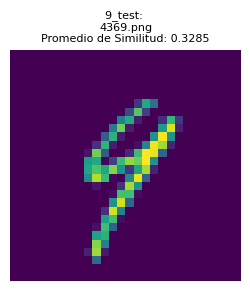

In [98]:

# Función para encontrar y mostrar las imágenes menos similares dentro de cada clase usando la matriz C  
def show_least_similar_avg_using_C_all_classes(estimator, class_names, filenames_dict, num_samples_to_show=2):  
    images_to_show = []  # Lista para almacenar las imágenes y sus detalles  

    # Recorre las clases y genera la lista de descripciones  
    for class_intent in range(len(class_names)):  
        class_name = class_names[class_intent]  
        print(f"\nClase: {class_name}")  

        # Obtener la matriz de similitud de las muestras dentro de la clase  
        C = estimator.C[class_intent]  

        # Imprimir la forma de la matriz de similitud de la clase  
        print(f"Forma de la matriz de la clase {class_name}: {C.shape}")  

        # Calcular el promedio de similitud para cada muestra  
        avg_similarity_per_sample = np.mean(C, axis=1)  

        # Ordenar las muestras por su promedio de similitud (de menor a mayor)  
        sorted_indices = np.argsort(avg_similarity_per_sample)  

        # Mostrar las imágenes de las muestras con menor promedio de similitud  
        for idx in sorted_indices[:num_samples_to_show]:  
            avg_sim = avg_similarity_per_sample[idx]  

            # Obtener los índices de las muestras en el dataset  
            source_idx = estimator.class_indices[class_intent][idx]  

            # Verificar que los índices estén dentro de los límites del dataset  
            if source_idx < len(filenames_dict):  
                source_filename = Path(filenames_dict[source_idx])  
            
                
                # Formatear y mostrar la salida  
                print(f"\tMuestra: {source_filename.name} ({class_name}), Promedio de Similitud: {avg_sim:.4f}")  

                # Agrega los detalles a la lista para visualización  
                images_to_show.append((source_filename, class_name, avg_sim))  
        

    # Luego, realiza la visualización de las imágenes  
    for source_filename, class_name, avg_sim in images_to_show:  
        img_source = plt.imread(source_filename)  

        plt.figure(figsize=(3, 3))  
        plt.imshow(img_source)  
        plt.title(f"{class_name}: \n{source_filename.name}\nPromedio de Similitud: {avg_sim:.4f}", fontsize=8)  
        plt.axis('off')  # Elimina los ejes para centrar la atención en la imagen  
        plt.show()  

print("Muestras con menor valor de promedio de similitud:\n") 
num_samples_to_show = 20  # Número de muestras para visualizar por clase  
show_least_similar_avg_using_C_all_classes(estimator, class_names_test, filenames_dict, num_samples_to_show)

# Imagenes menos similares a la muestra especifica

In [99]:

# Función para encontrar y mostrar los detalles de similitud de una imagen específica  
def show_image_similarity_details(estimator, class_names, filenames_dict, target_image_name, num_least_similar=10):  
    # Variable para almacenar el resultado  
    result = None  

    # Recorre las clases y busca la imagen objetivo  
    for class_intent in range(len(class_names)):  
        class_name = class_names[class_intent]  

        # Obtener la matriz de similitud de las muestras dentro de la clase  
        C = estimator.C[class_intent]  

        # Calcular el promedio de similitud para cada muestra  
        avg_similarity_per_sample = np.mean(C, axis=1)  

        # Buscar el índice de la imagen objetivo en la clase actual  
        for idx, source_idx in enumerate(estimator.class_indices[class_intent]):  
            source_filename = Path(filenames_dict[source_idx]).name  
            if source_filename == target_image_name:  
                # Encontrar el promedio de similitud y la posición  
                avg_sim = avg_similarity_per_sample[idx]  
                sorted_indices = np.argsort(avg_similarity_per_sample)  
                position = np.where(sorted_indices == idx)[0][0] + 1  # +1 para posición 1-indexada  

                # Guardar el resultado  
                result = (class_name, avg_sim, position, len(avg_similarity_per_sample), source_filename, idx)  
                break  

        if result:  
            break  

    if result:  
        class_name, avg_sim, position, total_samples, source_filename, target_idx = result  
        print(f"\nImagen: {target_image_name} (Clase: {class_name})")  
        print(f"Promedio de Similitud: {avg_sim:.4f}")  
        print(f"Posición: {position} de {total_samples}")  

        # Mostrar la imagen objetivo  
        img_source = plt.imread(Path(filenames_dict[source_idx]))  
        plt.figure(figsize=(3, 3))  
        plt.imshow(img_source)  
        plt.title(f"{class_name}: {source_filename}\nPromedio de Similitud: {avg_sim:.4f}\nPosición: {position}/{total_samples}", fontsize=8)  
        plt.axis('off')  
        plt.show()  

        # Mostrar las imágenes menos similares a la imagen objetivo  
        print(f"\nLas {num_least_similar} imágenes menos similares a {target_image_name}\n:")  

        # Obtener las similitudes de la imagen objetivo con todas las demás  
        similarities = C[target_idx]  

        # Ordenar las similitudes de menor a mayor  
        least_similar_indices = np.argsort(similarities)[:num_least_similar]  

        for i, idx in enumerate(least_similar_indices):  
            least_sim = similarities[idx]  
            least_sim_idx = estimator.class_indices[class_intent][idx]  
            least_sim_filename = Path(filenames_dict[least_sim_idx]).name  

            print(f"\t{i+1}. Imagen: {least_sim_filename} (Clase: {class_name}), Similitud: {least_sim:.4f}")

            # Mostrar la imagen menos similar  
            img_least_sim = plt.imread(Path(filenames_dict[least_sim_idx]))  
            plt.figure(figsize=(3, 3))  
            plt.imshow(img_least_sim)  
            plt.title(f"{class_name}: {least_sim_filename}\nSimilitud: {least_sim:.4f}", fontsize=8)  
            plt.axis('off')  
            plt.show()  
  

    else:  
        print(f"\nImagen {target_image_name} no encontrada en las clases proporcionadas.")  

# Ejemplo de uso  
target_image_name = "one.png"  # Cambia esto al nombre de la imagen que deseas buscar  
num_least_similar = 1  # Número de imágenes menos similares a mostrar  
show_image_similarity_details(estimator, class_names_test, filenames_dict, target_image_name, num_least_similar)


Imagen one.png no encontrada en las clases proporcionadas.


# Imagenes mas similares a la muestra especifica


Imagen: eight_8.png (Clase: 8_test)
Promedio de Similitud: 0.5623
Posición: 853 de 984


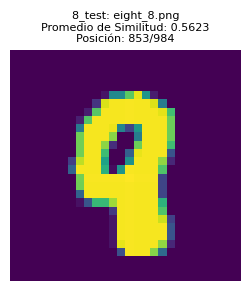


Las 10 imágenes más similares a eight_8.png
:
	1. Imagen: eight_8.png (Clase: 8_test), Similitud: 1.0000


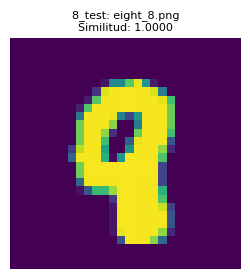

	2. Imagen: 2050.png (Clase: 8_test), Similitud: 0.8275


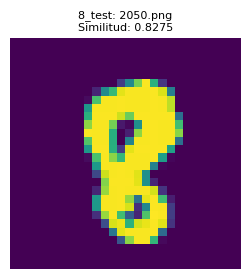

	3. Imagen: 8756.png (Clase: 8_test), Similitud: 0.7934


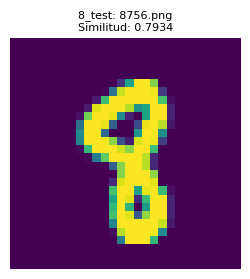

	4. Imagen: 9068.png (Clase: 8_test), Similitud: 0.7905


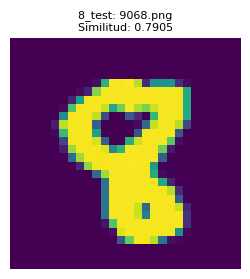

	5. Imagen: 2960.png (Clase: 8_test), Similitud: 0.7864


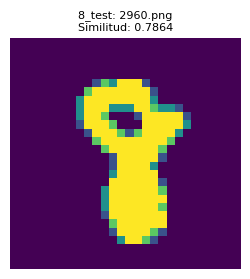

	6. Imagen: 9136.png (Clase: 8_test), Similitud: 0.7738


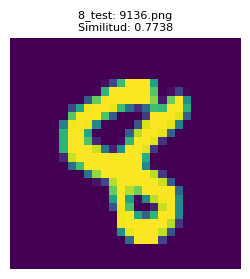

	7. Imagen: 7788.png (Clase: 8_test), Similitud: 0.7726


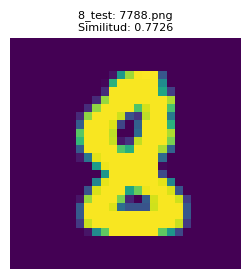

	8. Imagen: 6395.png (Clase: 8_test), Similitud: 0.7679


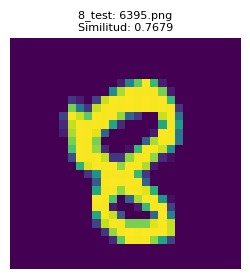

	9. Imagen: 1149.png (Clase: 8_test), Similitud: 0.7624


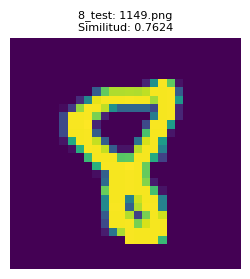

	10. Imagen: 5648.png (Clase: 8_test), Similitud: 0.7607


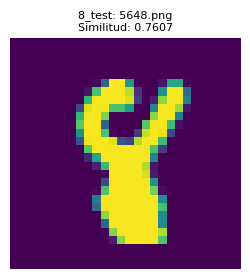

In [108]:
# Función para encontrar y mostrar los detalles de similitud de una imagen específica  
def show_image_similarity_details(estimator, class_names, filenames_dict, target_image_name, num_most_similar=10):  
    # Variable para almacenar el resultado  
    result = None  

    # Recorre las clases y busca la imagen objetivo  
    for class_intent in range(len(class_names)):  
        class_name = class_names[class_intent]  

        # Obtener la matriz de similitud de las muestras dentro de la clase  
        C = estimator.C[class_intent]  

        # Calcular el promedio de similitud para cada muestra  
        avg_similarity_per_sample = np.mean(C, axis=1)  

        # Buscar el índice de la imagen objetivo en la clase actual  
        for idx, source_idx in enumerate(estimator.class_indices[class_intent]):  
            source_filename = Path(filenames_dict[source_idx]).name  
            if source_filename == target_image_name:  
                # Encontrar el promedio de similitud y la posición  
                avg_sim = avg_similarity_per_sample[idx]  
                sorted_indices = np.argsort(avg_similarity_per_sample)  
                position = np.where(sorted_indices == idx)[0][0] + 1  # +1 para posición 1-indexada  

                # Guardar el resultado  
                result = (class_name, avg_sim, position, len(avg_similarity_per_sample), source_filename, idx)  
                break  

        if result:  
            break  

    if result:  
        class_name, avg_sim, position, total_samples, source_filename, target_idx = result  
        print(f"\nImagen: {target_image_name} (Clase: {class_name})")  
        print(f"Promedio de Similitud: {avg_sim:.4f}")  
        print(f"Posición: {position} de {total_samples}")  

        # Mostrar la imagen objetivo  
        img_source = plt.imread(Path(filenames_dict[source_idx]))  
        plt.figure(figsize=(3, 3))  
        plt.imshow(img_source)  
        plt.title(f"{class_name}: {source_filename}\nPromedio de Similitud: {avg_sim:.4f}\nPosición: {position}/{total_samples}", fontsize=8)  
        plt.axis('off')  
        plt.show()  

        # Mostrar las imágenes más similares a la imagen objetivo  
        print(f"\nLas {num_most_similar} imágenes más similares a {target_image_name}\n:")  

        # Obtener las similitudes de la imagen objetivo con todas las demás  
        similarities = C[target_idx]  

        # Ordenar las similitudes de mayor a menor  
        most_similar_indices = np.argsort(similarities)[-num_most_similar-1:-1][::-1]  # Excluding self and reversing order  

        for i, idx in enumerate(most_similar_indices):  
            most_sim = similarities[idx]  
            most_sim_idx = estimator.class_indices[class_intent][idx]  
            most_sim_filename = Path(filenames_dict[most_sim_idx]).name  

            print(f"\t{i+1}. Imagen: {most_sim_filename} (Clase: {class_name}), Similitud: {most_sim:.4f}")
            
            # Mostrar la imagen más similar  
            img_most_sim = plt.imread(Path(filenames_dict[most_sim_idx]))  
            plt.figure(figsize=(3, 3))  
            plt.imshow(img_most_sim)  
            plt.title(f"{class_name}: {most_sim_filename}\nSimilitud: {most_sim:.4f}", fontsize=8)  
            plt.axis('off')  
            plt.show()  
  

    else:  
        print(f"\nImagen {target_image_name} no encontrada en las clases proporcionadas.")  

# Ejemplo de uso  
target_image_name = "eight_8.png"  # Cambia esto al nombre de la imagen que deseas buscar  
num_most_similar = 10  # Número de imágenes más similares a mostrar  
show_image_similarity_details(estimator, class_names_test, filenames_dict, target_image_name, num_most_similar)

# Skewness

Muestras con mayor valor de skewness:


Clase: 0_test
Forma de la matriz de la clase 0_test: (990, 990)
	Muestra: 6651.png (0_test), Skewness: 2.2628
	Muestra: 2185.png (0_test), Skewness: 1.6311
	Muestra: 9634.png (0_test), Skewness: 1.3851
	Muestra: 4065.png (0_test), Skewness: 1.3315
	Muestra: 443.png (0_test), Skewness: 1.2834
	Muestra: one_0.png (0_test), Skewness: 1.2514
	Muestra: 9879.png (0_test), Skewness: 1.0973
	Muestra: 1191.png (0_test), Skewness: 1.0552
	Muestra: 2378.png (0_test), Skewness: 0.9249
	Muestra: 4834.png (0_test), Skewness: 0.9139
	Muestra: 804.png (0_test), Skewness: 0.8587
	Muestra: 3818.png (0_test), Skewness: 0.8300
	Muestra: 2568.png (0_test), Skewness: 0.8221
	Muestra: 4477.png (0_test), Skewness: 0.8097
	Muestra: 6643.png (0_test), Skewness: 0.7972
	Muestra: 9677.png (0_test), Skewness: 0.7686
	Muestra: 305.png (0_test), Skewness: 0.7671
	Muestra: 717.png (0_test), Skewness: 0.7601
	Muestra: 8278.png (0_test), Skewness: 0.7597
	Muestra: 9016.png (0_tes

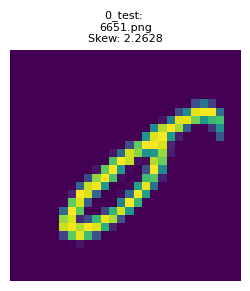

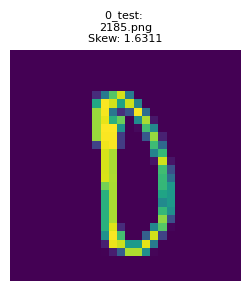

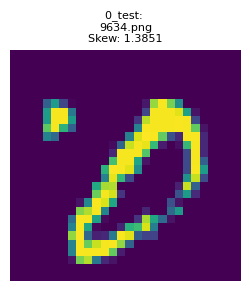

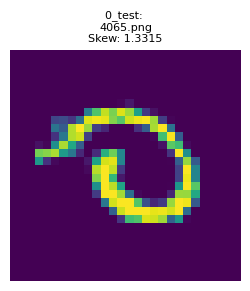

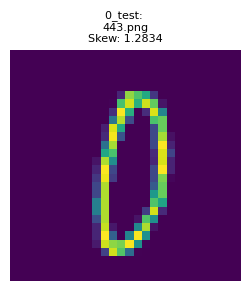

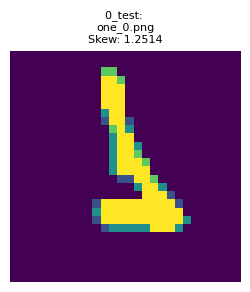

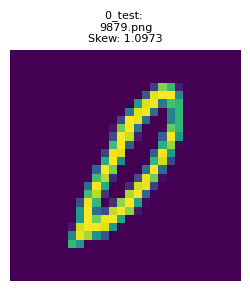

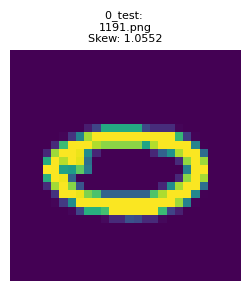

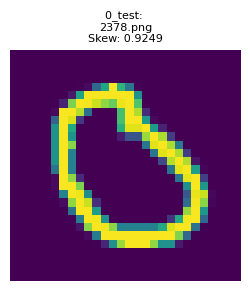

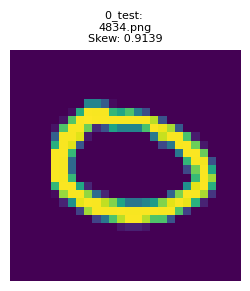

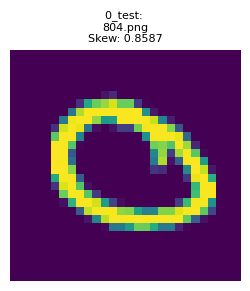

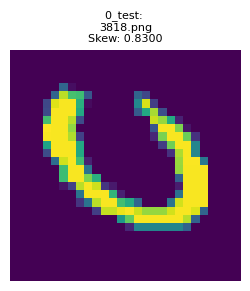

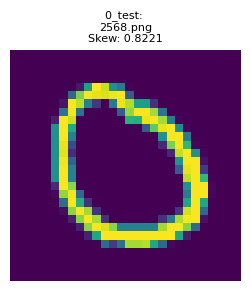

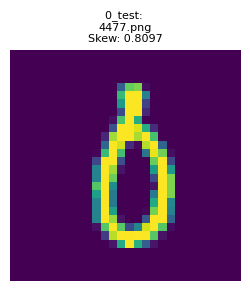

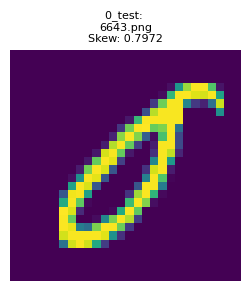

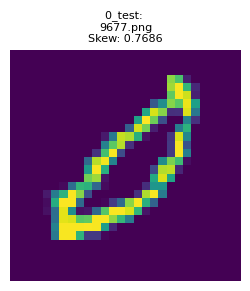

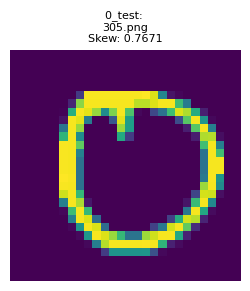

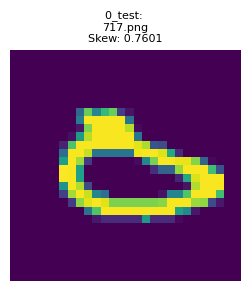

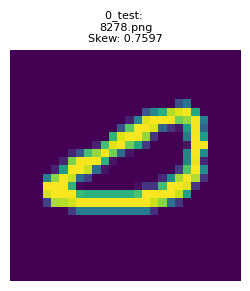

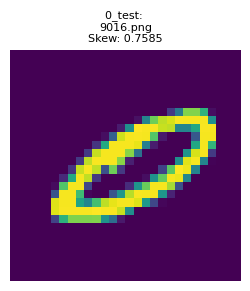

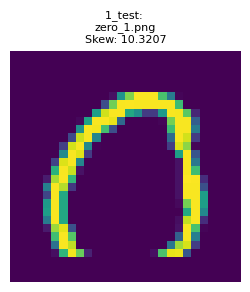

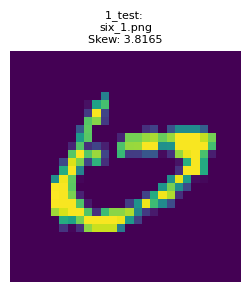

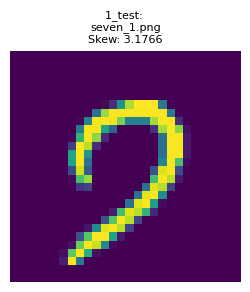

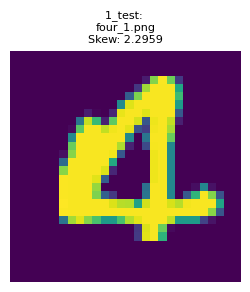

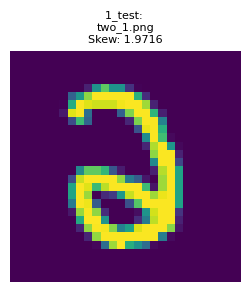

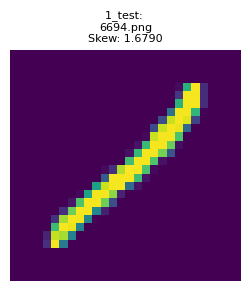

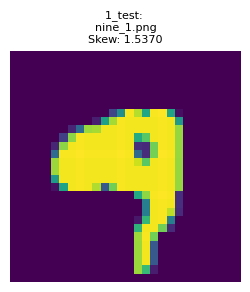

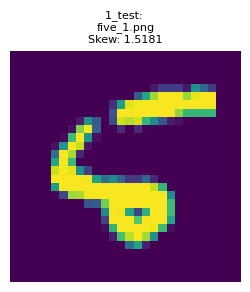

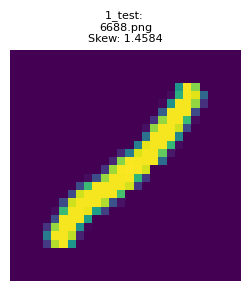

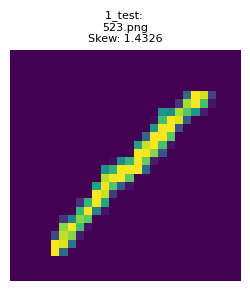

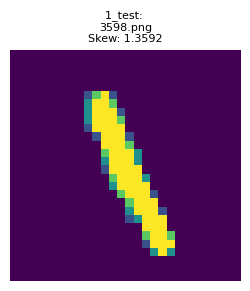

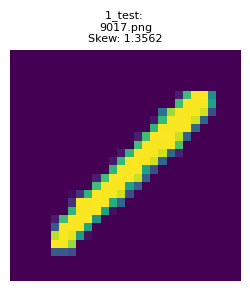

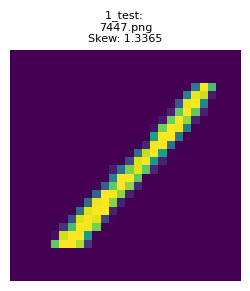

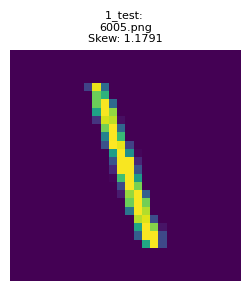

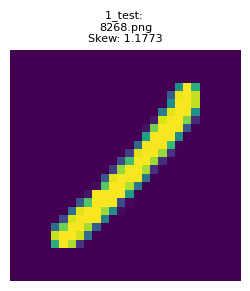

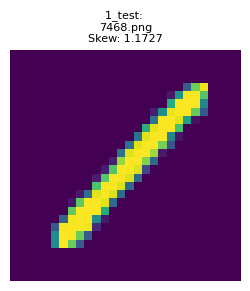

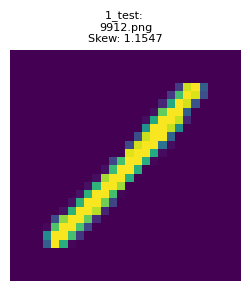

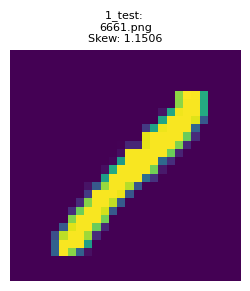

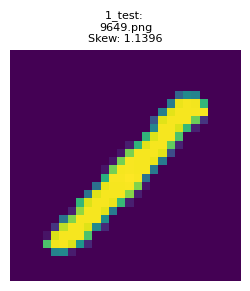

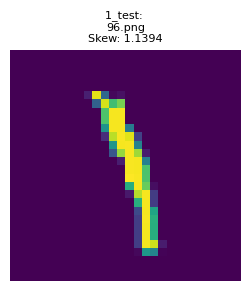

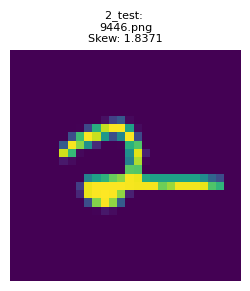

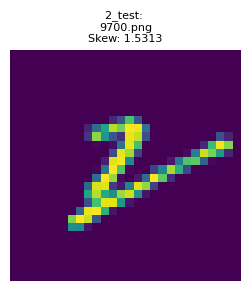

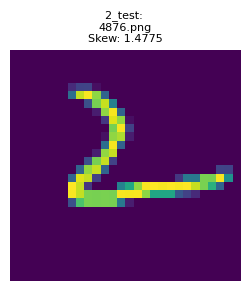

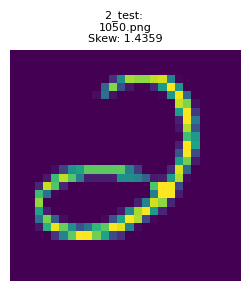

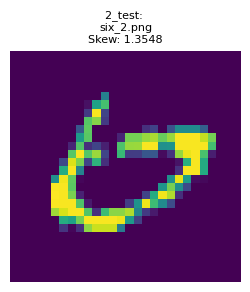

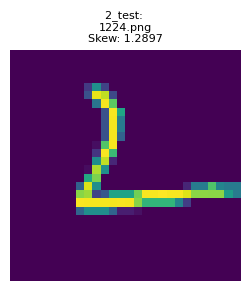

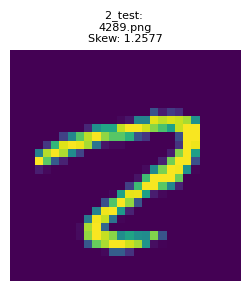

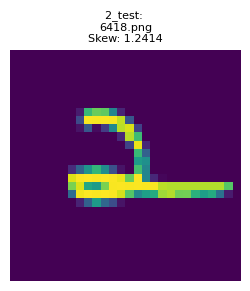

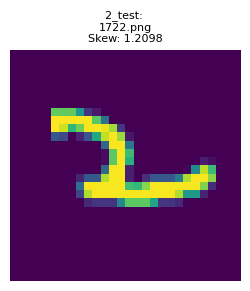

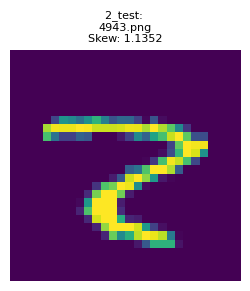

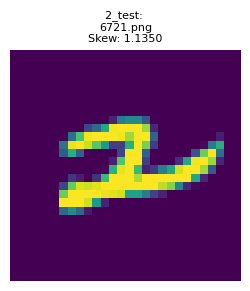

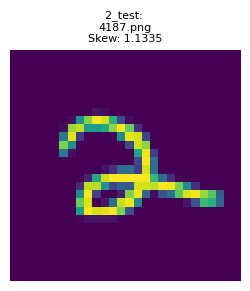

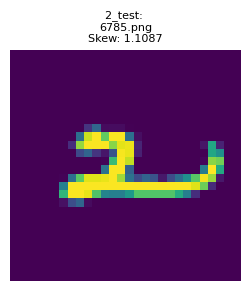

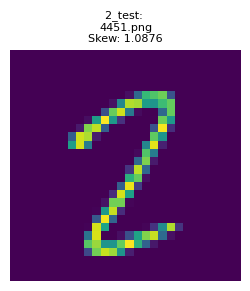

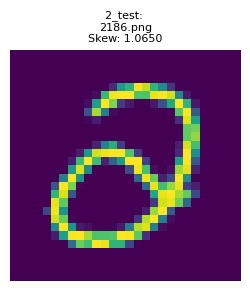

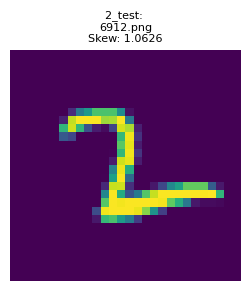

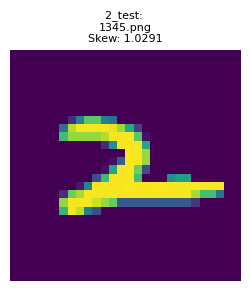

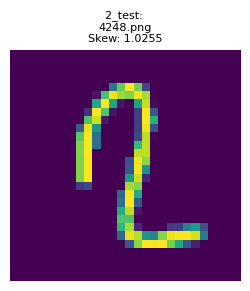

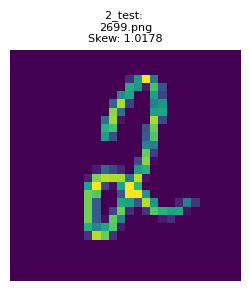

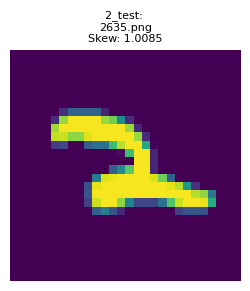

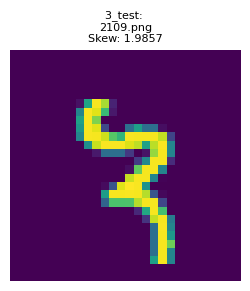

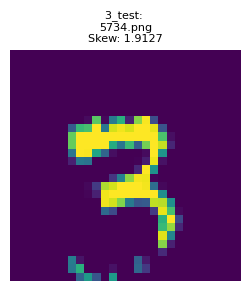

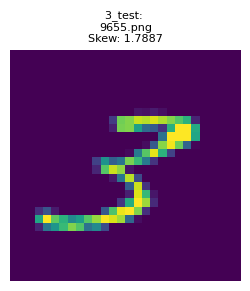

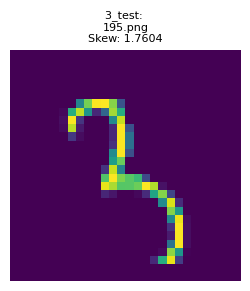

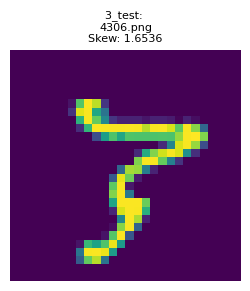

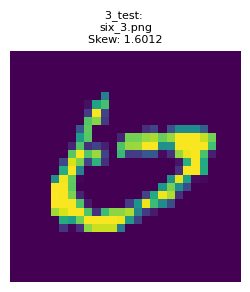

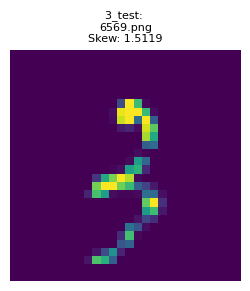

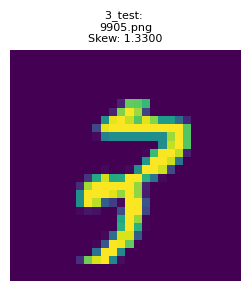

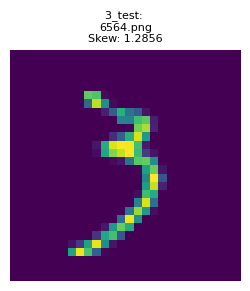

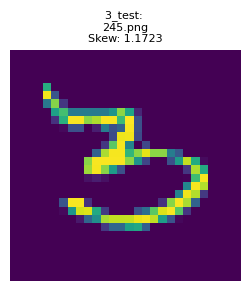

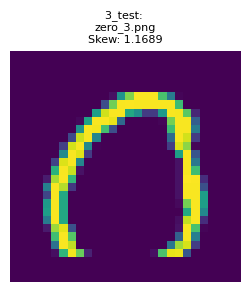

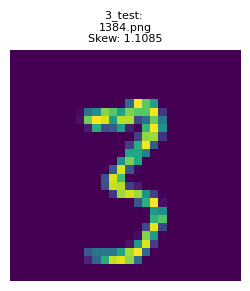

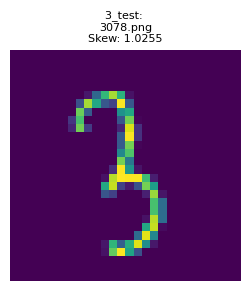

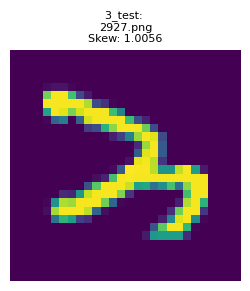

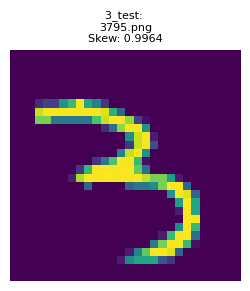

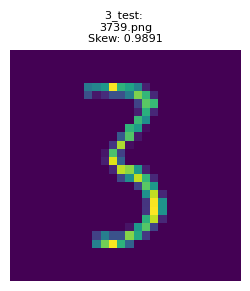

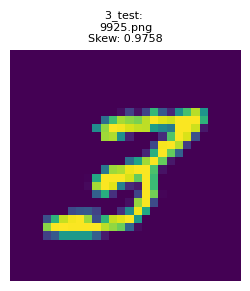

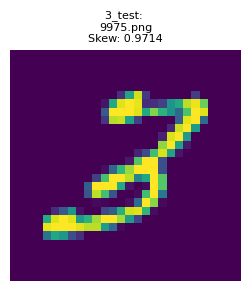

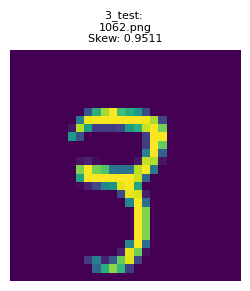

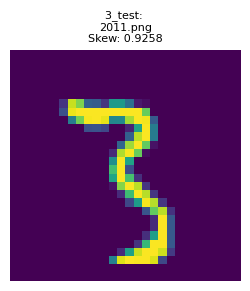

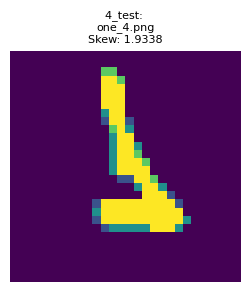

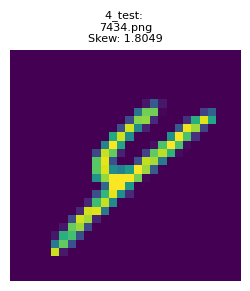

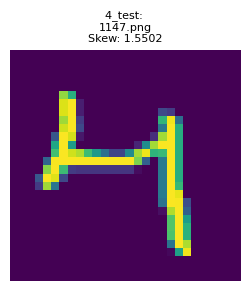

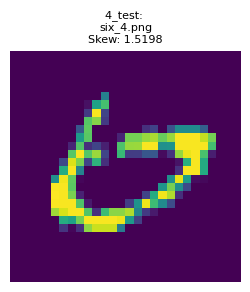

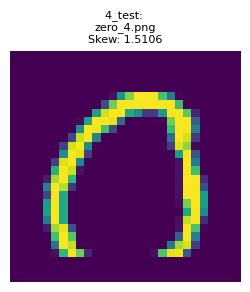

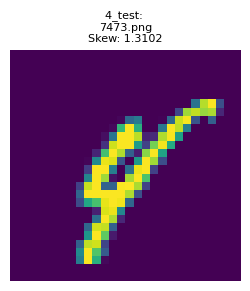

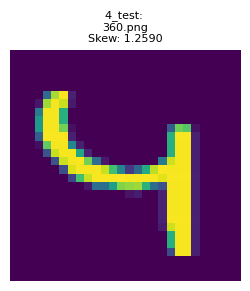

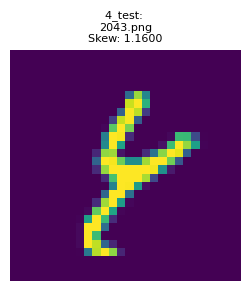

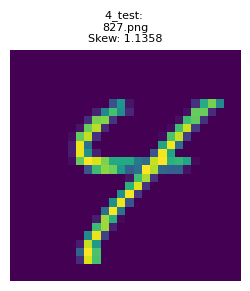

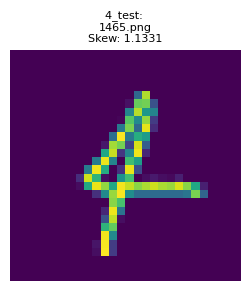

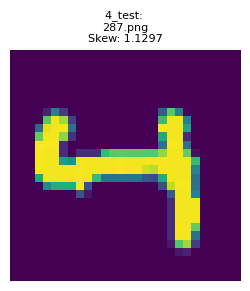

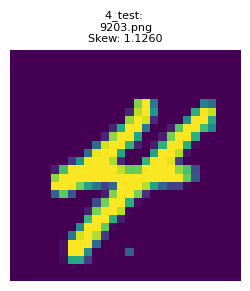

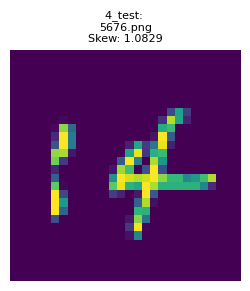

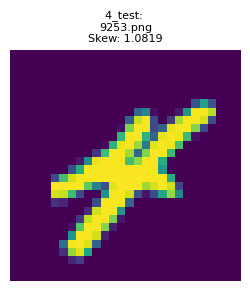

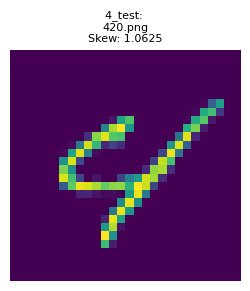

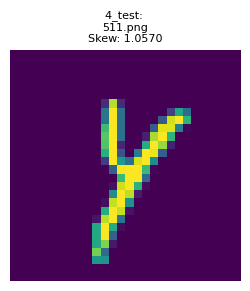

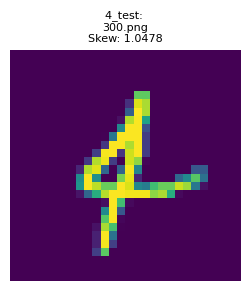

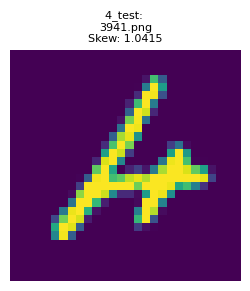

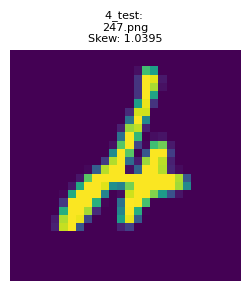

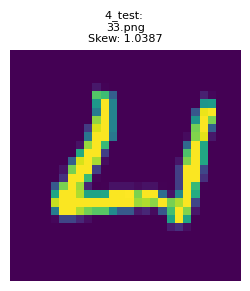

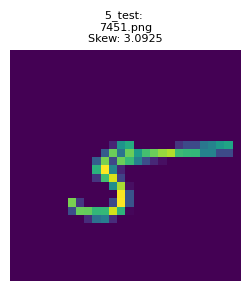

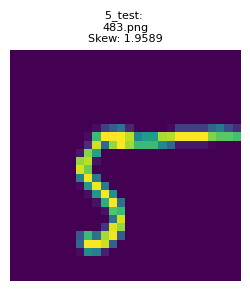

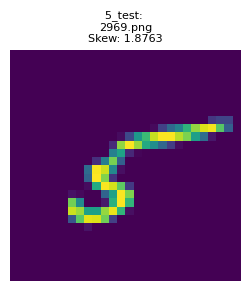

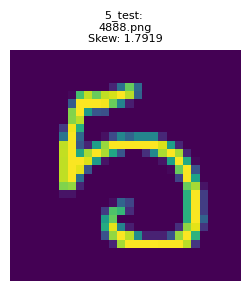

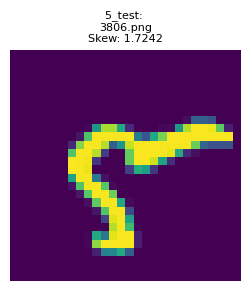

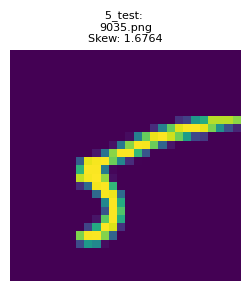

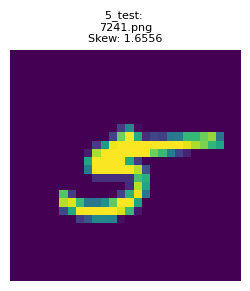

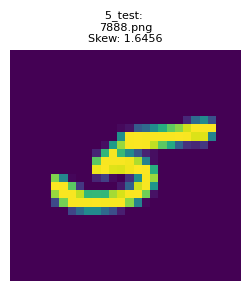

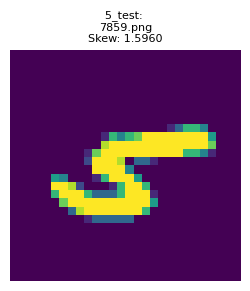

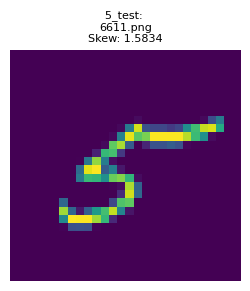

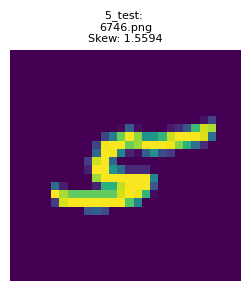

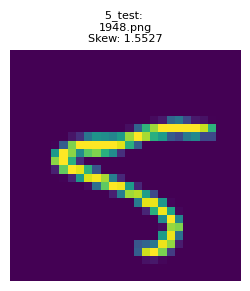

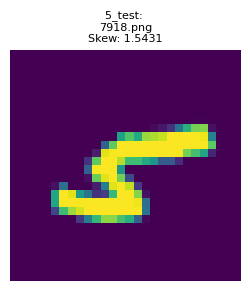

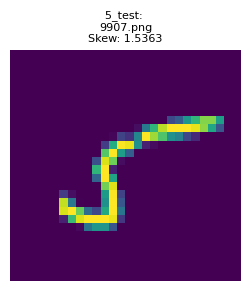

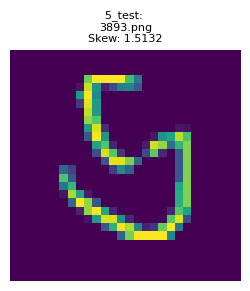

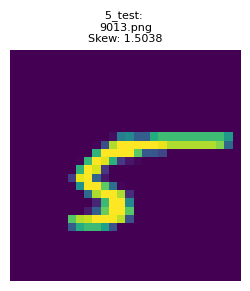

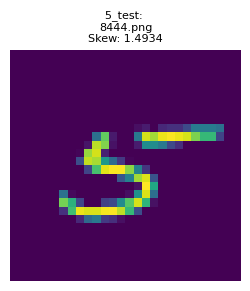

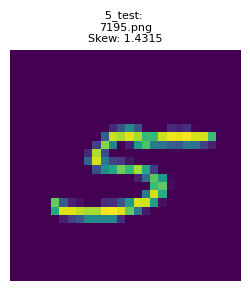

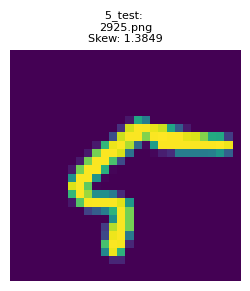

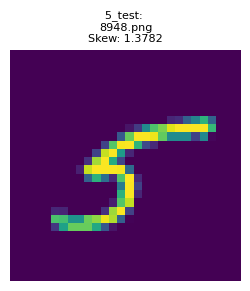

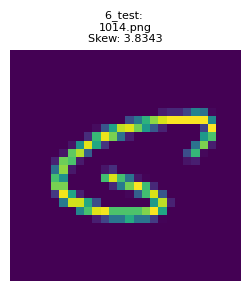

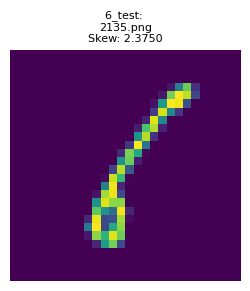

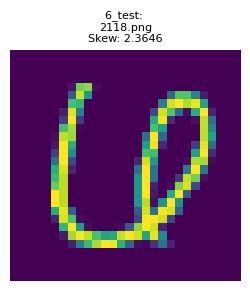

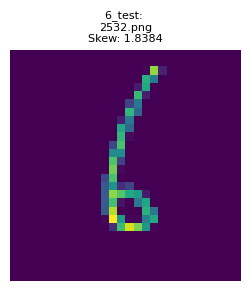

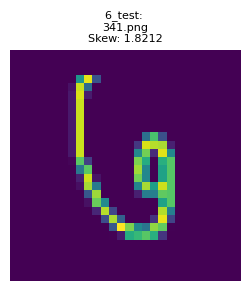

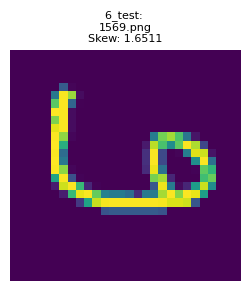

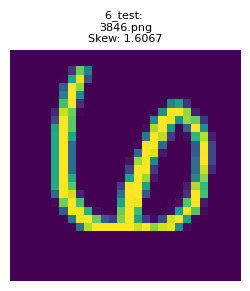

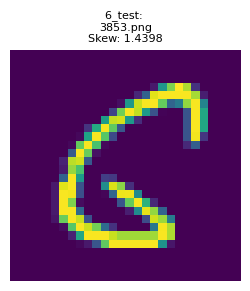

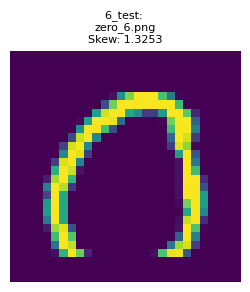

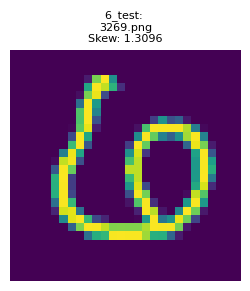

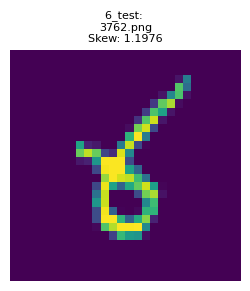

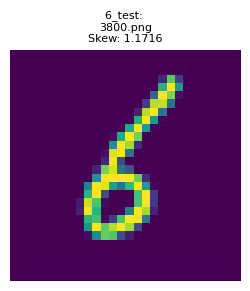

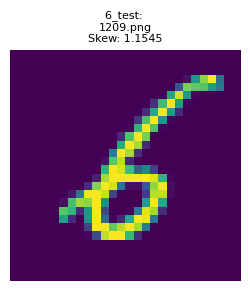

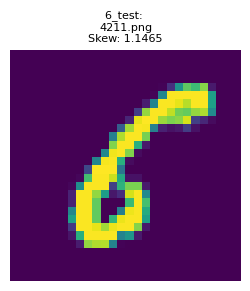

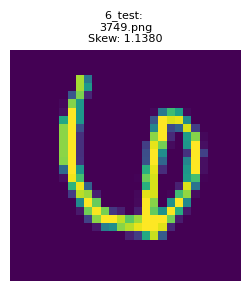

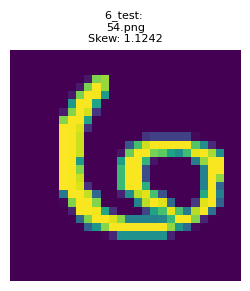

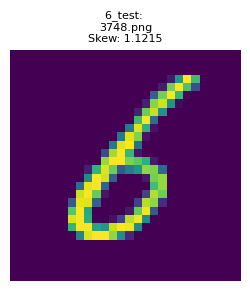

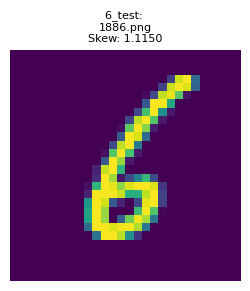

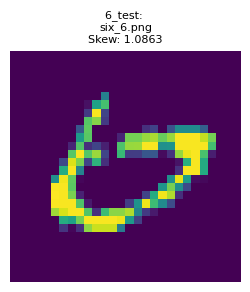

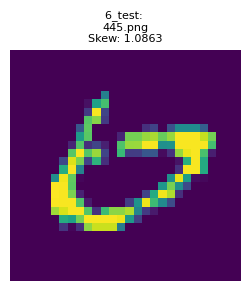

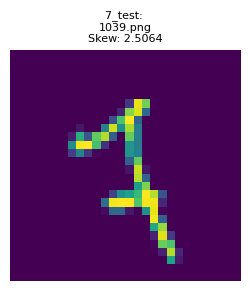

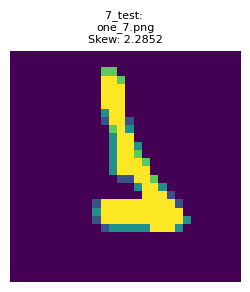

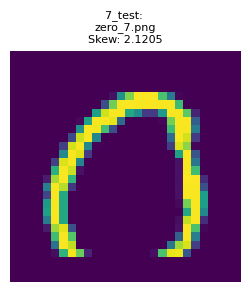

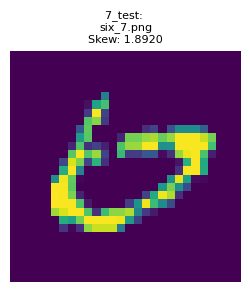

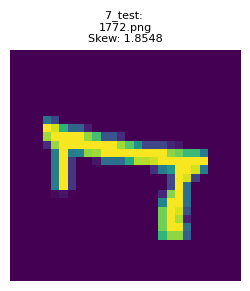

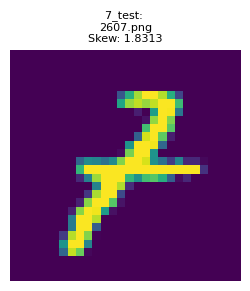

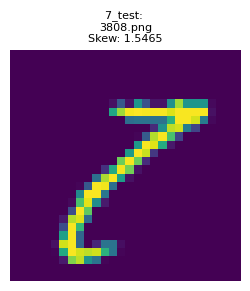

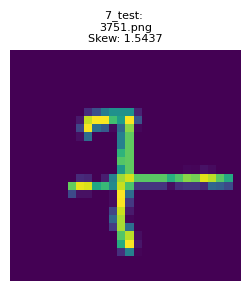

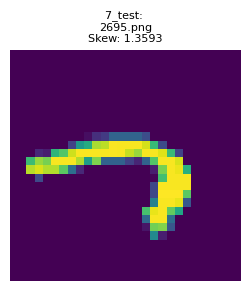

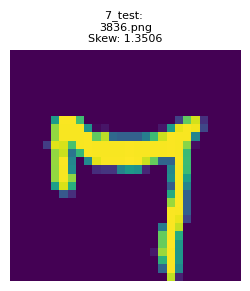

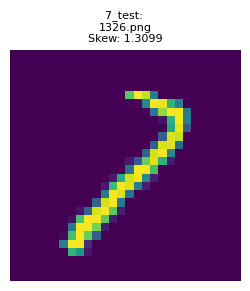

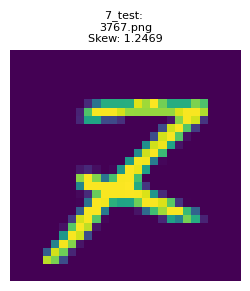

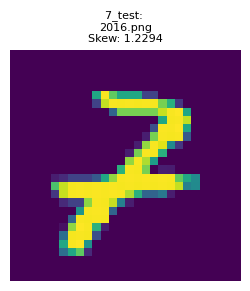

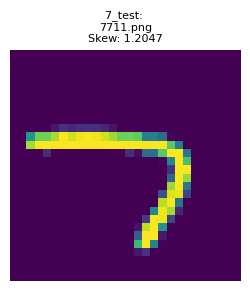

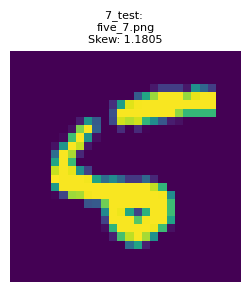

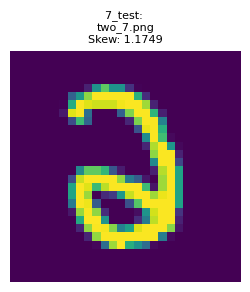

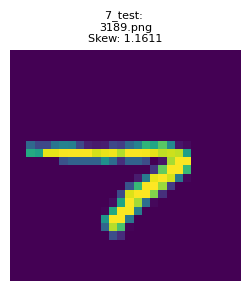

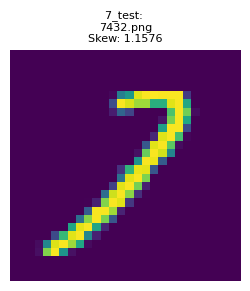

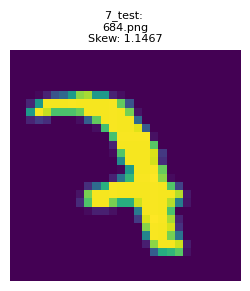

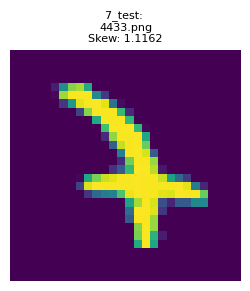

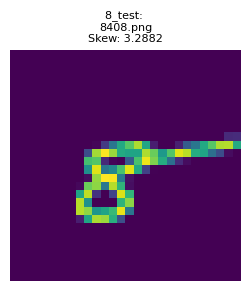

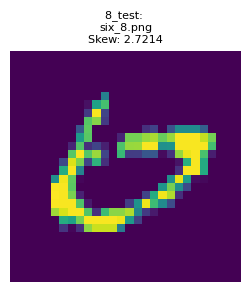

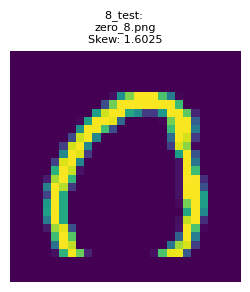

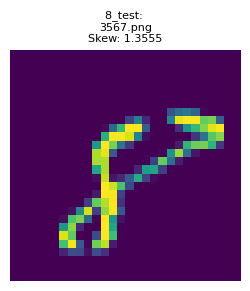

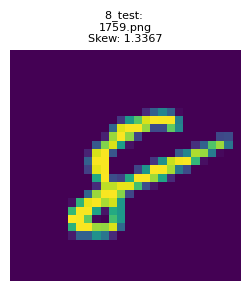

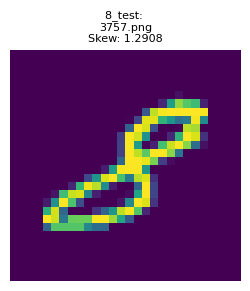

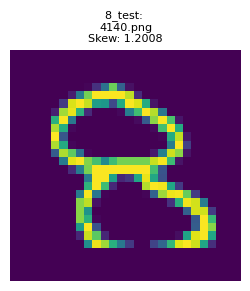

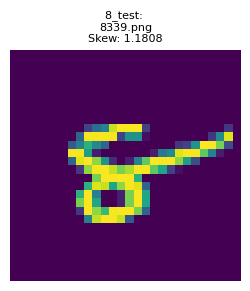

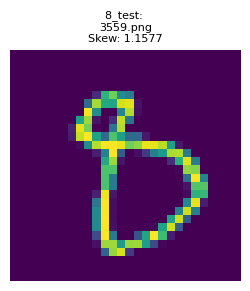

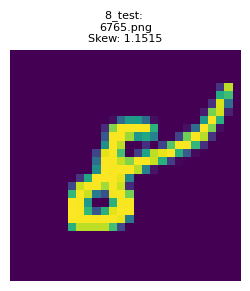

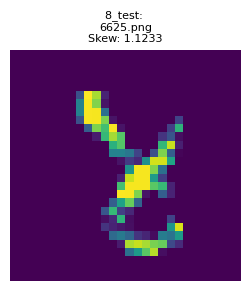

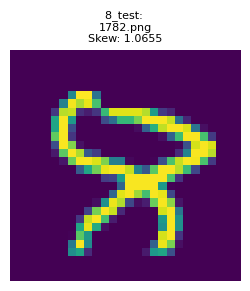

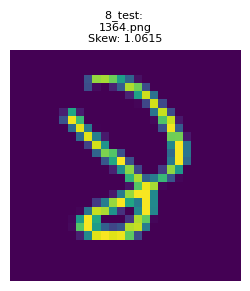

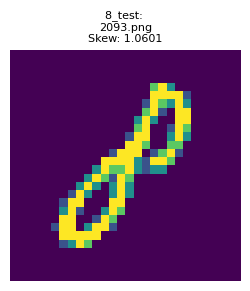

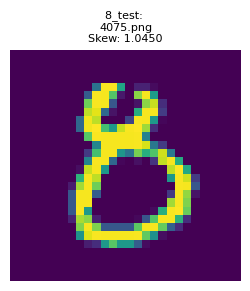

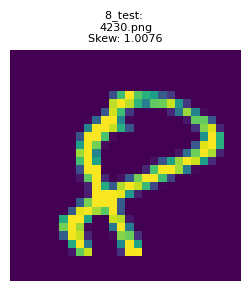

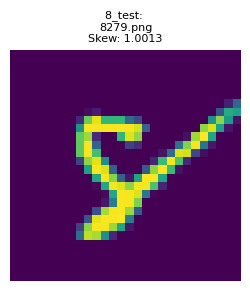

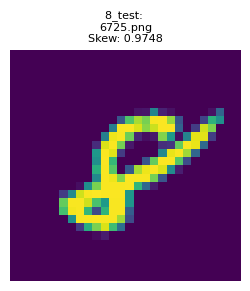

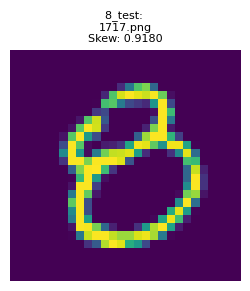

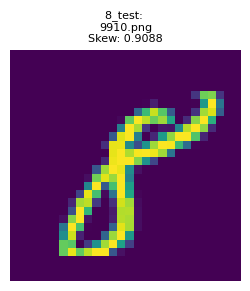

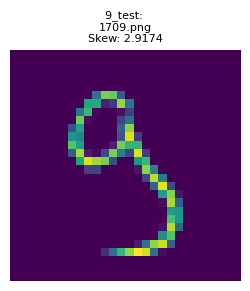

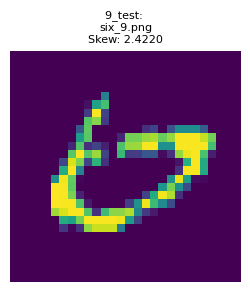

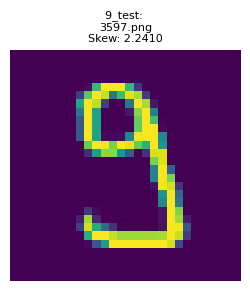

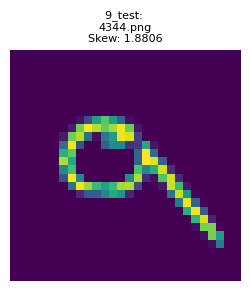

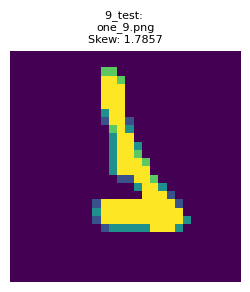

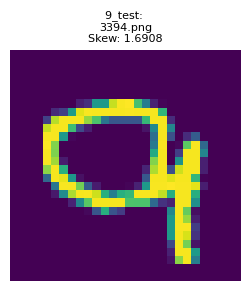

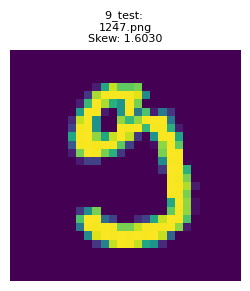

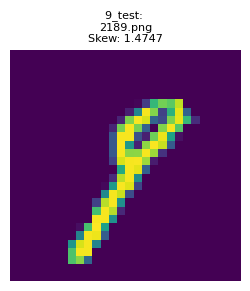

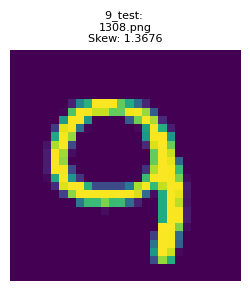

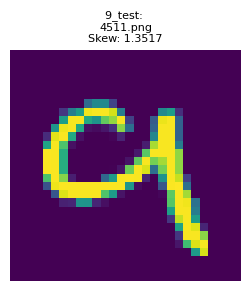

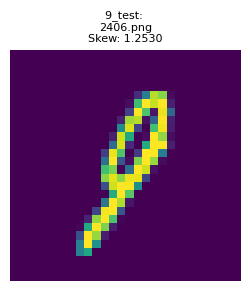

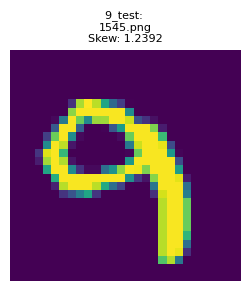

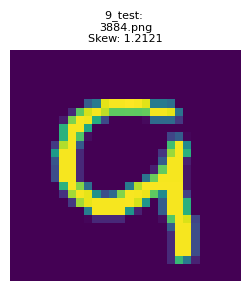

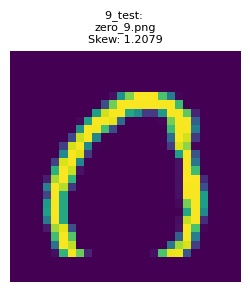

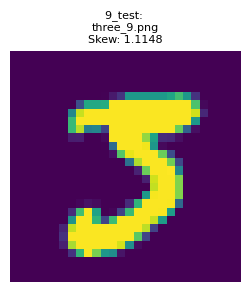

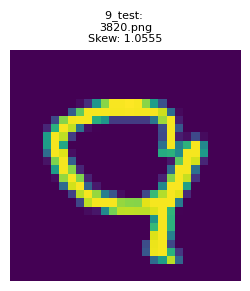

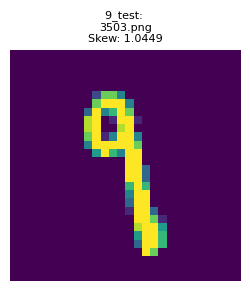

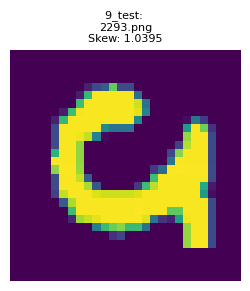

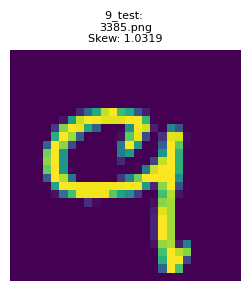

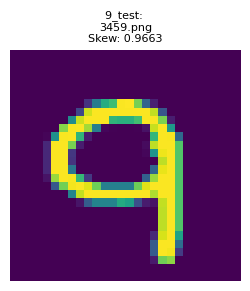

In [101]:
from scipy.stats import skew  

# Función para encontrar y mostrar las imágenes menos similares usando skewness  
def show_most_similar_skewness_using_C_all_classes(estimator, class_names, filenames_dict, num_samples_to_show=2):  
    images_to_show = []  # Lista para almacenar las imágenes y sus detalles  

    # Recorre las clases y genera la lista de descripciones  
    for class_intent in range(len(class_names)):  
        class_name = class_names[class_intent]  
        print(f"\nClase: {class_name}")  

        # Obtener la matriz de similitud de las muestras dentro de la clase  
        C = estimator.C[class_intent]  

        # Imprimir la forma de la matriz de similitud de la clase  
        print(f"Forma de la matriz de la clase {class_name}: {C.shape}")  

        # Calcular skewness  
        skewness_per_sample = skew(C, axis=1)  

        # Ordenar las muestras por su skewness (de mayor a menor)  
        sorted_indices_skew = np.argsort(skewness_per_sample)[::-1]  

        # Mostrar las imágenes de las muestras con mayor skewness  
        for idx in sorted_indices_skew[:num_samples_to_show]:  
            skewness_val = skewness_per_sample[idx]  

            # Obtener los índices de las muestras en el dataset  
            source_idx = estimator.class_indices[class_intent][idx]  

            # Verificar que los índices estén dentro de los límites del dataset  
            if source_idx < len(filenames_dict):  
                source_filename = Path(filenames_dict[source_idx])  

                # Formatear y mostrar la salida  
                print(f"\tMuestra: {source_filename.name} ({class_name}), Skewness: {skewness_val:.4f}")  

                # Agrega los detalles a la lista para visualización  
                images_to_show.append((source_filename, class_name, skewness_val))  
    
    # Luego, realiza la visualización de las imágenes  
    for source_filename, class_name, skewness_val in images_to_show:  
        img_source = plt.imread(source_filename)  

        plt.figure(figsize=(3, 3))  
        plt.imshow(img_source)  
        plt.title(  
            f"{class_name}: \n{source_filename.name}\nSkew: {skewness_val:.4f}",  
            fontsize=8)  
        plt.axis('off')  # Elimina los ejes para centrar la atención en la imagen  
        plt.show()  

print("Muestras con mayor valor de skewness:\n")   
num_samples_to_show = 20  # Número de muestras para visualizar por clase  
show_most_similar_skewness_using_C_all_classes(estimator, class_names_test, filenames_dict, num_samples_to_show)

# Kurtosis

Muestras con mayor valor de kurtosis:


Clase: 0_test
Forma de la matriz de la clase 0_test: (990, 990)
	Muestra: 6651.png (0_test), Kurtosis: 16.9472
	Muestra: 9634.png (0_test), Kurtosis: 13.6531
	Muestra: one_0.png (0_test), Kurtosis: 13.6299
	Muestra: 4065.png (0_test), Kurtosis: 10.7814
	Muestra: 2185.png (0_test), Kurtosis: 7.8772
	Muestra: five_0.png (0_test), Kurtosis: 6.7880
	Muestra: 443.png (0_test), Kurtosis: 4.3853
	Muestra: 3710.png (0_test), Kurtosis: 4.2944
	Muestra: 717.png (0_test), Kurtosis: 3.4776
	Muestra: 9879.png (0_test), Kurtosis: 3.3419
	Muestra: 3818.png (0_test), Kurtosis: 3.3019
	Muestra: 6597.png (0_test), Kurtosis: 3.2062
	Muestra: 1191.png (0_test), Kurtosis: 2.8259
	Muestra: 4477.png (0_test), Kurtosis: 2.2711
	Muestra: 3640.png (0_test), Kurtosis: 2.2189
	Muestra: 2378.png (0_test), Kurtosis: 2.0634
	Muestra: seven_0.png (0_test), Kurtosis: 1.9825
	Muestra: 1468.png (0_test), Kurtosis: 1.9550
	Muestra: 2479.png (0_test), Kurtosis: 1.9473
	Muestra: 1775

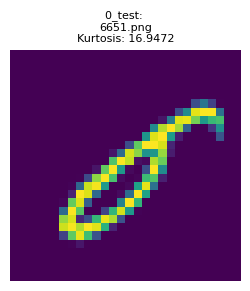

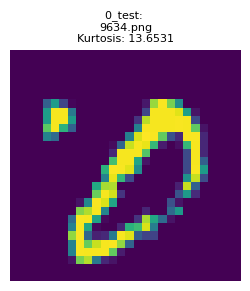

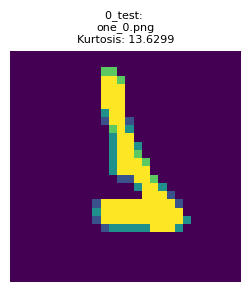

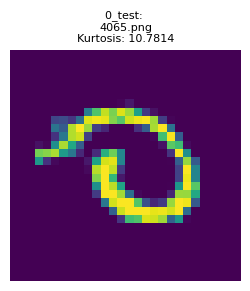

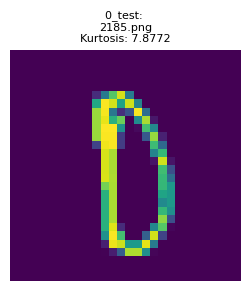

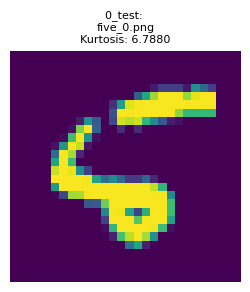

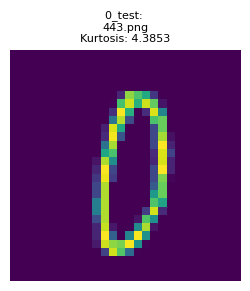

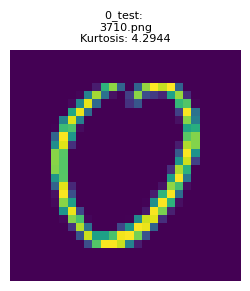

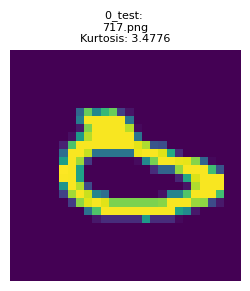

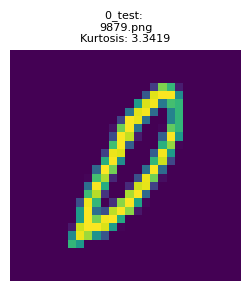

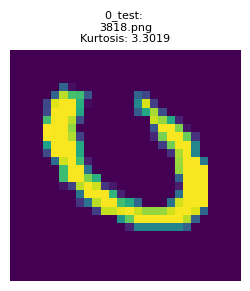

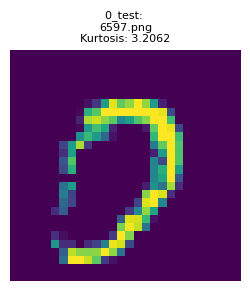

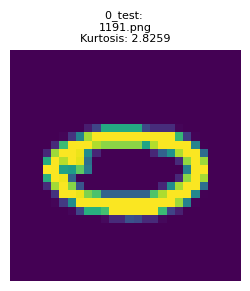

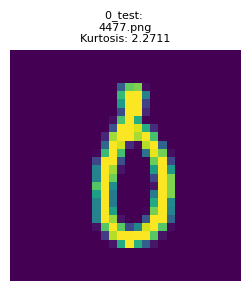

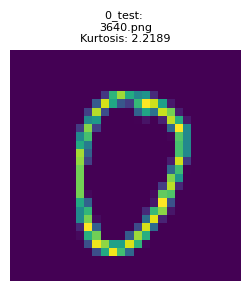

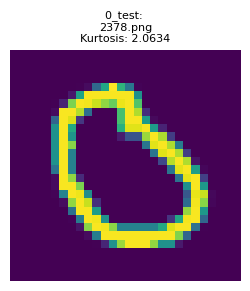

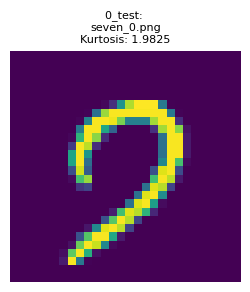

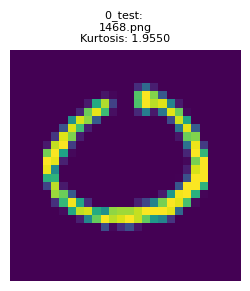

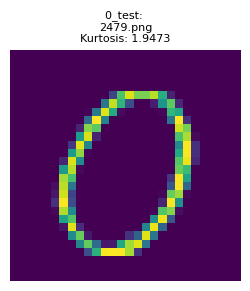

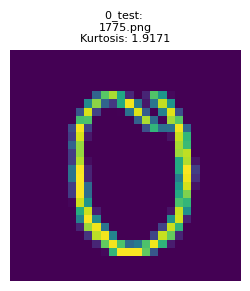

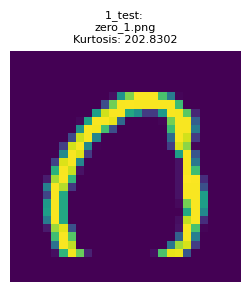

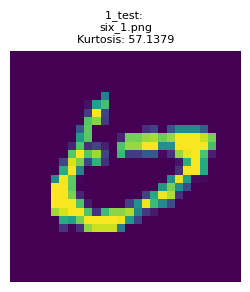

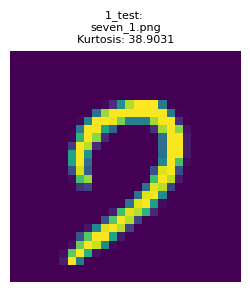

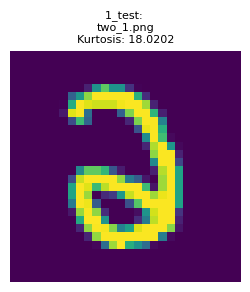

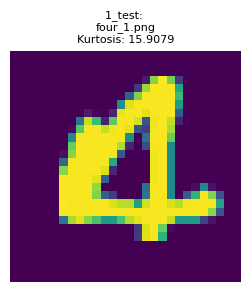

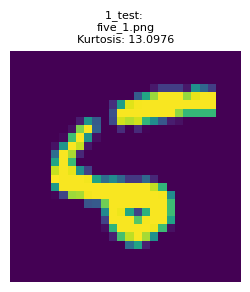

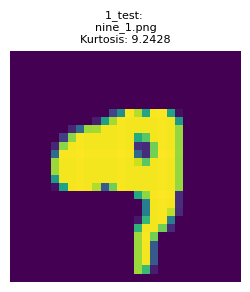

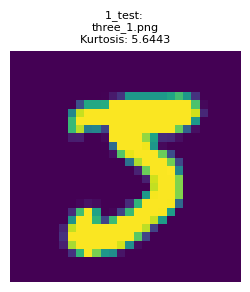

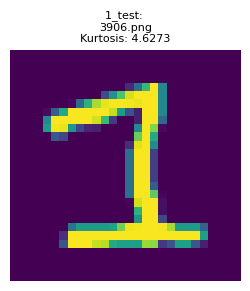

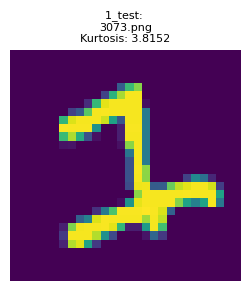

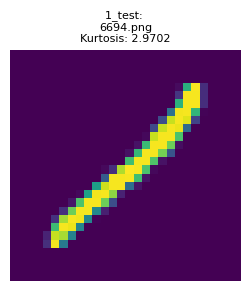

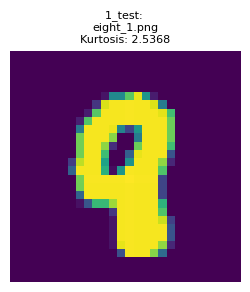

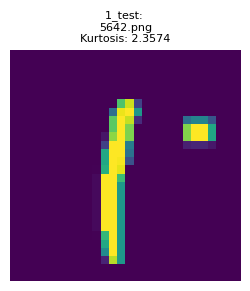

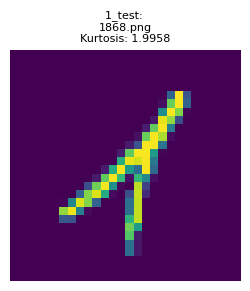

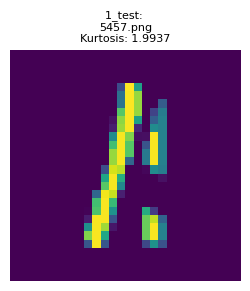

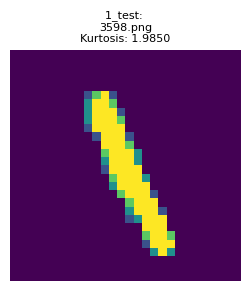

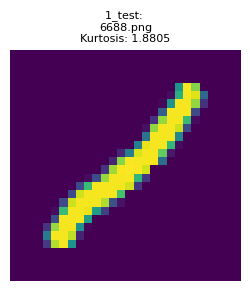

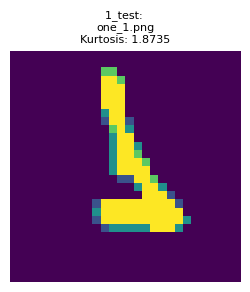

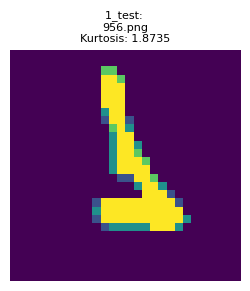

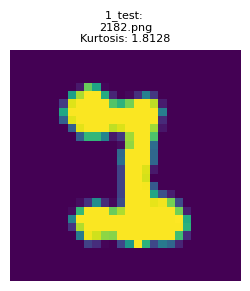

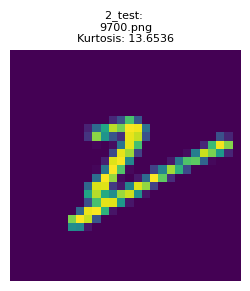

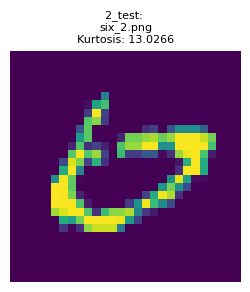

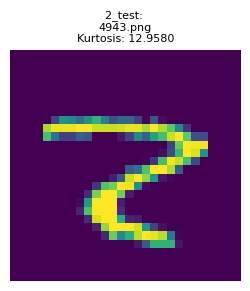

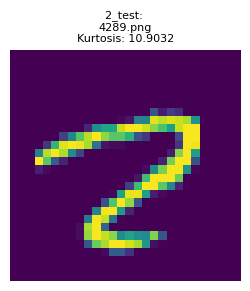

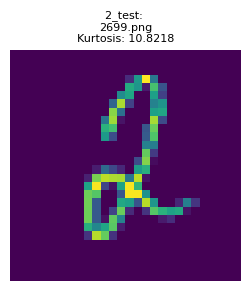

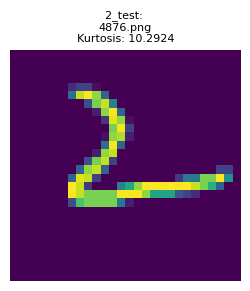

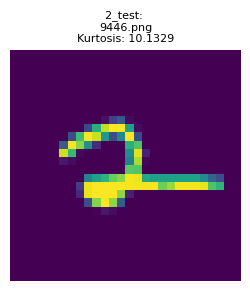

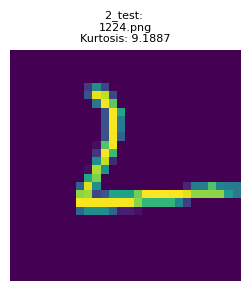

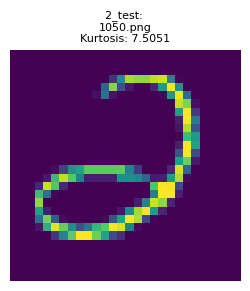

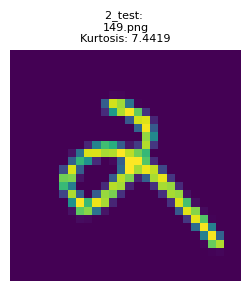

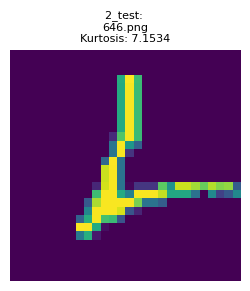

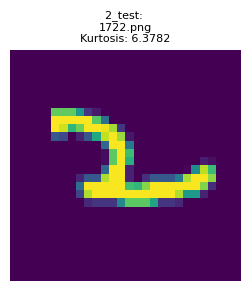

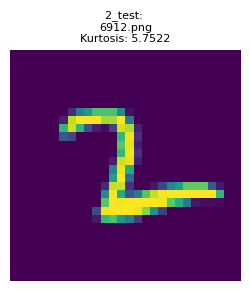

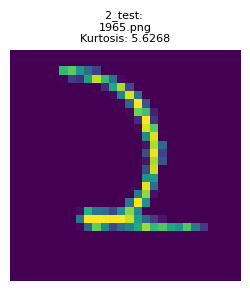

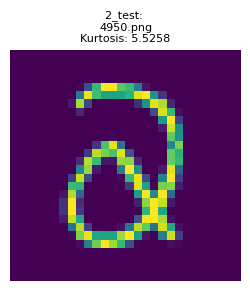

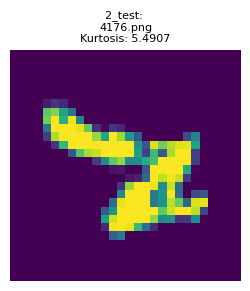

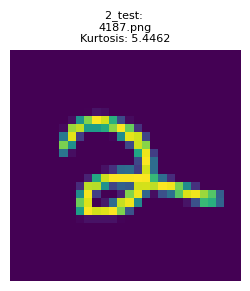

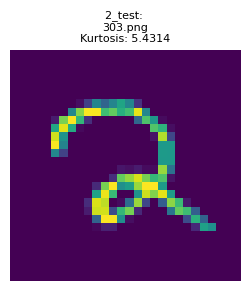

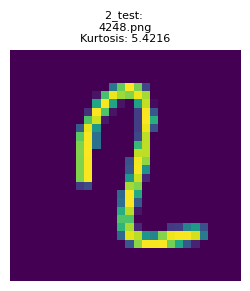

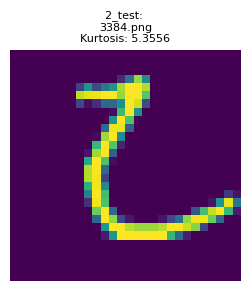

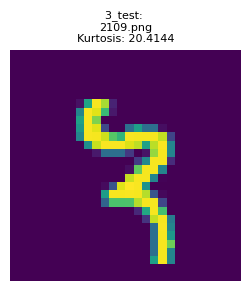

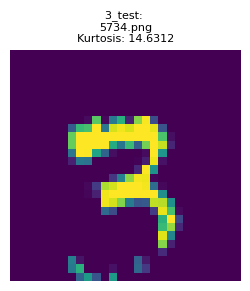

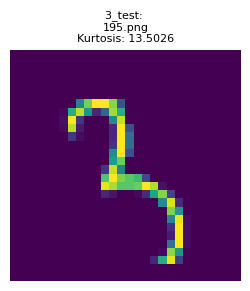

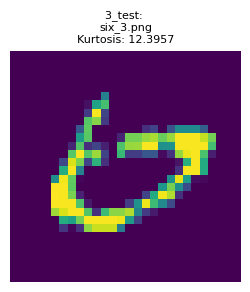

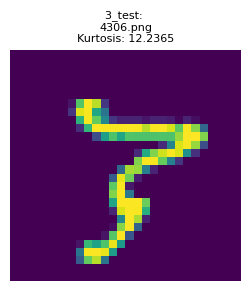

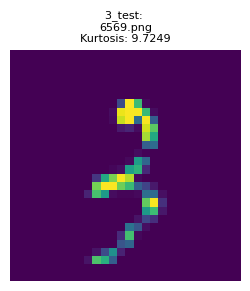

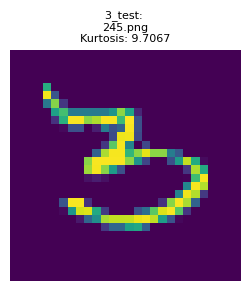

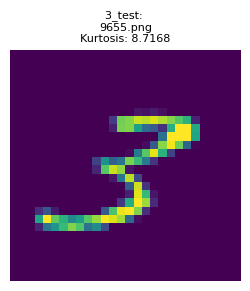

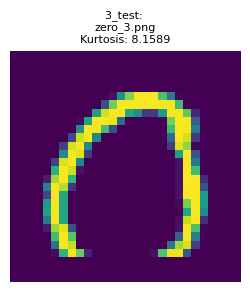

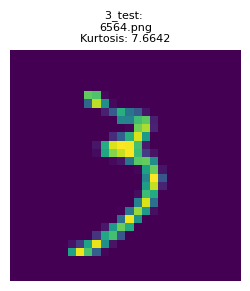

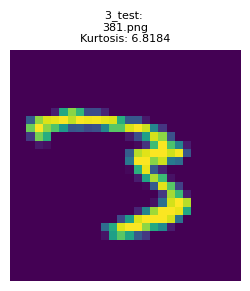

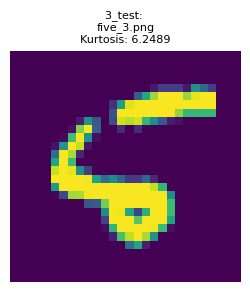

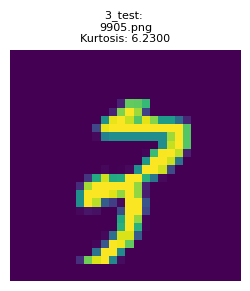

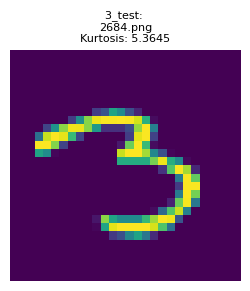

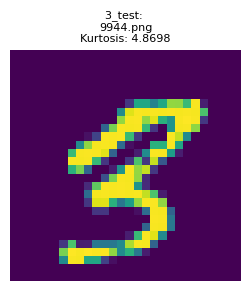

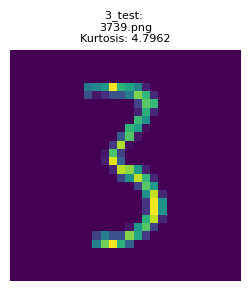

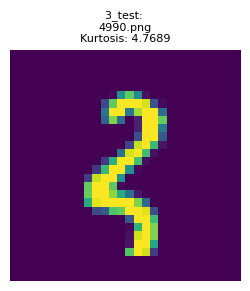

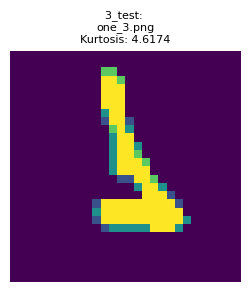

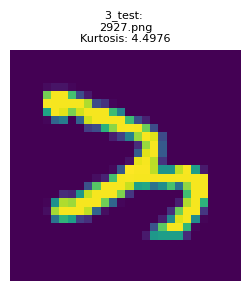

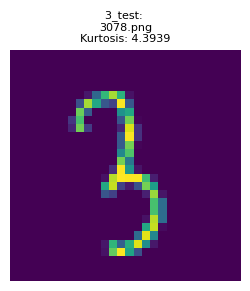

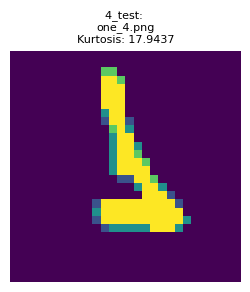

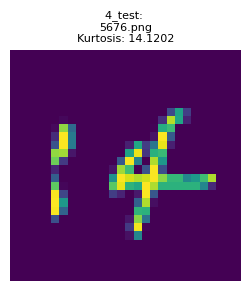

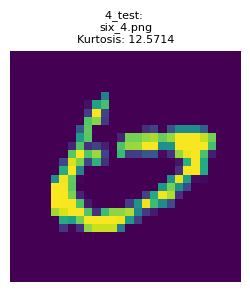

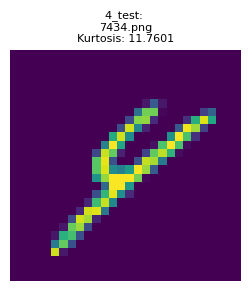

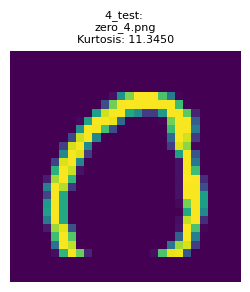

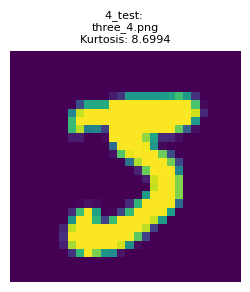

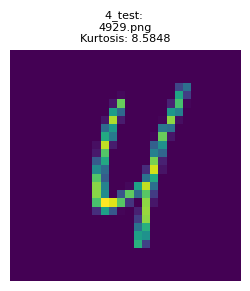

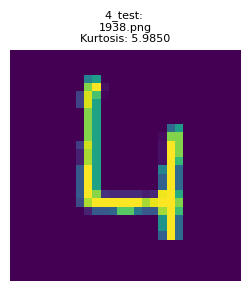

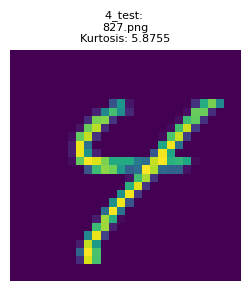

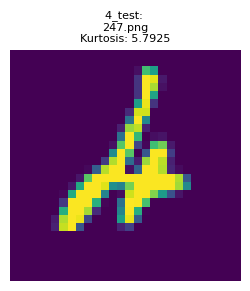

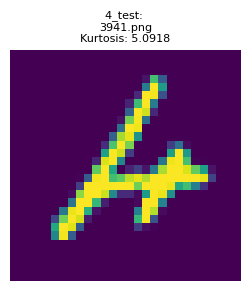

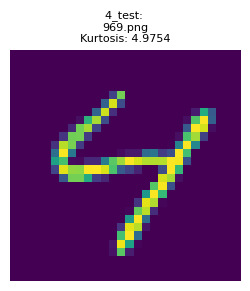

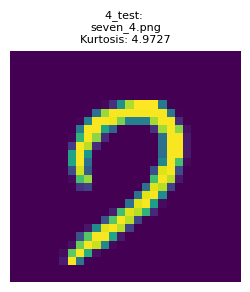

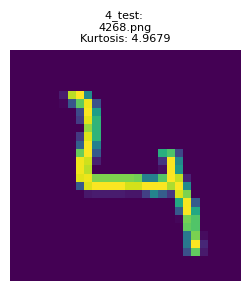

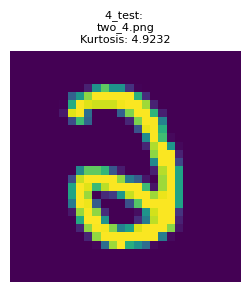

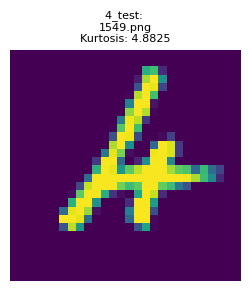

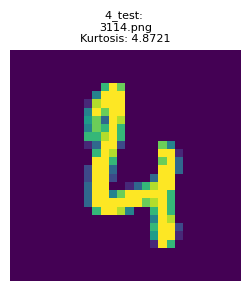

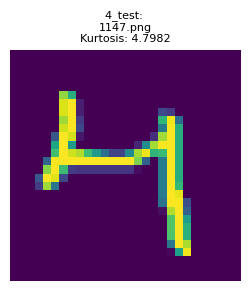

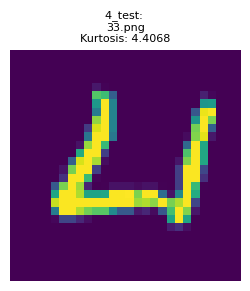

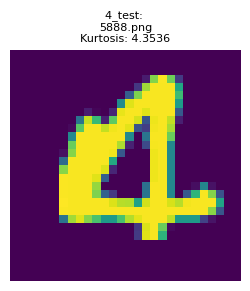

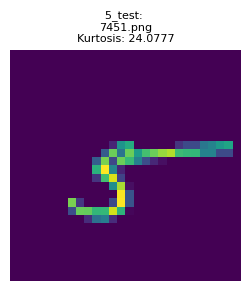

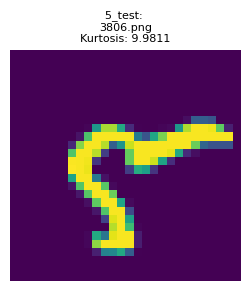

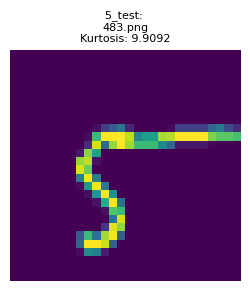

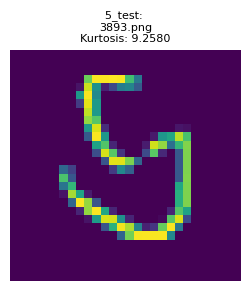

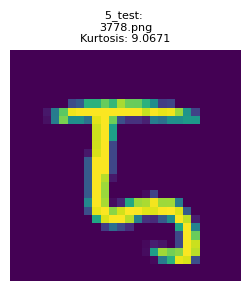

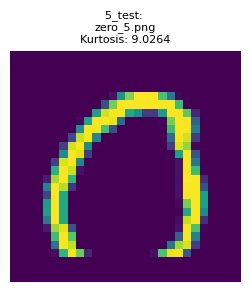

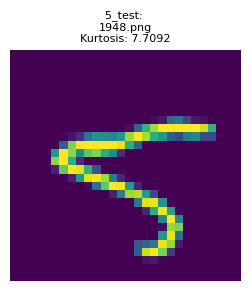

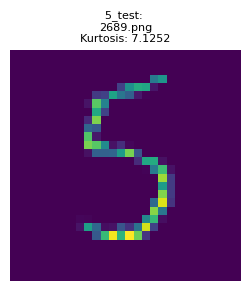

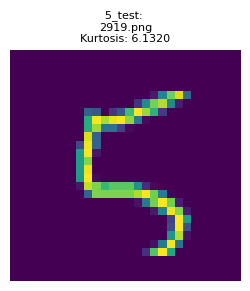

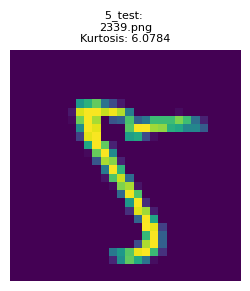

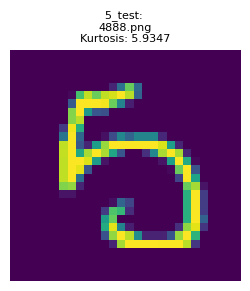

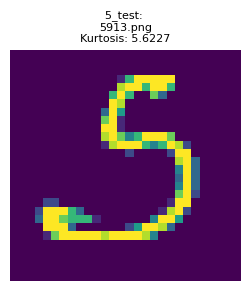

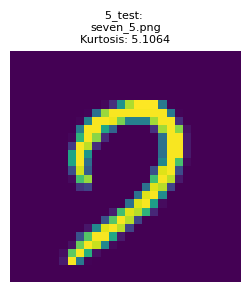

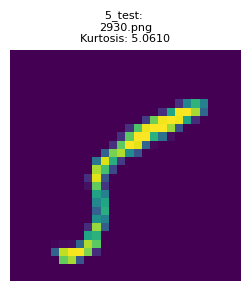

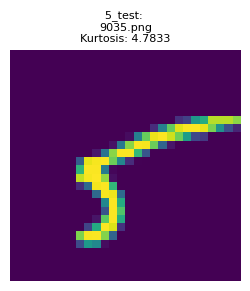

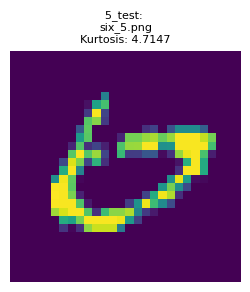

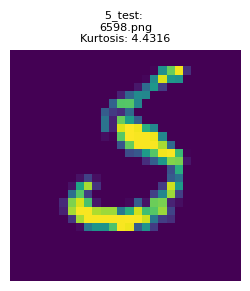

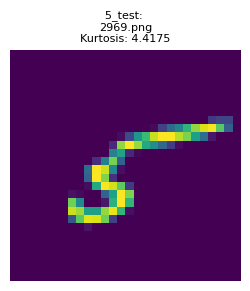

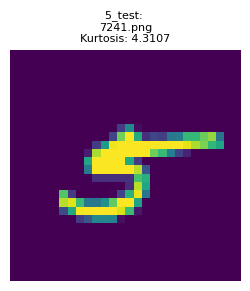

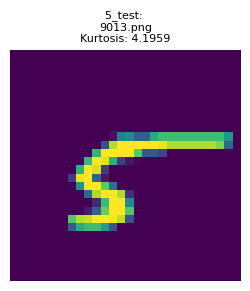

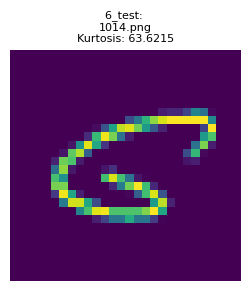

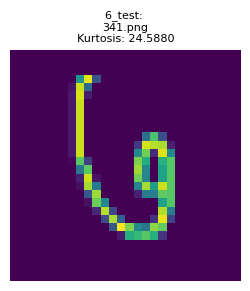

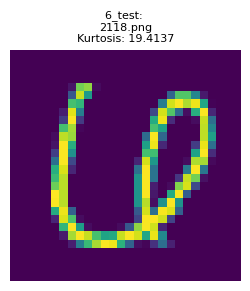

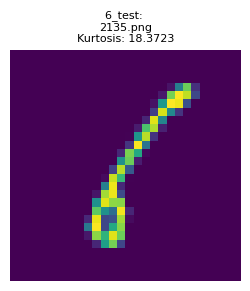

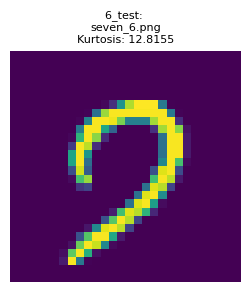

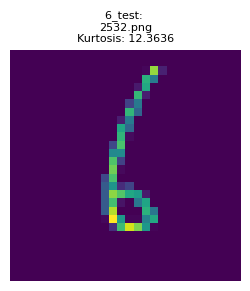

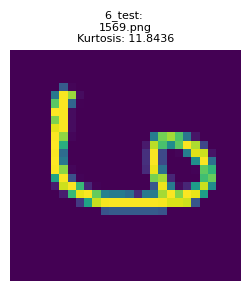

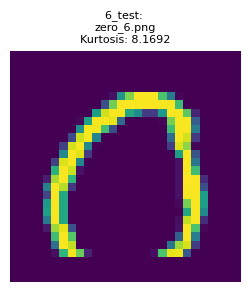

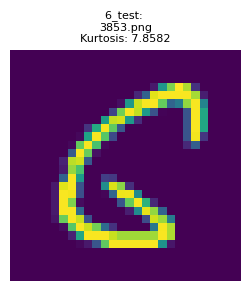

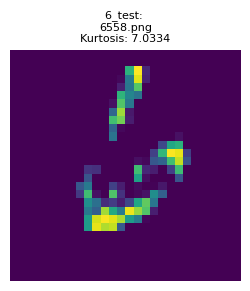

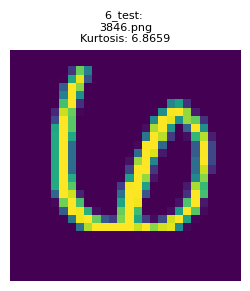

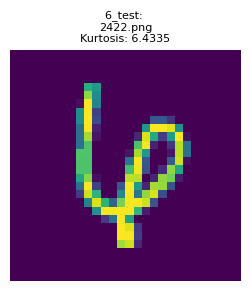

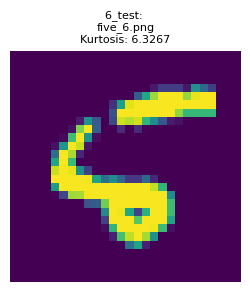

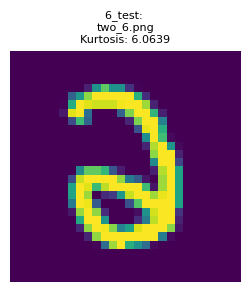

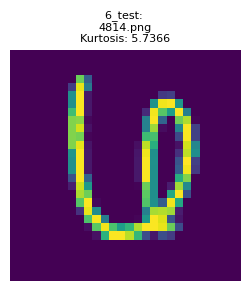

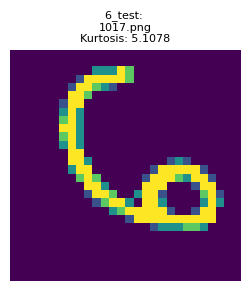

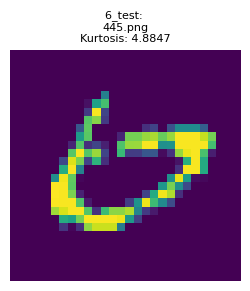

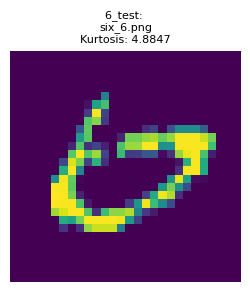

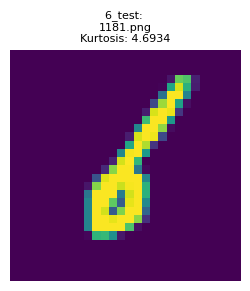

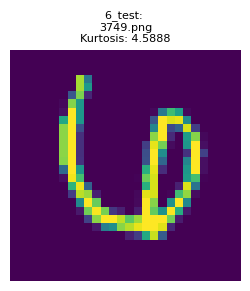

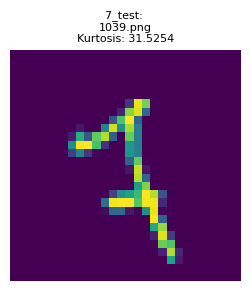

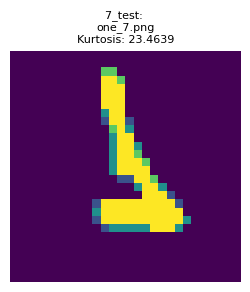

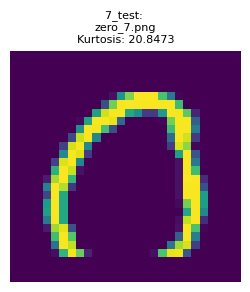

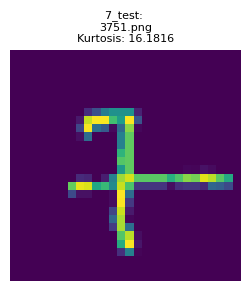

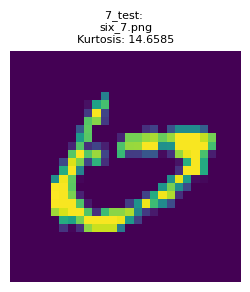

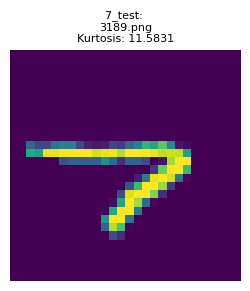

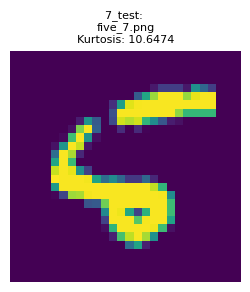

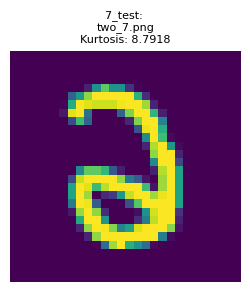

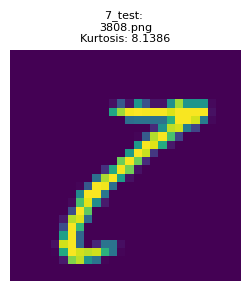

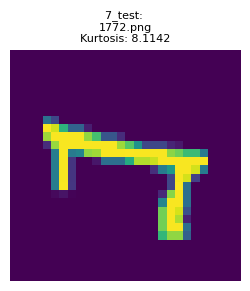

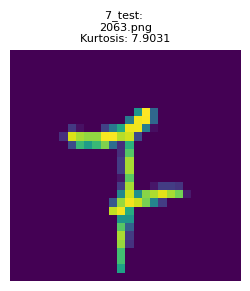

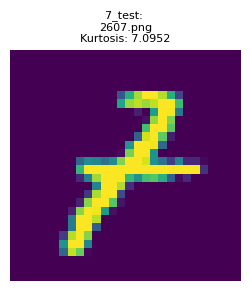

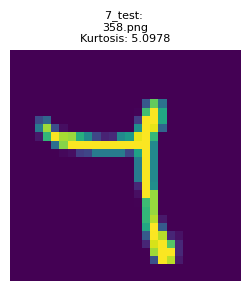

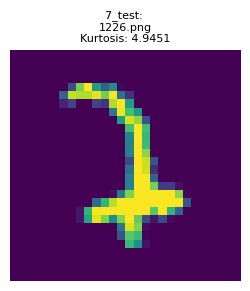

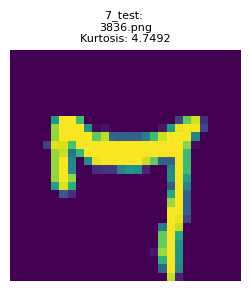

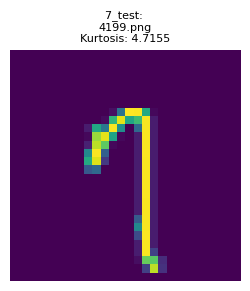

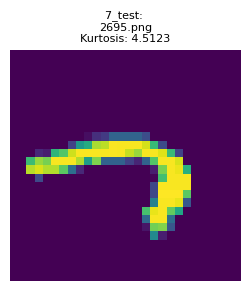

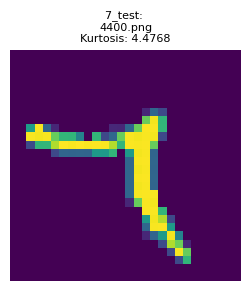

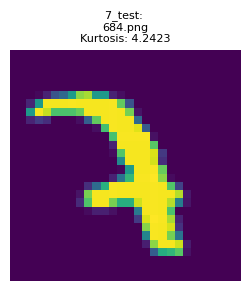

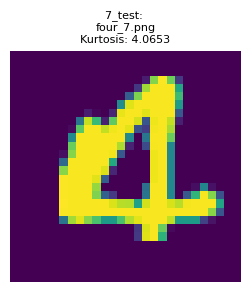

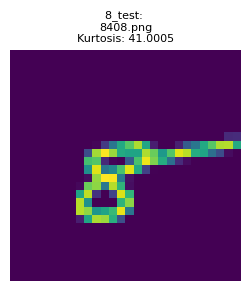

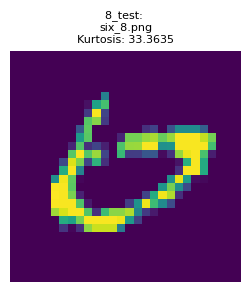

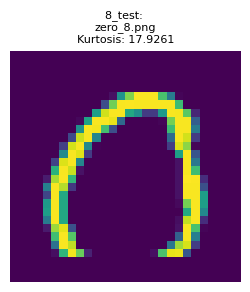

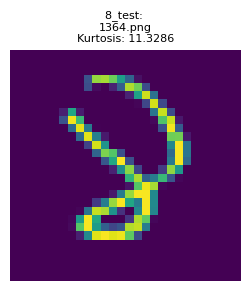

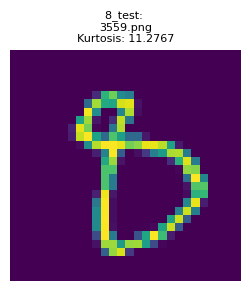

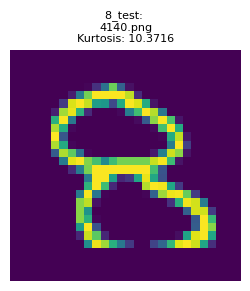

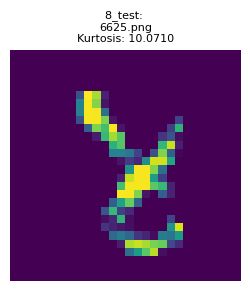

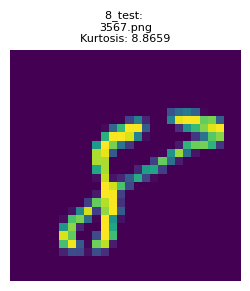

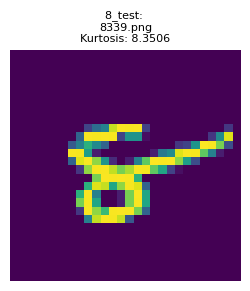

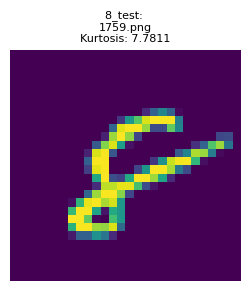

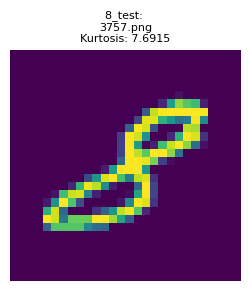

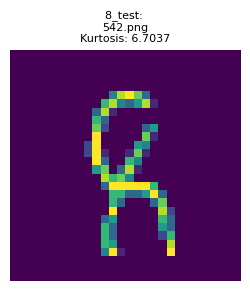

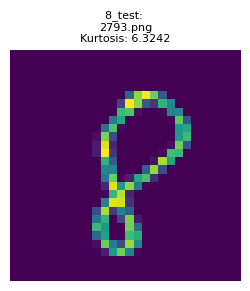

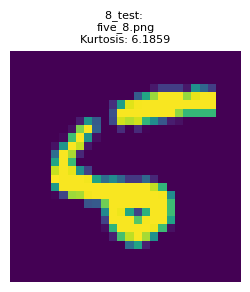

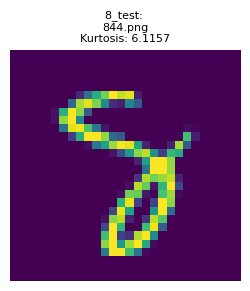

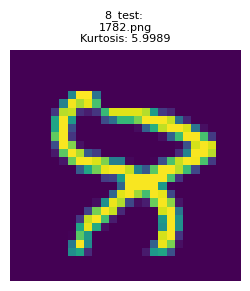

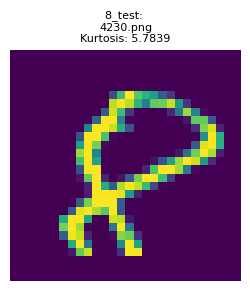

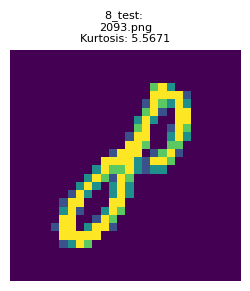

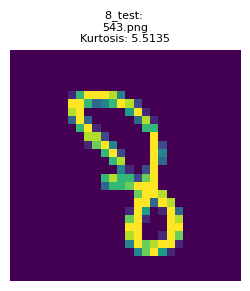

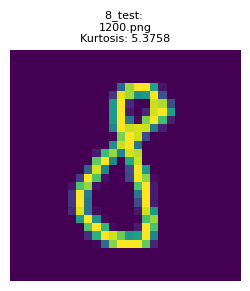

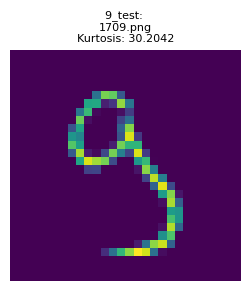

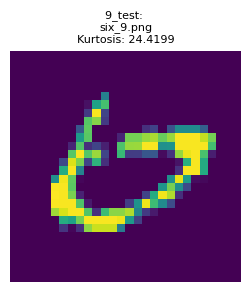

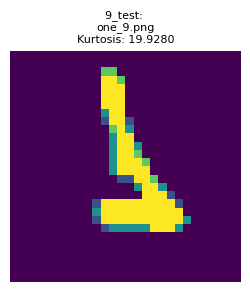

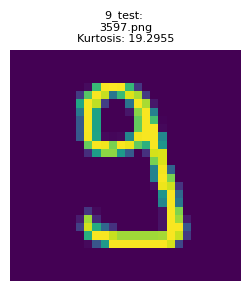

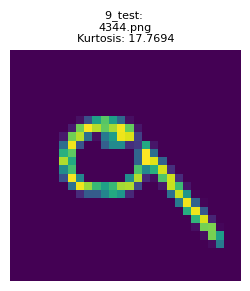

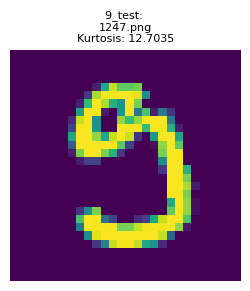

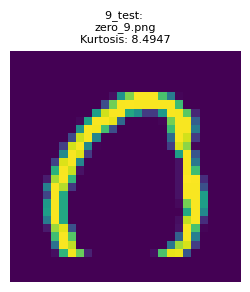

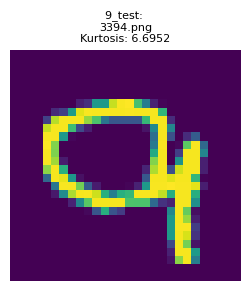

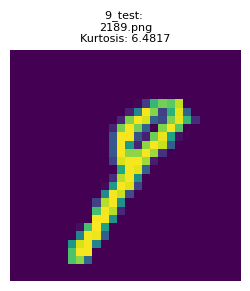

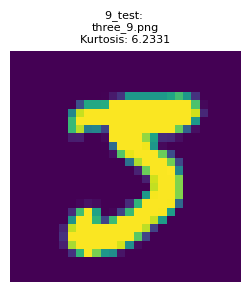

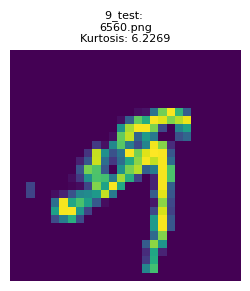

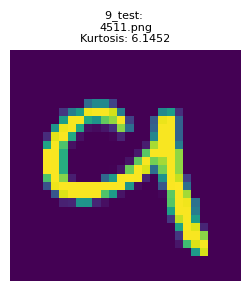

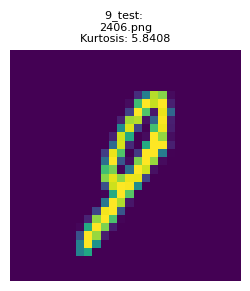

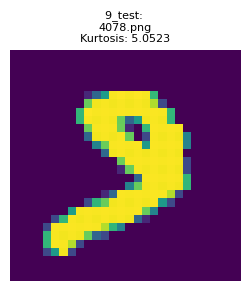

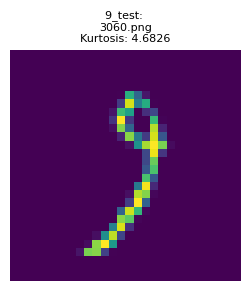

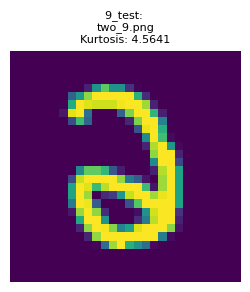

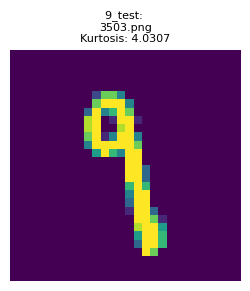

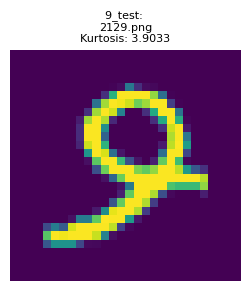

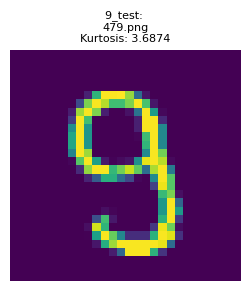

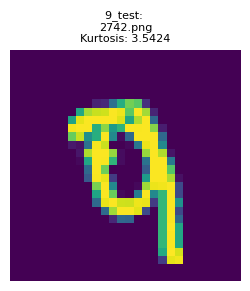

In [102]:
from scipy.stats import kurtosis  

# Función para encontrar y mostrar las imágenes menos similares usando kurtosis  
def show_most_similar_kurtosis_using_C_all_classes(estimator, class_names, filenames_dict, num_samples_to_show=2):  
    images_to_show = []  # Lista para almacenar las imágenes y sus detalles  

    # Recorre las clases y genera la lista de descripciones  
    for class_intent in range(len(class_names)):  
        class_name = class_names[class_intent]  
        print(f"\nClase: {class_name}")  

        # Obtener la matriz de similitud de las muestras dentro de la clase  
        C = estimator.C[class_intent]  

        # Imprimir la forma de la matriz de similitud de la clase  
        print(f"Forma de la matriz de la clase {class_name}: {C.shape}")  

        # Calcular kurtosis  
        kurtosis_per_sample = kurtosis(C, axis=1)  

        # Ordenar las muestras por su kurtosis (de mayor a menor)  
        sorted_indices_kurtosis = np.argsort(kurtosis_per_sample)[::-1]  

        # Mostrar las imágenes de las muestras con mayor kurtosis  
        for idx in sorted_indices_kurtosis[:num_samples_to_show]:  
            kurtosis_val = kurtosis_per_sample[idx]  

            # Obtener los índices de las muestras en el dataset  
            source_idx = estimator.class_indices[class_intent][idx]  

            # Verificar que los índices estén dentro de los límites del dataset  
            if source_idx < len(filenames_dict):  
                source_filename = Path(filenames_dict[source_idx])  

                # Formatear y mostrar la salida  
                print(f"\tMuestra: {source_filename.name} ({class_name}), Kurtosis: {kurtosis_val:.4f}")  

                # Agrega los detalles a la lista para visualización  
                images_to_show.append((source_filename, class_name, kurtosis_val))  
    
    # Luego, realiza la visualización de las imágenes  
    for source_filename, class_name, kurtosis_val in images_to_show:  
        img_source = plt.imread(source_filename)  

        plt.figure(figsize=(3, 3))  
        plt.imshow(img_source)  
        plt.title(  
            f"{class_name}: \n{source_filename.name}\nKurtosis: {kurtosis_val:.4f}",  
            fontsize=8)  
        plt.axis('off')  # Elimina los ejes para centrar la atención en la imagen  
        plt.show()  

print("Muestras con mayor valor de kurtosis:\n")   
num_samples_to_show = 20  # Número de muestras para visualizar por clase  
show_most_similar_kurtosis_using_C_all_classes(estimator, class_names_test, filenames_dict, num_samples_to_show)

# Tomar imagen y visualizar su posicion y las muestras mas similares a esta


Imagen: eight_9.png (Clase: 9_test)
Promedio de Similitud: 0.5940, Posición: 999 de 1019
Skewness: -0.3417, Posición: 985 de 1019
Kurtosis: 0.5916, Posición: 190 de 1019


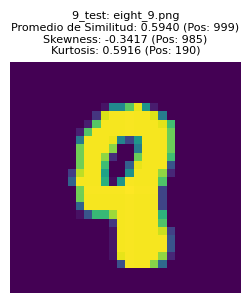

In [106]:

# Función para encontrar y mostrar los detalles de similitud de una imagen específica  
def show_image_similarity_details(estimator, class_names, filenames_dict, target_image_name, num_most_similar=10):  
    # Variable para almacenar el resultado  
    result = None  

    # Recorre las clases y busca la imagen objetivo  
    for class_intent in range(len(class_names)):  
        class_name = class_names[class_intent]  

        # Obtener la matriz de similitud de las muestras dentro de la clase  
        C = estimator.C[class_intent]  

        # Calcular el promedio de similitud, skewness y kurtosis para cada muestra  
        avg_similarity_per_sample = np.mean(C, axis=1)  
        skewness_per_sample = skew(C, axis=1)  
        kurtosis_per_sample = kurtosis(C, axis=1)  

        # Buscar el índice de la imagen objetivo en la clase actual  
        for idx, source_idx in enumerate(estimator.class_indices[class_intent]):  
            source_filename = Path(filenames_dict[source_idx]).name  
            if source_filename == target_image_name:  
                # Encontrar el promedio de similitud y su posición  
                avg_sim = avg_similarity_per_sample[idx]  
                sorted_indices_avg = np.argsort(avg_similarity_per_sample)  
                position_avg = np.where(sorted_indices_avg == idx)[0][0] + 1  # +1 para posición 1-indexada  

                # Encontrar la skewness y su posición  
                skewness_val = skewness_per_sample[idx]  
                sorted_indices_skew = np.argsort(skewness_per_sample)[::-1]  
                position_skew = np.where(sorted_indices_skew == idx)[0][0] + 1  

                # Encontrar la kurtosis y su posición  
                kurtosis_val = kurtosis_per_sample[idx]  
                sorted_indices_kurt = np.argsort(kurtosis_per_sample)[::-1]  
                position_kurt = np.where(sorted_indices_kurt == idx)[0][0] + 1  

                # Guardar el resultado  
                result = (class_name, avg_sim, position_avg, skewness_val, position_skew, kurtosis_val, position_kurt, len(avg_similarity_per_sample), source_filename, idx)  
                break  

        if result:  
            break  

    if result:  
        class_name, avg_sim, position_avg, skewness_val, position_skew, kurtosis_val, position_kurt, total_samples, source_filename, target_idx = result  
        print(f"\nImagen: {target_image_name} (Clase: {class_name})")  
        print(f"Promedio de Similitud: {avg_sim:.4f}, Posición: {position_avg} de {total_samples}")  
        print(f"Skewness: {skewness_val:.4f}, Posición: {position_skew} de {total_samples}")  
        print(f"Kurtosis: {kurtosis_val:.4f}, Posición: {position_kurt} de {total_samples}")  

        # Mostrar la imagen objetivo  
        img_source = plt.imread(Path(filenames_dict[source_idx]))  
        plt.figure(figsize=(3, 3))  
        plt.imshow(img_source)  
        plt.title(f"{class_name}: {source_filename}\nPromedio de Similitud: {avg_sim:.4f} (Pos: {position_avg})\nSkewness: {skewness_val:.4f} (Pos: {position_skew})\nKurtosis: {kurtosis_val:.4f} (Pos: {position_kurt})", fontsize=8)  
        plt.axis('off')  
        plt.show()  

        # # Mostrar las imágenes más similares a la imagen objetivo  
        # print(f"\nLas {num_most_similar} imágenes más similares a {target_image_name}\n:")  

        # # Obtener las similitudes de la imagen objetivo con todas las demás  
        # similarities = C[target_idx]  

        # # Ordenar las similitudes de mayor a menor  
        # most_similar_indices = np.argsort(similarities)[-num_most_similar-1:-1][::-1]  # Excluding self and reversing order  

        # for i, idx in enumerate(most_similar_indices):  
        #     most_sim = similarities[idx]  
        #     most_sim_idx = estimator.class_indices[class_intent][idx]  
        #     most_sim_filename = Path(filenames_dict[most_sim_idx]).name  

        #     print(f"\t{i+1}. Imagen: {most_sim_filename} (Clase: {class_name}), Similitud: {most_sim:.4f}")  
            
        #     # Mostrar la imagen más similar  
        #     img_most_sim = plt.imread(Path(filenames_dict[most_sim_idx]))  
        #     plt.figure(figsize=(3, 3))  
        #     plt.imshow(img_most_sim)  
        #     plt.title(f"{class_name}: {most_sim_filename}\nSimilitud: {most_sim:.4f}", fontsize=8)  
        #     plt.axis('off')  
        #     plt.show()  

    else:  
        print(f"\nImagen {target_image_name} no encontrada en las clases proporcionadas.")  

# Ejemplo de uso  
target_image_name = "eight_9.png"  # Seleccionar nombre de la imagen deseada 
#num_most_similar = 10  # Número de imágenes más similares a mostrar  
show_image_similarity_details(estimator, class_names_test, filenames_dict, target_image_name, num_most_similar)